# Project 2: Classifying Chess Games

## Chapter 1: Presenting the dataset

In [1]:
# Import modules
from sklearn.neural_network import MLPClassifier # neural network
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

#from keras.wrappers.scikit_learn import KerasClassifier
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from keras_sequential_ascii import keras2ascii

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset into a pandas DataFrame and displaying two sample rows.
df = pd.read_csv("chess_games.csv") 
df.sample(2)

game_id  rated  turns victory_status winner time_increment     white_id  \
6511     6512   True     49         Resign  White           10+0  mehmetali_t   
9504     9505  False     75         Resign  White           15+0        wozza   

      white_rating    black_id  black_rating  \
6511          1528       snupi          1517   
9504          1500  redevening          1372   

                                                  moves opening_code  \
6511  e4 e5 Nf3 Nc6 d4 Bd6 d5 Nce7 Bc4 Ng6 Nc3 h6 Be...          C44   
9504  Nf3 c5 d3 Nc6 g3 e6 Bg2 g6 O-O Bg7 Re1 Nge7 Qd...          A04   

      opening_moves                        opening_fullname  \
6511              5                             Scotch Game   
9504              2  Zukertort Opening: Sicilian Invitation   

      opening_shortname opening_response    opening_variation  
6511        Scotch Game              NaN                  NaN  
9504  Zukertort Opening              NaN  Sicilian Invitation

In [3]:
# Presenting the database information: 
# Number of columns, their names, number of non-null values and the type of data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   1207 non-null   object
 16  opening_variation  14398 non-null  objec

In [4]:
# Describing staticstics for columns which are of int64 type
df.describe()

game_id         turns  white_rating  black_rating  opening_moves
count  20058.000000  20058.000000  20058.000000  20058.000000   20058.000000
mean   10029.500000     60.465999   1596.631868   1588.831987       4.816981
std     5790.390185     33.570585    291.253376    291.036126       2.797152
min        1.000000      1.000000    784.000000    789.000000       1.000000
25%     5015.250000     37.000000   1398.000000   1391.000000       3.000000
50%    10029.500000     55.000000   1567.000000   1562.000000       4.000000
75%    15043.750000     79.000000   1793.000000   1784.000000       6.000000
max    20058.000000    349.000000   2700.000000   2723.000000      28.000000

In [5]:
# Presenting unique values for each column using a lambda function
print(df.apply(lambda col: col.unique()))

game_id              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
rated                                                    [False, True]
turns                [13, 16, 61, 95, 5, 33, 9, 66, 119, 39, 38, 60...
victory_status                       [Out of Time, Resign, Mate, Draw]
winner                                            [White, Black, Draw]
time_increment       [15+2, 5+10, 20+0, 30+3, 10+0, 15+30, 15+0, 20...
white_id             [bourgris, a-00, ischia, daniamurashov, nik221...
white_rating         [1500, 1322, 1496, 1439, 1523, 1250, 1520, 141...
black_id             [a-00, skinnerua, adivanov2009, franklin14532,...
black_rating         [1191, 1261, 1500, 1454, 1469, 1002, 1423, 210...
moves                [d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba...
opening_code         [D10, B00, C20, D02, C41, B27, D00, C50, B01, ...
opening_moves        [5, 4, 3, 10, 6, 1, 9, 2, 8, 7, 17, 11, 12, 13...
opening_fullname     [Slav Defense: Exchange Variation, Nimzowitsch...
openin

In [6]:
# As we see above the columns 'opening_response' and 'opening_variation' have null values. Let's look more into it.
df['opening_response'].value_counts()

Declined    503
Accepted    453
Refused     251
Name: opening_response, dtype: int64

In [7]:
df['opening_variation'].value_counts()

#2                         797
Exchange Variation         444
Classical Variation        419
Normal Variation           377
Advance Variation          301
                          ... 
Taimanov Variation           1
Been-Koomen Variation        1
Philidor Gambit              1
Romanishin Variation #2      1
Slav                         1
Name: opening_variation, Length: 615, dtype: int64

In [8]:
def count_nulls(column):
    """
    Counts the number of null values in the provided column.

    Parameters
    ----------
    column :  pandas.core.series.Series
        column for which we want to count the number of null values

    Returns
    -------
    numpy.int64
        the amount of null values in the given column
    """
    return column.size - column.count()

print(f"The number of null values in the opening_response column is: {count_nulls(df['opening_response'])}")
print(f"The number of null values in the opening_variation column is: {count_nulls(df['opening_variation'])}")

The number of null values in the opening_response column is: 18851
The number of null values in the opening_variation column is: 5660


### As both of these columns are categorical values we cannot fill the null values with the minimum, median or the previous value of each column. Moreover, there are many rows which have null values and deleting all of the rows withh null values would mean a huge loss of data. Therefore we will insert the value "Response not known" for each null value in the opening_response column and "Custom variation" in the opening_variation column.

In [9]:
# Using dict to specify the new value for each column in fillna() method and presenting two samples.
df = df.fillna({"opening_response": "Response not known", "opening_variation": "Custom variation"})
df.sample(2)

game_id  rated  turns victory_status winner time_increment  \
4010      4011   True     62    Out of Time  Black           10+5   
12840    12841  False     72         Resign  Black           10+0   

                white_id  white_rating        black_id  black_rating  \
4010   jovan_kingofkings          1737  hamzaahmedadam          1775   
12840        renatojose4          1842   cro_chess_fan          1967   

                                                   moves opening_code  \
4010   Nf3 c5 e4 Nc6 Bb5 g6 Bxc6 bxc6 d3 Bg7 O-O Nf6 ...          B31   
12840  Nf3 c5 e3 g6 d4 cxd4 exd4 Bg7 b3 Nc6 Bb2 d6 g3...          A04   

       opening_moves                                   opening_fullname  \
4010               6  Sicilian Defense: Nyezhmetdinov-Rossolimo Atta...   
12840              2             Zukertort Opening: Sicilian Invitation   

       opening_shortname    opening_response               opening_variation  
4010    Sicilian Defense  Response not known  Nyezhmetdinov-Rossolimo Attack  
12840  Zukertort Opening  Response not known             Sicilian Invitation

In [10]:
# Presenting the database info once again to make sure there aren't any null values anymore.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   20058 non-null  object
 16  opening_variation  20058 non-null  objec

### Having prepared our DataFrame, we can now move onto the next chapter in which we will use various techniques to select the features to be used in the classifier.

# Chapter 2: Data processing and feature selection

### Inside of this chapter we will prepare two datasets for our classifier. One will be more advanced than the other. Let's begin with showing which column will be our target column. Of course, what could be more exciting than trying to figure out who will be the winner of the game?

In [11]:
# Counting the unique values of the 'winner' column. 
df['winner'].value_counts()

White    10001
Black     9107
Draw       950
Name: winner, dtype: int64

In [12]:
# Because we have categorical values, we need to change them to be numerical. 
# We will do the following:
# - White will be changed to 2
# - Black will be changed to 1
# - Draw will be changed to 0

target = df[['winner']].replace(['White','Black','Draw'],[2,1,0])
df['winner'] = target

target.sample(n=3) # displaying sample rows

winner
7965       1
5706       2
8293       1

In [13]:
# Now let's prepare all of the other columns. To start of we can drop the "game_id" column because it doesn't bring
# too much new infomation to our data.
df = df.drop(['game_id'], axis = 1)
df.sample(1)

rated  turns victory_status  winner time_increment        white_id  \
15569   True     44         Resign       1          15+45  lemarktwainkie   

       white_rating black_id  black_rating  \
15569          1462     sipo          1473   

                                                   moves opening_code  \
15569  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 f4 Nxe4 Bb5+ Bd7...          B57   

       opening_moves                                  opening_fullname  \
15569              8  Sicilian Defense: Modern Variations |  Main Line   

      opening_shortname    opening_response  opening_variation  
15569  Sicilian Defense  Response not known  Modern Variations

In [14]:
# Below we will prepare two lists containing the first and last moves of the game.
w = [] # creating a list of the first move in the game
l = [] # creating a list of the last move in the game

for i in range(len(df)):
    w.append(df['moves'][i][0:3].rstrip()) # appending value to list stripped of ' ' in the end
    stripped = df['moves'][i][-4:].lstrip().rstrip() # appending value to list stripped of ' ' in the beggining and end
    # however there can still be a ' ' in the middle and we want to only take the characters after the ' '
    if ' ' in stripped:
        stripped = stripped.split(' ', 1)[1] # splitting by ' ' and taking only what is on the right side of the split
    l.append(stripped)

In [15]:
# Now we can normalize the numerical columns using a lambda function. 
# The minimum of each column will now be 0 and the maximum will be 1.
df_norm = df[['turns', 'white_rating', 'black_rating', 'opening_moves']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.describe() # presenting the statistics for the normalized columns.

turns  white_rating  black_rating  opening_moves
count  20058.000000  20058.000000  20058.000000   20058.000000
mean       0.170879      0.424129      0.413564       0.141370
std        0.096467      0.152011      0.150484       0.103598
min        0.000000      0.000000      0.000000       0.000000
25%        0.103448      0.320459      0.311272       0.074074
50%        0.155172      0.408664      0.399690       0.111111
75%        0.224138      0.526618      0.514478       0.185185
max        1.000000      1.000000      1.000000       1.000000

In [16]:
# Replacing categorical values with numerical values.
# Replacing booleans in the rated column: True -> 1 , False -> 0
df = df.replace({True:1,False:0})

# Replacing values in the victory_status and opening_response columns
victory_status = df[['victory_status']].replace(['Out of Time', 'Resign', 'Mate', 'Draw'],[3,2,1,0])
df['victory_status'] = victory_status

opening_response = df[['opening_response']].replace(['Response not known', 'Refused', 'Accepted', 'Declined'],[3,2,1,0])
df['opening_response'] = opening_response

df.sample(2)

rated  turns  victory_status  winner time_increment       white_id  \
1978      1      2               2       2            9+1  sneaky_bugger   
617       1     52               1       1           10+0         alkeal   

      white_rating         black_id  black_rating  \
1978          1765  tactical_bishop          1234   
617           1456      dr_perdyllo          1604   

                                                  moves opening_code  \
1978                                              b3 g6          A01   
617   d4 d5 c4 dxc4 Nc3 e6 Nf3 Bb4 Qc2 Nf6 e3 Nd5 Bx...          D20   

      opening_moves         opening_fullname    opening_shortname  \
1978              1      Nimzo-Larsen Attack  Nimzo-Larsen Attack   
617               4  Queen's Gambit Accepted       Queen's Gambit   

      opening_response opening_variation  
1978                 3  Custom variation  
617                  1  Custom variation

In [17]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encoding labels in columns with many values.
df['time_increment'] = label_encoder.fit_transform(df['time_increment'])

df['opening_code'] = label_encoder.fit_transform(df['opening_code'])

df['opening_fullname'] = label_encoder.fit_transform(df['opening_fullname'])

df['opening_shortname'] = label_encoder.fit_transform(df['opening_shortname'])

df['opening_variation'] = label_encoder.fit_transform(df['opening_variation'])

df['white_id'] = label_encoder.fit_transform(df['white_id'])

df['black_id'] = label_encoder.fit_transform(df['black_id'])

df['moves'] = label_encoder.fit_transform(df['moves'])

In [18]:
df.sample(2)         

rated  turns  victory_status  winner  time_increment  white_id  \
15061      1     58               1       1             123      3792   
3568       1     24               3       1             102      6904   

       white_rating  black_id  black_rating  moves  opening_code  \
15061          1606      7736          1686   7977            99   
3568           2101      7254          2048   4964           266   

       opening_moves  opening_fullname  opening_shortname  opening_response  \
15061              4              1324                109                 3   
3568              10              1413                115                 3   

       opening_variation  
15061                386  
3568                 544

In [19]:
# Now let's create a more advanced dataset which will have the numerical values normalized.

df_adv = df.drop(['turns', 'white_rating', 'black_rating', 'opening_moves','winner'], axis = 1)

df_adv = pd.concat([target, df_norm, df_adv], axis=1)

df_adv['first_move'] = w # adding column with the starting move of the game

df_adv['last_move'] = l # adding column with the last move of the game

df_adv['first_move'] = label_encoder.fit_transform(df_adv['first_move']) # encoding the categorical values into numeric

df_adv['last_move'] = label_encoder.fit_transform(df_adv['last_move']) # encoding the categorical values into numeric

df_adv.head(3)

winner     turns  white_rating  black_rating  opening_moves  rated  \
0       2  0.034483      0.373695      0.207859       0.148148      0   
1       1  0.043103      0.280793      0.244054       0.111111      1   
2       2  0.172414      0.371608      0.367632       0.074074      1   

   victory_status  time_increment  white_id  black_id  moves  opening_code  \
0               3             110      1290        12   4524           248   
1               2             298        19      7748   1987            71   
2               1             298      3826        12  16383           171   

   opening_fullname  opening_shortname  opening_response  opening_variation  \
0              1387                110                 3                182   
1               750                 74                 3                264   
2               650                 61                 3                300   

   first_move  last_move  
0          11        146  
1          11         64  
2          13         97

In [20]:
# Creating dummy variables for the categorical columns which have many different values.
df_adv = pd.get_dummies(df_adv, columns=['victory_status', 'time_increment', 'white_id', 'black_id', 'opening_code', 'opening_fullname','opening_shortname', 'opening_response','opening_variation', 'first_move', 'last_move'])
df_adv.sample(1)

winner     turns  white_rating  black_rating  opening_moves  rated  \
14225       0  0.255747      0.338727      0.392451       0.074074      0   

       moves  victory_status_0  victory_status_1  victory_status_2  ...  \
14225    437                 1                 0                 0  ...   

       last_move_1691  last_move_1692  last_move_1693  last_move_1694  \
14225               0               0               0               0   

       last_move_1695  last_move_1696  last_move_1697  last_move_1698  \
14225               0               0               0               0   

       last_move_1699  last_move_1700  
14225               0               0  

[1 rows x 23491 columns]

### As you can see above, our df_adv has a lot of columns and there is a chance that the model will overfit.  It is suggested to use between 10 to 100 columns for machine learning algorithms. That is why we will only pick some of the columns.

In [21]:
# Let's see the correlation coefficient of each column with our target column for the advanced DataFrame.
# corr_matrix = df_adv.corr()
# df_adv.corrwith(df['winner'])
target_corr = df_adv.corrwith(df['winner']).abs().sort_values(ascending=False)
target_corr[0:51]

winner                1.000000
victory_status_0      0.539464
black_rating          0.160843
victory_status_2      0.139590
turns                 0.129875
last_move_1665        0.093885
white_rating          0.093497
victory_status_1      0.089838
last_move_1681        0.077607
last_move_760         0.073174
last_move_785         0.072769
last_move_1697        0.071333
last_move_1671        0.067168
last_move_1655        0.057790
last_move_810         0.056454
last_move_1667        0.056293
last_move_1687        0.055136
white_id_1629         0.054634
last_move_1003        0.053680
last_move_1651        0.052224
last_move_813         0.051659
last_move_770         0.050129
last_move_29          0.048729
last_move_1635        0.048274
last_move_763         0.048252
last_move_745         0.047620
last_move_1038        0.047619
last_move_738         0.047019
last_move_1637        0.046497
last_move_334         0.044504
last_move_1649        0.043691
last_move_389         0.043542
last_mov

In [22]:
# Let's keep only 50 columns in our df_adv.

cols_to_keep = target_corr.iloc[1:51].index # getting the index of the columns which we want to keep

# Because cols_to_keep is in a 'pandas.core.indexes.base.Index' format, we want to change it to a list
# a list can be given as a parameter inside of creating a dataframe

l = [] # list which will keep the column names so that it will be easier to create the new df

for col in cols_to_keep:
    l.append(col)

df_adv = df_adv[l] # creating df with only the specific columns
df_adv = pd.concat([target, df_adv], axis=1) # concatenating with the target column
df_adv.head(2)

winner  victory_status_0  black_rating  victory_status_2     turns  \
0       2                 0      0.207859                 0  0.034483   
1       1                 0      0.244054                 1  0.043103   

   last_move_1665  white_rating  victory_status_1  last_move_1681  \
0               0      0.373695                 0               0   
1               0      0.280793                 0               0   

   last_move_760  ...  first_move_12  last_move_387  last_move_1017  \
0              0  ...              0              0               0   
1              0  ...              0              0               0   

   last_move_641  last_move_972  opening_code_0  last_move_1666  \
0              0              0               0               0   
1              0              0               0               0   

   black_id_4852  last_move_289  opening_response_3  
0              0              0                   1  
1              0              0                   1  

[2 rows x 51 columns]

In [23]:
df = df.drop(['winner'], axis = 1) # dropping target column and adding it upfront of the dataframe
df = pd.concat([target, df], axis=1)

In [24]:
df.shape # presenting the final shape of our df

(20058, 16)

In [25]:
df_adv.shape # presenting the final shape of our df_adv

(20058, 51)

# Chapter 3: Splitting our dataframes into train and test sets

### This chapter is really short because I only split the dataset into train and test sets. 70% of the data will land in the train set and 30% of the data will be in the test set. The random_state parameter is my university index number.

In [26]:
(X_train, X_test, y_train, y_test) = train_test_split(df.values[:, 1:17], df.values[:, 0], train_size=0.8, 
stratify = target) 
# We split the data using stratify so that we have equal groups of data in our train and test sets.
# 80% of the data will be used for training and 20% for testing.

In [27]:
(X_train_adv, X_test_adv, y_train_adv, y_test_adv) = train_test_split(df_adv.values[:, 1:52], df_adv.values[:, 0], train_size=0.8, 
stratify = target)
# We split the data using stratify so that we have equal groups of data in our train and test sets.
# 80% of the data will be used for training and 20% for testing.

# Chapter 4: Classification using the K Neighbors algorithm

The confusion matrix for k = 3



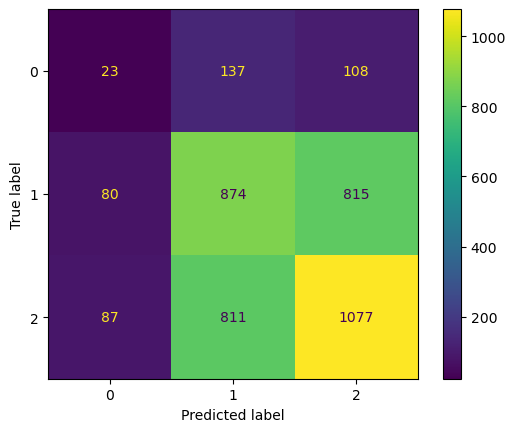


The confusion matrix for k = 5



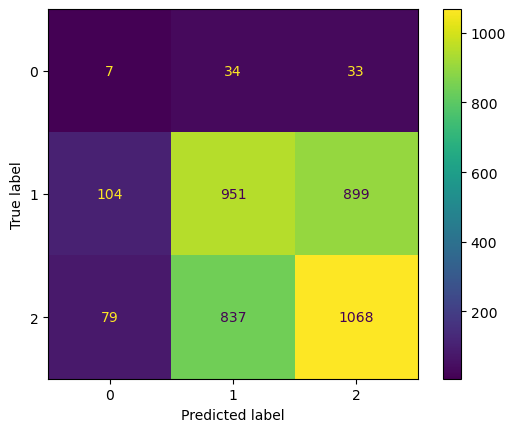


The confusion matrix for k = 7



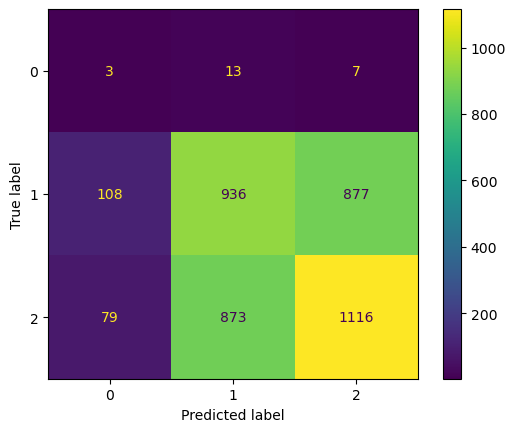


The confusion matrix for k = 9



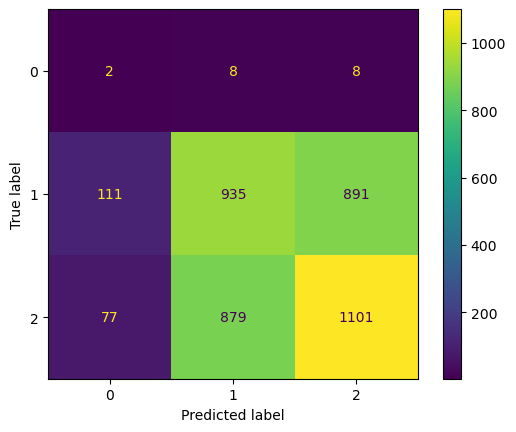


The confusion matrix for k = 13



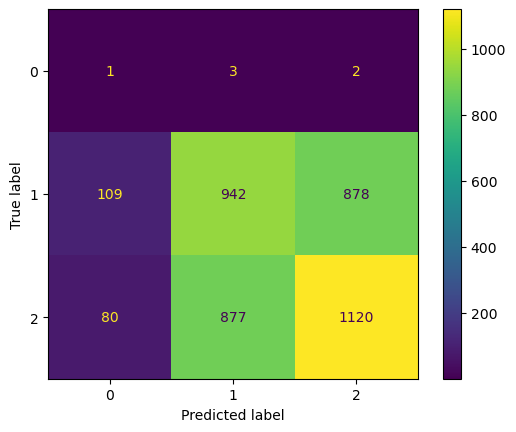


The confusion matrix for k = 15



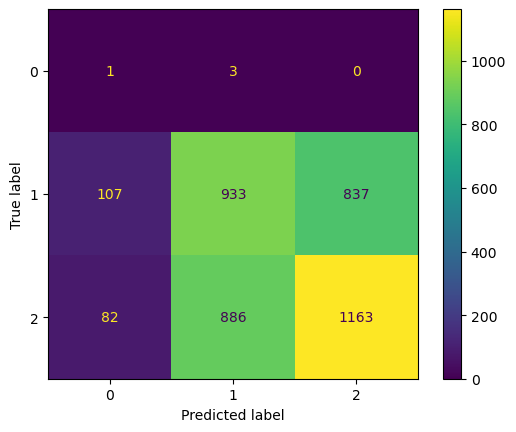


The confusion matrix for k = 20



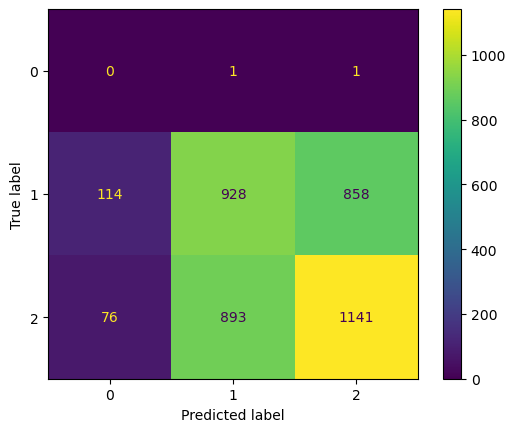


The confusion matrix for k = 50



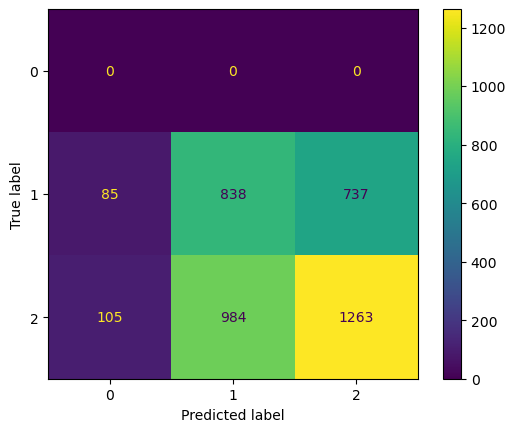


The confusion matrix for k = 100



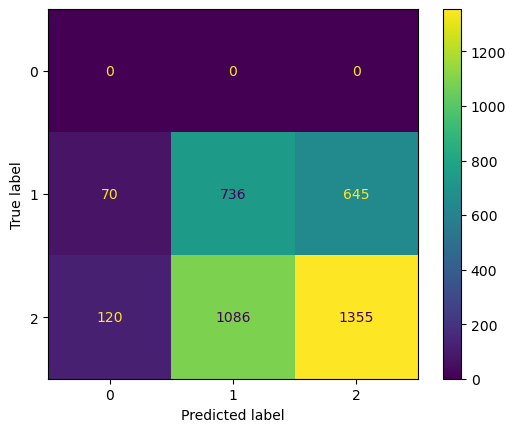

In [28]:
# In this chapter I will present the difference in the accuracy of the K Neighbors algorithm between the df and df_adv data.

k_range = (3, 5, 7, 9, 13, 15, 20, 50, 100) # Tuple of neighbors amount
scores = {} # dict which will store the neigbors amount along with the accuracy score
scores_list = [] # list of accuracy scores

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k) # Defining the model
    knn.fit(X_train, y_train) # fitting the model
    y_pred = knn.predict(X_test) # predicting the values on the test data
    scores[k] = metrics.accuracy_score(y_test, y_pred) # calculating the accuracy
    scores_list.append(metrics.accuracy_score(y_test,y_pred)) # appending the score to scores_list
    cm = confusion_matrix(y_pred, y_test, labels = knn.classes_) # creating a confusion matrix
    print(f'The confusion matrix for k = {k}')
    print()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
    disp.plot()
    plt.show()
    print()

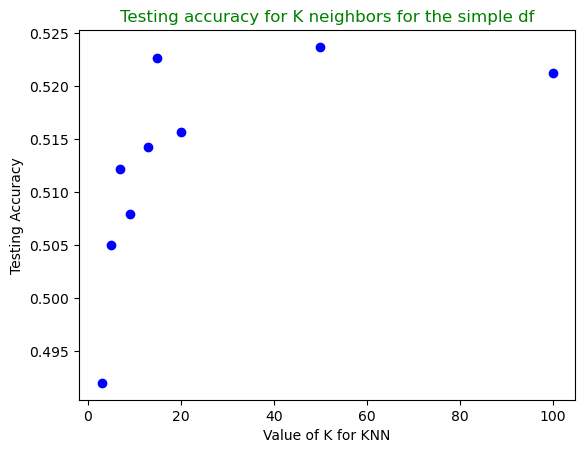

In [29]:
# Plotting the accuracy scores for each neighbor
plt.scatter(k_range, scores_list, c ="blue")
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('Testing accuracy for K neighbors for the simple df', color = "green")
plt.show()

The confusion matrix for k = 3



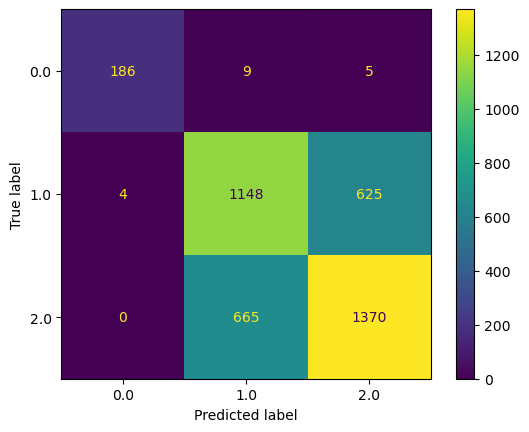


The confusion matrix for k = 5



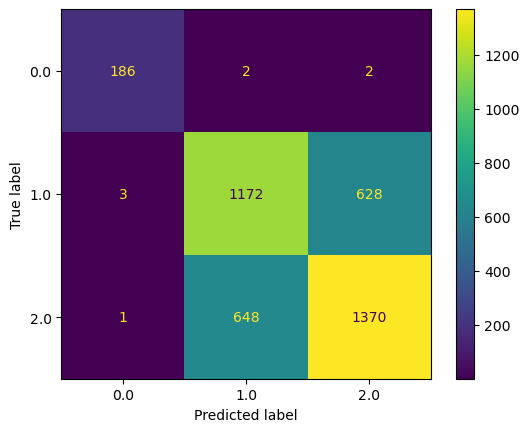


The confusion matrix for k = 7




The confusion matrix for k = 9



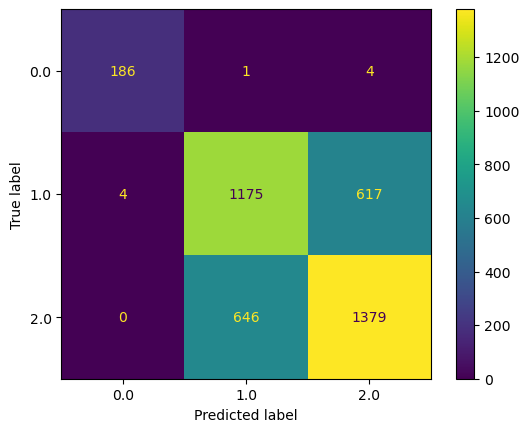


The confusion matrix for k = 13



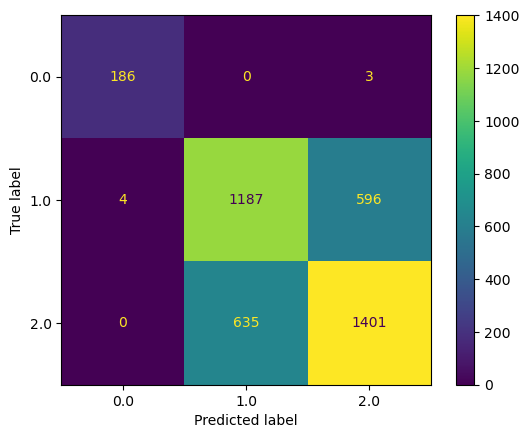


The confusion matrix for k = 15




The confusion matrix for k = 20




The confusion matrix for k = 50




The confusion matrix for k = 100



In [30]:
# The same as for the simple df.
k_range_adv = (3, 5, 7, 9, 13, 15, 20, 50, 100)
scores_adv = {}
scores_list_adv = []
for k in k_range_adv:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_adv, y_train_adv)
    y_pred = knn.predict(X_test_adv)
    scores_adv[k] = metrics.accuracy_score(y_test_adv, y_pred)
    scores_list_adv.append(metrics.accuracy_score(y_test_adv,y_pred))
    cm = confusion_matrix(y_pred, y_test_adv)
    print(f'The confusion matrix for k = {k}')
    print()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
    disp.plot()
    plt.show()
    print()

In [31]:
# Plotting the accuracy scores for each neighbor
plt.scatter(k_range_adv, scores_list_adv, c ="purple")
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('Testing accuracy for K neighbors for the advanced df', color = "green")
plt.show()

In [32]:
def average(lst):
    """
        Calculates the average value for a list
        
        Parameters
        ----------
        lst 
            list with values of accuracy scores
        
        Returns
        -------
        numpy.float64
                        the average value in a list
            
    """
        
    return sum(lst) / len(lst)

def compare(s1, s2):
    """
        Compares the accuracy score between two models
        
        Parameters
        ----------
        s1 
            the accuracy score for the model trained on the simple dataframe
        
        s12
            the accuracy score for the model trained on the advanced dataframe
            
        
        Returns
        -------
        numpy.float64
                        the difference in the accuracy scores
            
    """
    
    if s2 > s1:
        diff = s2 - s1
        print(f"The model which was trained on the advanced dataframe had an accuracy score of {round(s2*100,4)}% \n and it was higher than the model trained on the simple dataframe by {round(diff*100,4)}%.")
    
    elif s1 > s2: 
        diff = s1 - s2
        print(f"The model which was trained on the simple dataframe had an accuracy score of {round(s1*100,4)}% \n and it was higher than the model trained on the advanced dataframe by {round(diff*100,4)}%.")
    else:
        print(f"The accuracy scores were the same for both trained models and they were equal to {round(s1*100,4)}%.")

In [33]:
# Comparing the average scores for the two models
s1 = average(scores_list)
s2 = average(scores_list_adv)

compare(s1, s2)

The model which was trained on the advanced dataframe had an accuracy score of 68.5638% 
 and it was higher than the model trained on the simple dataframe by 17.2898%.


# Chapter 5: Classification using the Gaussian NB algorithm

Number of mislabeled points out of a total 4012 points : 1434


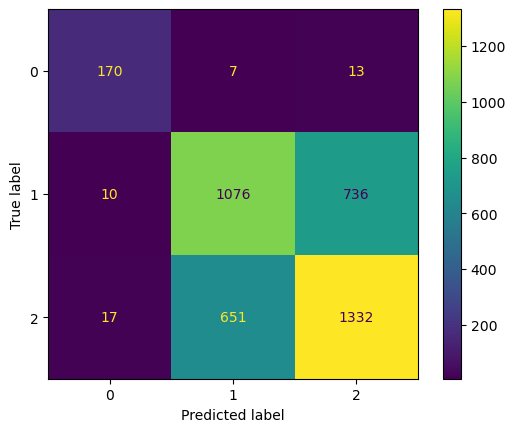

In [34]:
# In this chapter I will present the difference in the accuracy of the Gaussian NB algorithm between the df and df_adv data.

gnb = GaussianNB() # defining the model 
y_pred = gnb.fit(X_train, y_train).predict(X_test) # fitting the model and predicting the values
print("Number of mislabeled points out of a total %d points : %d"  % (X_test.shape[0], (y_test != y_pred).sum()))
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_) # creating the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()
plt.show()
score = gnb.score(X_test, y_test) # calculating the accuracy score

In [35]:
# The same as above but for the advanced dataframe.
gnb = GaussianNB()
y_pred_adv = gnb.fit(X_train_adv, y_train_adv).predict(X_test_adv)
print("Number of mislabeled points out of a total %d points : %d"  % (X_test_adv.shape[0], (y_test_adv != y_pred_adv).sum()))
cm = confusion_matrix(y_test_adv, y_pred_adv, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()
plt.show()
score_adv = gnb.score(X_test_adv, y_test_adv)

Number of mislabeled points out of a total 4012 points : 1822


In [36]:
compare(score, score_adv)

The model which was trained on the simple dataframe had an accuracy score of 64.2572% 
 and it was higher than the model trained on the advanced dataframe by 9.671%.


# Chapter 6: Classification using the Decision Tree algorithm

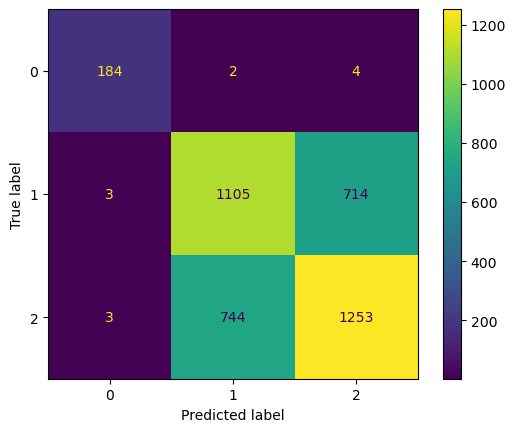

In [37]:
# In this chapter I will present the difference in the accuracy of the Decision Tree algorithm between the df and df_adv data.

dtc = DecisionTreeClassifier() # defining the model
dtc.fit(X_train, y_train) # fitting the model
dtc_score = dtc.score(X_test, y_test) # calculating the accuracy score
y_pred = dtc.predict(X_test) # predicting the values
l = list(df.columns.values) # list of values from the df
cm = confusion_matrix(y_test, y_pred, labels = dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.show()

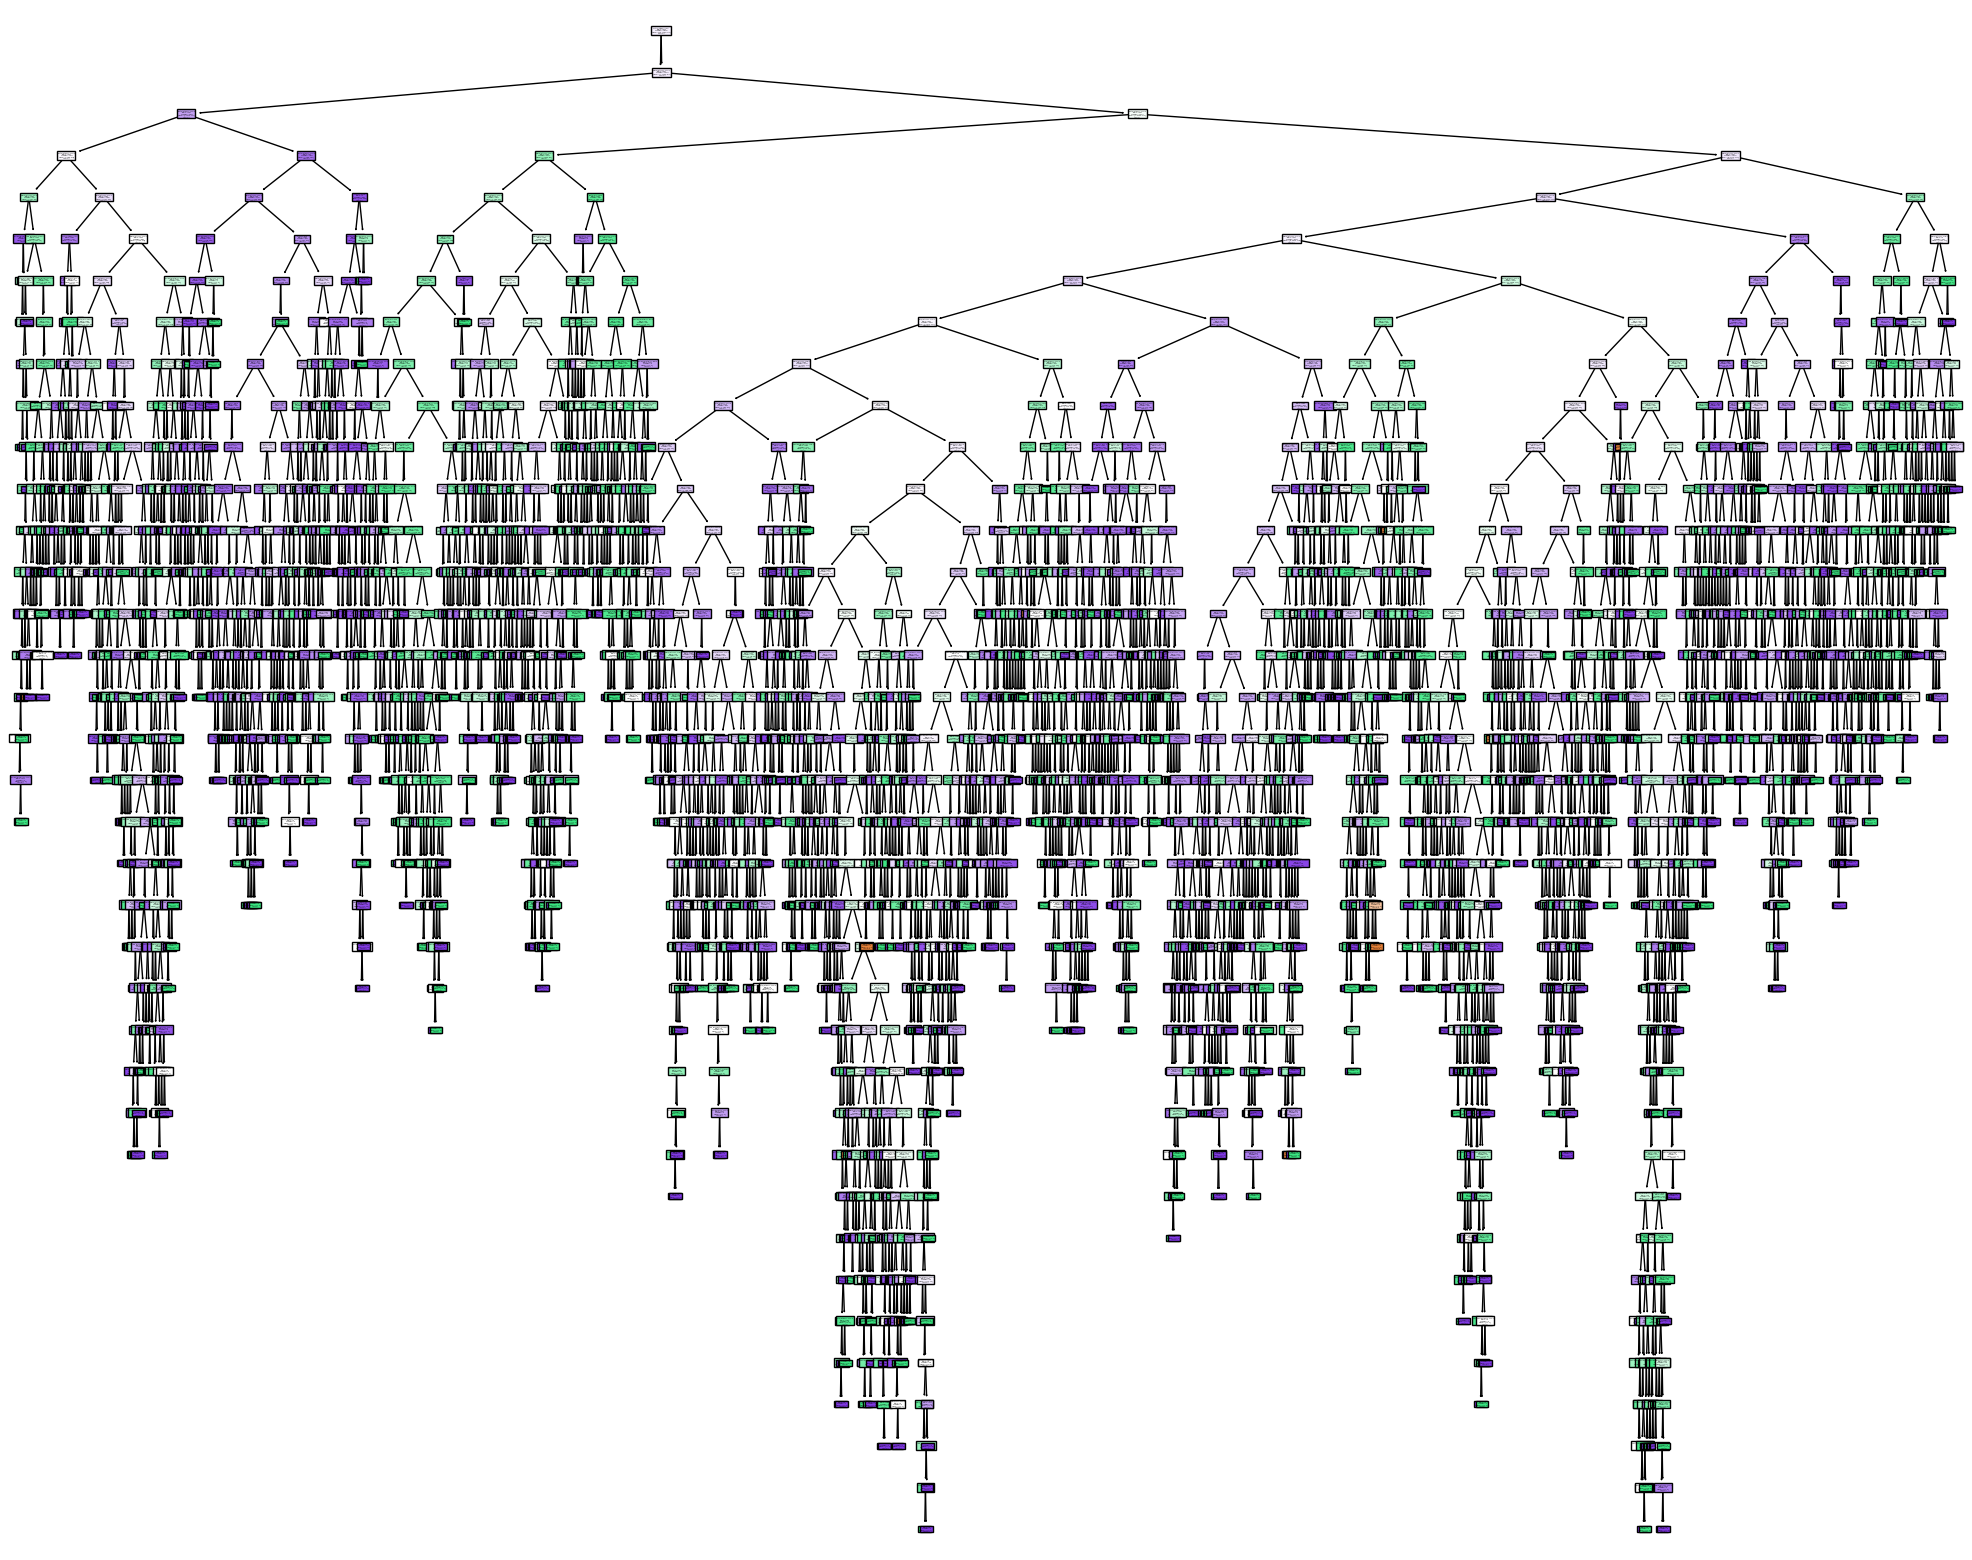

In [38]:
# plotting how the decision tree works
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=l[1:21],  
                   class_names=l[0],
                   filled=True)

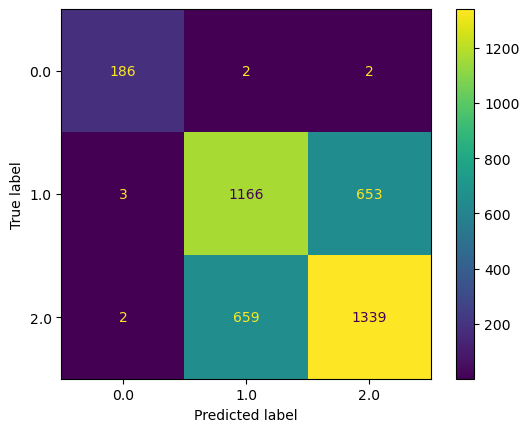

In [39]:
# Same as above but for df_adv
dtc = DecisionTreeClassifier() 
dtc.fit(X_train_adv, y_train_adv) 
dtc_score_adv = dtc.score(X_test_adv, y_test_adv)
y_pred_adv = dtc.predict(X_test_adv)
l_adv = list(df_adv.columns.values) # list of values from the df
cm = confusion_matrix(y_test_adv, y_pred_adv, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.show()

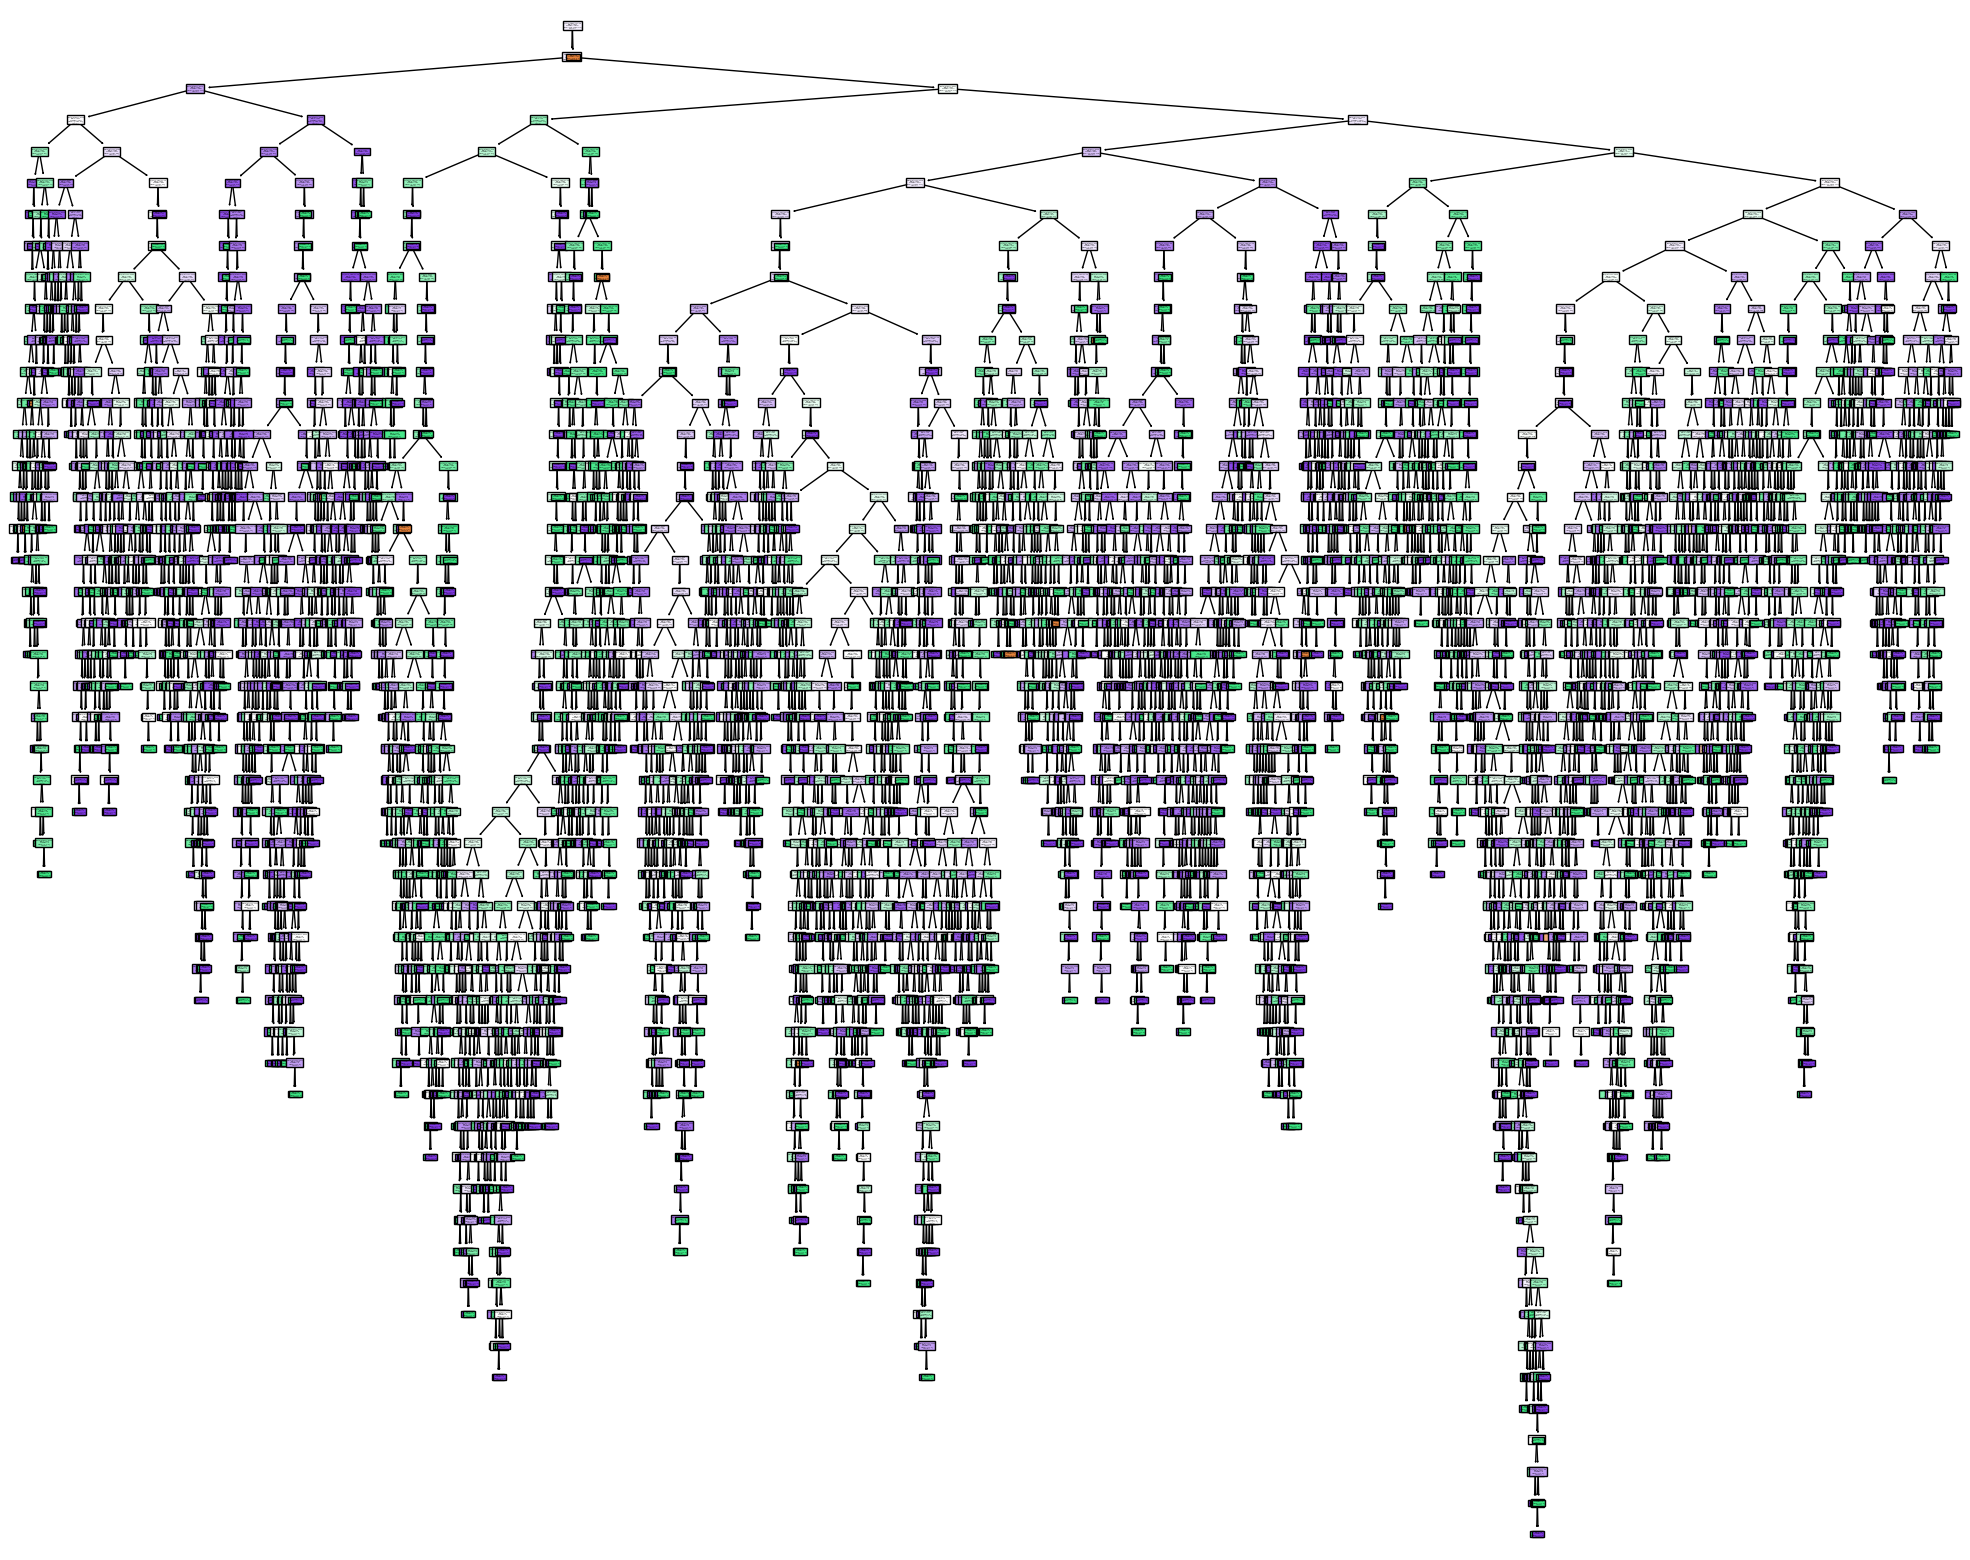

In [40]:
# plotting how the decision tree works
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=l_adv[1:101],  
                   class_names=l_adv[0],
                   filled=True)

In [41]:
compare(dtc_score, dtc_score_adv)

The model which was trained on the advanced dataframe had an accuracy score of 67.0738% 
 and it was higher than the model trained on the simple dataframe by 3.7139%.


# Chapter 7: Classification using the Neural Network

### First model: Solver 'lbfgs', activation 'relu' 

In [42]:
clf = MLPClassifier(solver='lbfgs',activation = 'relu', alpha=1e-5, hidden_layer_sizes=(18,9,3),learning_rate_init = 0.01, 
                    random_state=275114, max_iter = 500, verbose = True) # defining the model 

clf.fit(X_train, y_train) # fitting the model 
prediction = clf.predict(X_test) # predicting the values
print(prediction)

[2 2 2 ... 2 2 2]


In [43]:
np.unique(prediction, return_counts=True) # getting the unique values from the prediction
# the model only predicts that white will win - I evaluate it poorly.

(array([2], dtype=int64), array([4012], dtype=int64))

In [44]:
acc = metrics.accuracy_score(prediction,y_test) # measuring the accuracy of the model.
cm = confusion_matrix(y_test, prediction, labels=clf.classes_) # creating the confusion matrix and displaying it.
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [45]:
# Showing the classification report.
print(classification_report(y_test, prediction, zero_division=1)) 
# By setting zero_division we don't get a warning when there is 0 in our recall and f1-score.

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       190
           1       1.00      0.00      0.00      1822
           2       0.50      1.00      0.67      2000

    accuracy                           0.50      4012
   macro avg       0.83      0.33      0.22      4012
weighted avg       0.75      0.50      0.33      4012



In [46]:
# Splitting the data.
X = df.values[:, 1:17]
y = df.values[:, 0]

# Getting the scores of the model.
train_sizes, train_scores, test_scores = learning_curve(clf, X, y)

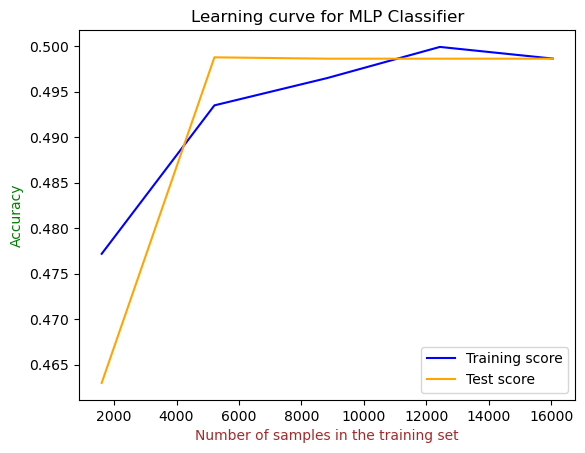

In [47]:
# Plotting the learning curve.

plt.plot(train_sizes,np.mean(train_scores,axis=1), color = 'blue', label = 'Training score') 
plt.plot(train_sizes,np.mean(test_scores,axis=1), color = "orange", label = 'Test score')
# Plotting the mean score for each size.

plt.legend() # legend set based on labels
plt.xlabel('Number of samples in the training set', color = 'brown')
plt.ylabel('Accuracy', color = 'green') 
plt.title('Learning curve for MLP Classifier')
plt.show()

In [48]:
# The same as above but for the df_adv.
clf_adv = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(18,9,3),
                        learning_rate_init = 0.01, random_state=275114,
                       max_iter = 50000, verbose = True)

clf_adv.fit(X_train_adv, y_train_adv)
prediction_adv = clf_adv.predict(X_test_adv)
print(prediction_adv)

[2. 1. 1. ... 2. 1. 1.]


In [49]:
np.unique(prediction_adv, return_counts=True) # getting the unique values from the prediction
# Looks better than the model made on the simple df.

(array([0., 1., 2.]), array([ 190, 1725, 2097], dtype=int64))

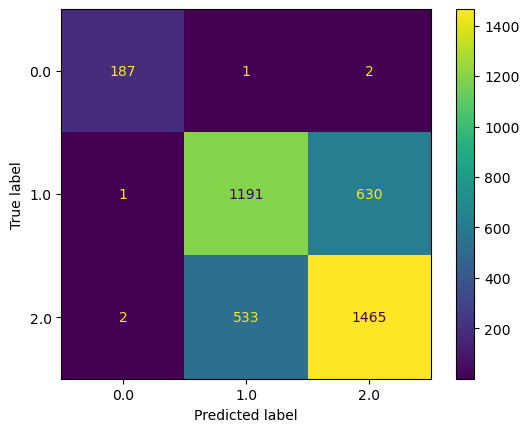

In [50]:
# The same as above but for the df_adv.
acc_adv = metrics.accuracy_score(prediction_adv, y_test_adv)
cm = confusion_matrix(y_test_adv, prediction_adv, labels=clf_adv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_adv.classes_)
disp.plot()
plt.show()

In [51]:
# Showing the classification report
print(classification_report(y_test_adv, prediction_adv, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       190
         1.0       0.69      0.65      0.67      1822
         2.0       0.70      0.73      0.72      2000

    accuracy                           0.71      4012
   macro avg       0.79      0.79      0.79      4012
weighted avg       0.71      0.71      0.71      4012



In [52]:
# Splitting the data.
X_adv = df_adv.values[:, 1:51]
y_adv = df.values[:, 0]
# Getting the scores of the model.
train_sizes, train_scores, test_scores = learning_curve(clf_adv, X_adv, y_adv)

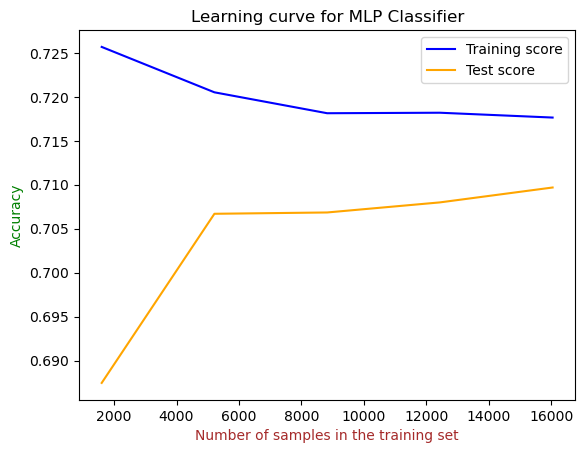

In [53]:
# Plotting the learning curve.
plt.plot(train_sizes,np.mean(train_scores,axis=1), color = 'blue', label = 'Training score')
plt.plot(train_sizes,np.mean(test_scores,axis=1), color = "orange", label = 'Test score')
plt.legend()
plt.xlabel('Number of samples in the training set', color = 'brown')
plt.ylabel('Accuracy', color = 'green') 
plt.title('Learning curve for MLP Classifier')
plt.show()

In [54]:
compare(acc, acc_adv)

The model which was trained on the advanced dataframe had an accuracy score of 70.8624% 
 and it was higher than the model trained on the simple dataframe by 21.012%.


### Second model: Solver 'Adam',  hidden layer activation 'relu', output layer activation 'softmax'

In [55]:
# Same as above but I have changed the solver, activation, hidden_layer_sizes and learning_rate_init parameters.
clf = MLPClassifier(solver='adam', activation = 'relu',alpha=1e-5, hidden_layer_sizes=(50,),
                        learning_rate_init = 0.001, random_state=275114,
                       max_iter = 50000, verbose = True)

clf.out_activation_ = 'softmax' # Setting the output layer's activation function to softmax

clf.fit(X_train, y_train) # Fitting the model.
prediction = clf.predict(X_test) # Making predictions.
print(prediction)

Iteration 1, loss = 20.76263733
Iteration 2, loss = 18.71273507
Iteration 3, loss = 17.15502836
Iteration 4, loss = 14.78772394
Iteration 5, loss = 13.07480212
Iteration 6, loss = 12.62536222
Iteration 7, loss = 12.00657288
Iteration 8, loss = 11.38913895
Iteration 9, loss = 11.98351536
Iteration 10, loss = 11.08475206
Iteration 11, loss = 10.88547053
Iteration 12, loss = 10.81480749
Iteration 13, loss = 10.02574197
Iteration 14, loss = 8.60366416
Iteration 15, loss = 9.87590895
Iteration 16, loss = 9.95831755
Iteration 17, loss = 8.79026213
Iteration 18, loss = 10.00221319
Iteration 19, loss = 7.33711122
Iteration 20, loss = 9.06822785
Iteration 21, loss = 7.95496849
Iteration 22, loss = 8.31110751
Iteration 23, loss = 9.13414306
Iteration 24, loss = 8.65082303
Iteration 25, loss = 7.02871456
Iteration 26, loss = 8.02399570
Iteration 27, loss = 8.55142845
Iteration 28, loss = 8.72262092
Iteration 29, loss = 7.93263181
Iteration 30, loss = 6.36499552
Iteration 31, loss = 7.74872624
Ite

In [56]:
np.unique(prediction, return_counts=True) # getting the unique values from the prediction
# the model only predicts white will win - I evaluate it poorly

(array([0, 1, 2], dtype=int64), array([ 258,  940, 2814], dtype=int64))

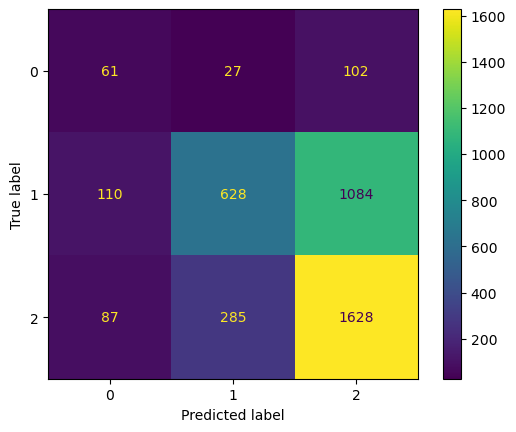

In [57]:
# The same as before.
acc = metrics.accuracy_score(prediction,y_test)
cm = confusion_matrix(y_test, prediction, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [58]:
# Showing the classification report
print(classification_report(y_test, prediction, zero_division=1)) 
# By setting zero_division we don't get a warning when there is 0 in our recall and f1-score

              precision    recall  f1-score   support

           0       0.24      0.32      0.27       190
           1       0.67      0.34      0.45      1822
           2       0.58      0.81      0.68      2000

    accuracy                           0.58      4012
   macro avg       0.49      0.49      0.47      4012
weighted avg       0.60      0.58      0.56      4012



In [59]:
# Preparing the learning curve.
train_sizes, train_scores, test_scores = learning_curve(clf, X, y)

Iteration 1, loss = 32.90896389
Iteration 2, loss = 23.29417870
Iteration 3, loss = 20.37526648
Iteration 4, loss = 19.64814979
Iteration 5, loss = 19.18275793
Iteration 6, loss = 19.53555580
Iteration 7, loss = 18.97568963
Iteration 8, loss = 19.22305954
Iteration 9, loss = 19.06439195
Iteration 10, loss = 19.11249692
Iteration 11, loss = 18.89645733
Iteration 12, loss = 18.96747965
Iteration 13, loss = 19.14018619
Iteration 14, loss = 19.04149596
Iteration 15, loss = 19.09468073
Iteration 16, loss = 18.83304321
Iteration 17, loss = 19.64985282
Iteration 18, loss = 18.97924241
Iteration 19, loss = 18.10495554
Iteration 20, loss = 18.38592170
Iteration 21, loss = 18.75245438
Iteration 22, loss = 17.65199740
Iteration 23, loss = 18.40033494
Iteration 24, loss = 18.36351509
Iteration 25, loss = 18.18170560
Iteration 26, loss = 17.82697780
Iteration 27, loss = 18.47454648
Iteration 28, loss = 17.07916580
Iteration 29, loss = 17.45676554
Iteration 30, loss = 17.12811229
Iteration 31, loss 

Iteration 91, loss = 6.40187480
Iteration 92, loss = 6.17698778
Iteration 93, loss = 5.83517725
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 21.49850253
Iteration 2, loss = 19.20918911
Iteration 3, loss = 18.12480548
Iteration 4, loss = 16.61863995
Iteration 5, loss = 14.80913316
Iteration 6, loss = 13.98125748
Iteration 7, loss = 13.33843323
Iteration 8, loss = 12.98224801
Iteration 9, loss = 12.28058791
Iteration 10, loss = 11.31350550
Iteration 11, loss = 12.31016551
Iteration 12, loss = 11.65877101
Iteration 13, loss = 11.17373529
Iteration 14, loss = 10.77624305
Iteration 15, loss = 10.77310450
Iteration 16, loss = 10.24211090
Iteration 17, loss = 9.67367701
Iteration 18, loss = 11.92635132
Iteration 19, loss = 9.78983019
Iteration 20, loss = 9.14960645
Iteration 21, loss = 9.17655672
Iteration 22, loss = 9.56599073
Iteration 23, loss = 8.89517470
Iteration 24, loss = 7.91699776
Iteration 25, loss = 7.65612250
Iterat

Iteration 40, loss = 11.20733720
Iteration 41, loss = 10.07412066
Iteration 42, loss = 10.19265270
Iteration 43, loss = 9.24643426
Iteration 44, loss = 8.72127099
Iteration 45, loss = 13.27216388
Iteration 46, loss = 9.30177419
Iteration 47, loss = 10.01922791
Iteration 48, loss = 10.08832781
Iteration 49, loss = 12.54780803
Iteration 50, loss = 11.05876360
Iteration 51, loss = 9.21296701
Iteration 52, loss = 8.98829688
Iteration 53, loss = 9.68241355
Iteration 54, loss = 9.59384428
Iteration 55, loss = 8.91891800
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 22.46694014
Iteration 2, loss = 19.02116862
Iteration 3, loss = 19.14344454
Iteration 4, loss = 17.79745243
Iteration 5, loss = 16.73336638
Iteration 6, loss = 15.42894162
Iteration 7, loss = 14.38244010
Iteration 8, loss = 13.18383333
Iteration 9, loss = 12.69702312
Iteration 10, loss = 13.81285396
Iteration 11, loss = 11.85892692
Iteration 12, loss = 11.24831692
Ite

Iteration 49, loss = 14.98677580
Iteration 50, loss = 14.69674471
Iteration 51, loss = 14.72560787
Iteration 52, loss = 15.96049733
Iteration 53, loss = 16.04687148
Iteration 54, loss = 16.25527410
Iteration 55, loss = 14.12782154
Iteration 56, loss = 14.02255031
Iteration 57, loss = 14.39240231
Iteration 58, loss = 15.20044721
Iteration 59, loss = 13.82248196
Iteration 60, loss = 16.24205195
Iteration 61, loss = 13.54283719
Iteration 62, loss = 13.38378415
Iteration 63, loss = 14.37452993
Iteration 64, loss = 13.77695058
Iteration 65, loss = 14.76149402
Iteration 66, loss = 13.50117263
Iteration 67, loss = 13.18399659
Iteration 68, loss = 14.71120306
Iteration 69, loss = 16.59301945
Iteration 70, loss = 15.60546325
Iteration 71, loss = 13.55987887
Iteration 72, loss = 14.23563246
Iteration 73, loss = 13.98653548
Iteration 74, loss = 13.57466825
Iteration 75, loss = 13.31539503
Iteration 76, loss = 13.52730062
Iteration 77, loss = 12.09623108
Iteration 78, loss = 12.33987758
Iteration 

Iteration 27, loss = 9.90080296
Iteration 28, loss = 10.80618033
Iteration 29, loss = 8.32667721
Iteration 30, loss = 7.51290764
Iteration 31, loss = 9.38494679
Iteration 32, loss = 10.80279041
Iteration 33, loss = 8.72845586
Iteration 34, loss = 8.91232906
Iteration 35, loss = 6.94341624
Iteration 36, loss = 7.92482351
Iteration 37, loss = 8.43277736
Iteration 38, loss = 7.10527684
Iteration 39, loss = 7.86429473
Iteration 40, loss = 6.46066943
Iteration 41, loss = 8.61686520
Iteration 42, loss = 6.56793614
Iteration 43, loss = 7.84973009
Iteration 44, loss = 11.93459824
Iteration 45, loss = 7.64081435
Iteration 46, loss = 6.59588247
Iteration 47, loss = 6.30565896
Iteration 48, loss = 8.36208778
Iteration 49, loss = 7.36539331
Iteration 50, loss = 8.01005908
Iteration 51, loss = 5.68609498
Iteration 52, loss = 8.09031440
Iteration 53, loss = 6.02791950
Iteration 54, loss = 6.82968798
Iteration 55, loss = 7.05801322
Iteration 56, loss = 8.17801498
Iteration 57, loss = 8.89748879
Itera

Iteration 44, loss = 8.72582116
Iteration 45, loss = 9.97246236
Iteration 46, loss = 10.56257329
Iteration 47, loss = 9.07242727
Iteration 48, loss = 9.18153254
Iteration 49, loss = 10.06732653
Iteration 50, loss = 11.23208851
Iteration 51, loss = 9.68289338
Iteration 52, loss = 8.91547465
Iteration 53, loss = 8.58856938
Iteration 54, loss = 8.84290624
Iteration 55, loss = 9.66706105
Iteration 56, loss = 10.06564196
Iteration 57, loss = 8.93786683
Iteration 58, loss = 8.07650897
Iteration 59, loss = 9.21170338
Iteration 60, loss = 8.79394497
Iteration 61, loss = 11.88437310
Iteration 62, loss = 10.26642334
Iteration 63, loss = 8.31974709
Iteration 64, loss = 9.07127207
Iteration 65, loss = 9.74142277
Iteration 66, loss = 7.77366815
Iteration 67, loss = 7.59260338
Iteration 68, loss = 9.31509349
Iteration 69, loss = 8.21958686
Iteration 70, loss = 10.11676459
Iteration 71, loss = 9.36301226
Iteration 72, loss = 7.18471656
Iteration 73, loss = 8.66842938
Iteration 74, loss = 10.82375520


Iteration 35, loss = 18.11758832
Iteration 36, loss = 16.38534437
Iteration 37, loss = 16.59472935
Iteration 38, loss = 16.18974719
Iteration 39, loss = 16.91287978
Iteration 40, loss = 15.51162126
Iteration 41, loss = 16.00026819
Iteration 42, loss = 15.59697910
Iteration 43, loss = 16.62542642
Iteration 44, loss = 16.10927266
Iteration 45, loss = 16.23134258
Iteration 46, loss = 16.13269789
Iteration 47, loss = 17.39913232
Iteration 48, loss = 16.24795957
Iteration 49, loss = 14.98677580
Iteration 50, loss = 14.69674471
Iteration 51, loss = 14.72560787
Iteration 52, loss = 15.96049733
Iteration 53, loss = 16.04687148
Iteration 54, loss = 16.25527410
Iteration 55, loss = 14.12782154
Iteration 56, loss = 14.02255031
Iteration 57, loss = 14.39240231
Iteration 58, loss = 15.20044721
Iteration 59, loss = 13.82248196
Iteration 60, loss = 16.24205195
Iteration 61, loss = 13.54283719
Iteration 62, loss = 13.38378415
Iteration 63, loss = 14.37452993
Iteration 64, loss = 13.77695058
Iteration 

Iteration 27, loss = 9.41811962
Iteration 28, loss = 8.41525536
Iteration 29, loss = 6.99124973
Iteration 30, loss = 8.50538386
Iteration 31, loss = 9.05730577
Iteration 32, loss = 7.17392860
Iteration 33, loss = 8.20747873
Iteration 34, loss = 8.28223248
Iteration 35, loss = 7.87331331
Iteration 36, loss = 8.16054076
Iteration 37, loss = 8.63070574
Iteration 38, loss = 6.27750460
Iteration 39, loss = 7.09943109
Iteration 40, loss = 7.91142287
Iteration 41, loss = 7.68342642
Iteration 42, loss = 6.66353708
Iteration 43, loss = 7.07584475
Iteration 44, loss = 8.08968144
Iteration 45, loss = 7.24040542
Iteration 46, loss = 7.27036219
Iteration 47, loss = 6.72962981
Iteration 48, loss = 7.00262249
Iteration 49, loss = 6.29248882
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 21.00147494
Iteration 2, loss = 18.78239659
Iteration 3, loss = 16.61802800
Iteration 4, loss = 14.79967363
Iteration 5, loss = 14.19257212
Iteration 6, l

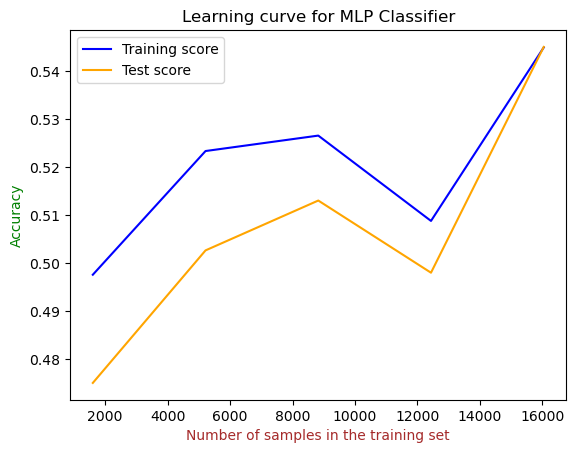

In [60]:
# Plotting the learning curve
plt.plot(train_sizes,np.mean(train_scores,axis=1), color = 'blue', label = 'Training score')
plt.plot(train_sizes,np.mean(test_scores,axis=1), color = "orange", label = 'Test score')
plt.legend()
plt.xlabel('Number of samples in the training set', color = 'brown')
plt.ylabel('Accuracy', color = 'green') 
plt.title('Learning curve for MLP Classifier')
plt.show()

In [61]:
# The same as for the simple df.

clf_adv = MLPClassifier(solver='adam', activation = 'relu',alpha=1e-5, hidden_layer_sizes=(50,),
                        learning_rate_init = 0.00001, random_state=275114,
                       max_iter = 50000, verbose = True)

clf_adv.out_activation_ = 'softmax'

clf_adv.fit(X_train_adv, y_train_adv)
prediction_adv = clf_adv.predict(X_test_adv)
print(prediction_adv)

Iteration 1, loss = 1.20007744
Iteration 2, loss = 1.19141555
Iteration 3, loss = 1.18295675
Iteration 4, loss = 1.17469594
Iteration 5, loss = 1.16661837
Iteration 6, loss = 1.15870659
Iteration 7, loss = 1.15095875
Iteration 8, loss = 1.14337567
Iteration 9, loss = 1.13594594
Iteration 10, loss = 1.12864752
Iteration 11, loss = 1.12148336
Iteration 12, loss = 1.11444674
Iteration 13, loss = 1.10752704
Iteration 14, loss = 1.10071984
Iteration 15, loss = 1.09402381
Iteration 16, loss = 1.08744118
Iteration 17, loss = 1.08097660
Iteration 18, loss = 1.07462289
Iteration 19, loss = 1.06837824
Iteration 20, loss = 1.06223788
Iteration 21, loss = 1.05619160
Iteration 22, loss = 1.05023980
Iteration 23, loss = 1.04439077
Iteration 24, loss = 1.03863531
Iteration 25, loss = 1.03297256
Iteration 26, loss = 1.02739902
Iteration 27, loss = 1.02191357
Iteration 28, loss = 1.01650786
Iteration 29, loss = 1.01119325
Iteration 30, loss = 1.00597602
Iteration 31, loss = 1.00082677
Iteration 32, los

Iteration 254, loss = 0.61675573
Iteration 255, loss = 0.61612618
Iteration 256, loss = 0.61551466
Iteration 257, loss = 0.61489420
Iteration 258, loss = 0.61428233
Iteration 259, loss = 0.61367067
Iteration 260, loss = 0.61307225
Iteration 261, loss = 0.61247740
Iteration 262, loss = 0.61188238
Iteration 263, loss = 0.61129557
Iteration 264, loss = 0.61071262
Iteration 265, loss = 0.61013708
Iteration 266, loss = 0.60956329
Iteration 267, loss = 0.60899583
Iteration 268, loss = 0.60843726
Iteration 269, loss = 0.60787735
Iteration 270, loss = 0.60732272
Iteration 271, loss = 0.60677062
Iteration 272, loss = 0.60623197
Iteration 273, loss = 0.60568577
Iteration 274, loss = 0.60514604
Iteration 275, loss = 0.60461465
Iteration 276, loss = 0.60408426
Iteration 277, loss = 0.60356018
Iteration 278, loss = 0.60304195
Iteration 279, loss = 0.60252787
Iteration 280, loss = 0.60201508
Iteration 281, loss = 0.60150860
Iteration 282, loss = 0.60101016
Iteration 283, loss = 0.60050669
Iteration 

Iteration 506, loss = 0.54387711
Iteration 507, loss = 0.54376841
Iteration 508, loss = 0.54366555
Iteration 509, loss = 0.54358345
Iteration 510, loss = 0.54347638
Iteration 511, loss = 0.54336910
Iteration 512, loss = 0.54326807
Iteration 513, loss = 0.54317337
Iteration 514, loss = 0.54307338
Iteration 515, loss = 0.54298834
Iteration 516, loss = 0.54288196
Iteration 517, loss = 0.54278862
Iteration 518, loss = 0.54269459
Iteration 519, loss = 0.54259938
Iteration 520, loss = 0.54249814
Iteration 521, loss = 0.54240670
Iteration 522, loss = 0.54231048
Iteration 523, loss = 0.54221852
Iteration 524, loss = 0.54212687
Iteration 525, loss = 0.54203599
Iteration 526, loss = 0.54194569
Iteration 527, loss = 0.54185333
Iteration 528, loss = 0.54177277
Iteration 529, loss = 0.54167721
Iteration 530, loss = 0.54158816
Iteration 531, loss = 0.54150205
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
[1. 1. 1. ... 1. 1. 1.]


In [62]:
np.unique(prediction_adv, return_counts=True) # getting the unique values from the prediction

(array([0., 1., 2.]), array([ 186, 1711, 2115], dtype=int64))

In [63]:
# The same as before.
acc_adv = metrics.accuracy_score(prediction_adv, y_test_adv)
cm = confusion_matrix(y_test_adv, prediction_adv, labels=clf_adv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_adv.classes_)
disp.plot()
plt.show()

In [64]:
# Showing the classification report
print(classification_report(y_test_adv, prediction_adv, zero_division=1))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       190
         1.0       0.68      0.64      0.66      1822
         2.0       0.69      0.73      0.71      2000

    accuracy                           0.70      4012
   macro avg       0.79      0.78      0.79      4012
weighted avg       0.70      0.70      0.70      4012



In [65]:
# Plotting the learning curve
train_sizes, train_scores, test_scores = learning_curve(clf_adv, X_adv, y_adv)
# display = LearningCurveDisplay(train_sizes=train_sizes, train_scores=train_scores, test_scores=test_scores, score_name="Score")

Iteration 1, loss = 1.21556623
Iteration 2, loss = 1.21459021
Iteration 3, loss = 1.21365769
Iteration 4, loss = 1.21275695
Iteration 5, loss = 1.21185080
Iteration 6, loss = 1.21095144
Iteration 7, loss = 1.21004981
Iteration 8, loss = 1.20916545
Iteration 9, loss = 1.20826796
Iteration 10, loss = 1.20736965
Iteration 11, loss = 1.20646421
Iteration 12, loss = 1.20556202
Iteration 13, loss = 1.20466859
Iteration 14, loss = 1.20377641
Iteration 15, loss = 1.20289846
Iteration 16, loss = 1.20201208
Iteration 17, loss = 1.20112208
Iteration 18, loss = 1.20023948
Iteration 19, loss = 1.19935960
Iteration 20, loss = 1.19848164
Iteration 21, loss = 1.19760832
Iteration 22, loss = 1.19673850
Iteration 23, loss = 1.19587936
Iteration 24, loss = 1.19501966
Iteration 25, loss = 1.19417301
Iteration 26, loss = 1.19332536
Iteration 27, loss = 1.19246987
Iteration 28, loss = 1.19160809
Iteration 29, loss = 1.19075072
Iteration 30, loss = 1.18989434
Iteration 31, loss = 1.18904047
Iteration 32, los

Iteration 276, loss = 1.02610067
Iteration 277, loss = 1.02555649
Iteration 278, loss = 1.02501668
Iteration 279, loss = 1.02448149
Iteration 280, loss = 1.02393968
Iteration 281, loss = 1.02340082
Iteration 282, loss = 1.02285769
Iteration 283, loss = 1.02231267
Iteration 284, loss = 1.02176309
Iteration 285, loss = 1.02121804
Iteration 286, loss = 1.02067570
Iteration 287, loss = 1.02014843
Iteration 288, loss = 1.01962593
Iteration 289, loss = 1.01912042
Iteration 290, loss = 1.01861911
Iteration 291, loss = 1.01810306
Iteration 292, loss = 1.01757702
Iteration 293, loss = 1.01705367
Iteration 294, loss = 1.01654304
Iteration 295, loss = 1.01603468
Iteration 296, loss = 1.01552333
Iteration 297, loss = 1.01500564
Iteration 298, loss = 1.01449133
Iteration 299, loss = 1.01398891
Iteration 300, loss = 1.01349133
Iteration 301, loss = 1.01297774
Iteration 302, loss = 1.01246108
Iteration 303, loss = 1.01194299
Iteration 304, loss = 1.01144039
Iteration 305, loss = 1.01094854
Iteration 

Iteration 537, loss = 0.91241772
Iteration 538, loss = 0.91205058
Iteration 539, loss = 0.91168956
Iteration 540, loss = 0.91133975
Iteration 541, loss = 0.91098990
Iteration 542, loss = 0.91064098
Iteration 543, loss = 0.91029423
Iteration 544, loss = 0.90994346
Iteration 545, loss = 0.90958957
Iteration 546, loss = 0.90923299
Iteration 547, loss = 0.90888174
Iteration 548, loss = 0.90852764
Iteration 549, loss = 0.90816853
Iteration 550, loss = 0.90780727
Iteration 551, loss = 0.90745182
Iteration 552, loss = 0.90710883
Iteration 553, loss = 0.90676255
Iteration 554, loss = 0.90641265
Iteration 555, loss = 0.90606233
Iteration 556, loss = 0.90571356
Iteration 557, loss = 0.90537229
Iteration 558, loss = 0.90504494
Iteration 559, loss = 0.90470951
Iteration 560, loss = 0.90436485
Iteration 561, loss = 0.90401667
Iteration 562, loss = 0.90366378
Iteration 563, loss = 0.90331659
Iteration 564, loss = 0.90296078
Iteration 565, loss = 0.90261051
Iteration 566, loss = 0.90226721
Iteration 

Iteration 804, loss = 0.83243478
Iteration 805, loss = 0.83219759
Iteration 806, loss = 0.83196818
Iteration 807, loss = 0.83173958
Iteration 808, loss = 0.83150700
Iteration 809, loss = 0.83127704
Iteration 810, loss = 0.83104248
Iteration 811, loss = 0.83080585
Iteration 812, loss = 0.83056993
Iteration 813, loss = 0.83034393
Iteration 814, loss = 0.83010008
Iteration 815, loss = 0.82985709
Iteration 816, loss = 0.82961937
Iteration 817, loss = 0.82939013
Iteration 818, loss = 0.82916442
Iteration 819, loss = 0.82892941
Iteration 820, loss = 0.82870185
Iteration 821, loss = 0.82846853
Iteration 822, loss = 0.82823663
Iteration 823, loss = 0.82800597
Iteration 824, loss = 0.82778634
Iteration 825, loss = 0.82755774
Iteration 826, loss = 0.82732812
Iteration 827, loss = 0.82709724
Iteration 828, loss = 0.82686092
Iteration 829, loss = 0.82662652
Iteration 830, loss = 0.82639248
Iteration 831, loss = 0.82616881
Iteration 832, loss = 0.82594892
Iteration 833, loss = 0.82572456
Iteration 

Iteration 1058, loss = 0.78432972
Iteration 1059, loss = 0.78417521
Iteration 1060, loss = 0.78402452
Iteration 1061, loss = 0.78387114
Iteration 1062, loss = 0.78371901
Iteration 1063, loss = 0.78356286
Iteration 1064, loss = 0.78341387
Iteration 1065, loss = 0.78326065
Iteration 1066, loss = 0.78311518
Iteration 1067, loss = 0.78296293
Iteration 1068, loss = 0.78281715
Iteration 1069, loss = 0.78267013
Iteration 1070, loss = 0.78251233
Iteration 1071, loss = 0.78236332
Iteration 1072, loss = 0.78220928
Iteration 1073, loss = 0.78205640
Iteration 1074, loss = 0.78190677
Iteration 1075, loss = 0.78175864
Iteration 1076, loss = 0.78162027
Iteration 1077, loss = 0.78147360
Iteration 1078, loss = 0.78132431
Iteration 1079, loss = 0.78117403
Iteration 1080, loss = 0.78102857
Iteration 1081, loss = 0.78087825
Iteration 1082, loss = 0.78073056
Iteration 1083, loss = 0.78057794
Iteration 1084, loss = 0.78043057
Iteration 1085, loss = 0.78027902
Iteration 1086, loss = 0.78013367
Iteration 1087

Iteration 1329, loss = 0.74966912
Iteration 1330, loss = 0.74956123
Iteration 1331, loss = 0.74945141
Iteration 1332, loss = 0.74934369
Iteration 1333, loss = 0.74923556
Iteration 1334, loss = 0.74913294
Iteration 1335, loss = 0.74902420
Iteration 1336, loss = 0.74891625
Iteration 1337, loss = 0.74880672
Iteration 1338, loss = 0.74870063
Iteration 1339, loss = 0.74859964
Iteration 1340, loss = 0.74848463
Iteration 1341, loss = 0.74837898
Iteration 1342, loss = 0.74826950
Iteration 1343, loss = 0.74816138
Iteration 1344, loss = 0.74805396
Iteration 1345, loss = 0.74793718
Iteration 1346, loss = 0.74783543
Iteration 1347, loss = 0.74772490
Iteration 1348, loss = 0.74761445
Iteration 1349, loss = 0.74751031
Iteration 1350, loss = 0.74740784
Iteration 1351, loss = 0.74730329
Iteration 1352, loss = 0.74719529
Iteration 1353, loss = 0.74708622
Iteration 1354, loss = 0.74696949
Iteration 1355, loss = 0.74685393
Iteration 1356, loss = 0.74674150
Iteration 1357, loss = 0.74662880
Iteration 1358

Iteration 75, loss = 1.03658831
Iteration 76, loss = 1.03471927
Iteration 77, loss = 1.03285148
Iteration 78, loss = 1.03099682
Iteration 79, loss = 1.02916428
Iteration 80, loss = 1.02733279
Iteration 81, loss = 1.02550901
Iteration 82, loss = 1.02369305
Iteration 83, loss = 1.02188591
Iteration 84, loss = 1.02008489
Iteration 85, loss = 1.01830401
Iteration 86, loss = 1.01652695
Iteration 87, loss = 1.01476744
Iteration 88, loss = 1.01300128
Iteration 89, loss = 1.01125720
Iteration 90, loss = 1.00951740
Iteration 91, loss = 1.00778325
Iteration 92, loss = 1.00608446
Iteration 93, loss = 1.00438233
Iteration 94, loss = 1.00268810
Iteration 95, loss = 1.00098698
Iteration 96, loss = 0.99929515
Iteration 97, loss = 0.99761338
Iteration 98, loss = 0.99594579
Iteration 99, loss = 0.99427642
Iteration 100, loss = 0.99261699
Iteration 101, loss = 0.99097756
Iteration 102, loss = 0.98933776
Iteration 103, loss = 0.98771048
Iteration 104, loss = 0.98608051
Iteration 105, loss = 0.98446523
It

Iteration 330, loss = 0.76376488
Iteration 331, loss = 0.76324518
Iteration 332, loss = 0.76274035
Iteration 333, loss = 0.76222859
Iteration 334, loss = 0.76171767
Iteration 335, loss = 0.76121161
Iteration 336, loss = 0.76070412
Iteration 337, loss = 0.76020413
Iteration 338, loss = 0.75969685
Iteration 339, loss = 0.75919618
Iteration 340, loss = 0.75869356
Iteration 341, loss = 0.75819206
Iteration 342, loss = 0.75769826
Iteration 343, loss = 0.75720246
Iteration 344, loss = 0.75670739
Iteration 345, loss = 0.75621672
Iteration 346, loss = 0.75572341
Iteration 347, loss = 0.75524006
Iteration 348, loss = 0.75476163
Iteration 349, loss = 0.75427516
Iteration 350, loss = 0.75379362
Iteration 351, loss = 0.75331848
Iteration 352, loss = 0.75284806
Iteration 353, loss = 0.75237160
Iteration 354, loss = 0.75190140
Iteration 355, loss = 0.75143063
Iteration 356, loss = 0.75096692
Iteration 357, loss = 0.75050249
Iteration 358, loss = 0.75003451
Iteration 359, loss = 0.74957481
Iteration 

Iteration 585, loss = 0.66855339
Iteration 586, loss = 0.66826140
Iteration 587, loss = 0.66795812
Iteration 588, loss = 0.66766101
Iteration 589, loss = 0.66736498
Iteration 590, loss = 0.66706316
Iteration 591, loss = 0.66676263
Iteration 592, loss = 0.66646669
Iteration 593, loss = 0.66617887
Iteration 594, loss = 0.66587856
Iteration 595, loss = 0.66558662
Iteration 596, loss = 0.66528380
Iteration 597, loss = 0.66499134
Iteration 598, loss = 0.66470865
Iteration 599, loss = 0.66441499
Iteration 600, loss = 0.66413095
Iteration 601, loss = 0.66384223
Iteration 602, loss = 0.66355473
Iteration 603, loss = 0.66325977
Iteration 604, loss = 0.66295907
Iteration 605, loss = 0.66267863
Iteration 606, loss = 0.66239058
Iteration 607, loss = 0.66209876
Iteration 608, loss = 0.66181105
Iteration 609, loss = 0.66152105
Iteration 610, loss = 0.66123776
Iteration 611, loss = 0.66095077
Iteration 612, loss = 0.66067576
Iteration 613, loss = 0.66038824
Iteration 614, loss = 0.66009911
Iteration 

Iteration 845, loss = 0.60577591
Iteration 846, loss = 0.60559928
Iteration 847, loss = 0.60541547
Iteration 848, loss = 0.60523164
Iteration 849, loss = 0.60505608
Iteration 850, loss = 0.60487578
Iteration 851, loss = 0.60469735
Iteration 852, loss = 0.60452285
Iteration 853, loss = 0.60434593
Iteration 854, loss = 0.60416326
Iteration 855, loss = 0.60398420
Iteration 856, loss = 0.60381143
Iteration 857, loss = 0.60363830
Iteration 858, loss = 0.60346452
Iteration 859, loss = 0.60329096
Iteration 860, loss = 0.60311456
Iteration 861, loss = 0.60294051
Iteration 862, loss = 0.60276288
Iteration 863, loss = 0.60259397
Iteration 864, loss = 0.60242514
Iteration 865, loss = 0.60224957
Iteration 866, loss = 0.60207999
Iteration 867, loss = 0.60190572
Iteration 868, loss = 0.60172894
Iteration 869, loss = 0.60156693
Iteration 870, loss = 0.60138671
Iteration 871, loss = 0.60121401
Iteration 872, loss = 0.60105330
Iteration 873, loss = 0.60088693
Iteration 874, loss = 0.60071739
Iteration 

Iteration 1100, loss = 0.57166480
Iteration 1101, loss = 0.57155357
Iteration 1102, loss = 0.57145850
Iteration 1103, loss = 0.57136607
Iteration 1104, loss = 0.57126446
Iteration 1105, loss = 0.57116852
Iteration 1106, loss = 0.57108631
Iteration 1107, loss = 0.57099167
Iteration 1108, loss = 0.57089148
Iteration 1109, loss = 0.57080444
Iteration 1110, loss = 0.57071193
Iteration 1111, loss = 0.57061325
Iteration 1112, loss = 0.57054129
Iteration 1113, loss = 0.57044307
Iteration 1114, loss = 0.57034990
Iteration 1115, loss = 0.57026131
Iteration 1116, loss = 0.57017095
Iteration 1117, loss = 0.57008640
Iteration 1118, loss = 0.56999442
Iteration 1119, loss = 0.56990738
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.20394981
Iteration 2, loss = 1.19903003
Iteration 3, loss = 1.19419130
Iteration 4, loss = 1.18943421
Iteration 5, loss = 1.18474641
Iteration 6, loss = 1.18009625
Iteration 7, loss = 1.17551875
Iteration 8, 

Iteration 230, loss = 0.73730624
Iteration 231, loss = 0.73659614
Iteration 232, loss = 0.73589568
Iteration 233, loss = 0.73519167
Iteration 234, loss = 0.73449402
Iteration 235, loss = 0.73379480
Iteration 236, loss = 0.73309898
Iteration 237, loss = 0.73241215
Iteration 238, loss = 0.73173216
Iteration 239, loss = 0.73102730
Iteration 240, loss = 0.73034605
Iteration 241, loss = 0.72965813
Iteration 242, loss = 0.72897543
Iteration 243, loss = 0.72829096
Iteration 244, loss = 0.72761478
Iteration 245, loss = 0.72693804
Iteration 246, loss = 0.72627363
Iteration 247, loss = 0.72559478
Iteration 248, loss = 0.72492713
Iteration 249, loss = 0.72426103
Iteration 250, loss = 0.72359373
Iteration 251, loss = 0.72292808
Iteration 252, loss = 0.72226570
Iteration 253, loss = 0.72160145
Iteration 254, loss = 0.72093586
Iteration 255, loss = 0.72028345
Iteration 256, loss = 0.71963297
Iteration 257, loss = 0.71897886
Iteration 258, loss = 0.71833369
Iteration 259, loss = 0.71768057
Iteration 

Iteration 481, loss = 0.60949114
Iteration 482, loss = 0.60916203
Iteration 483, loss = 0.60883813
Iteration 484, loss = 0.60851594
Iteration 485, loss = 0.60819669
Iteration 486, loss = 0.60788164
Iteration 487, loss = 0.60756650
Iteration 488, loss = 0.60725366
Iteration 489, loss = 0.60694609
Iteration 490, loss = 0.60662792
Iteration 491, loss = 0.60631701
Iteration 492, loss = 0.60600699
Iteration 493, loss = 0.60570919
Iteration 494, loss = 0.60540464
Iteration 495, loss = 0.60509043
Iteration 496, loss = 0.60478635
Iteration 497, loss = 0.60448690
Iteration 498, loss = 0.60418531
Iteration 499, loss = 0.60388309
Iteration 500, loss = 0.60358082
Iteration 501, loss = 0.60327865
Iteration 502, loss = 0.60298324
Iteration 503, loss = 0.60267919
Iteration 504, loss = 0.60241306
Iteration 505, loss = 0.60210066
Iteration 506, loss = 0.60180653
Iteration 507, loss = 0.60152240
Iteration 508, loss = 0.60123212
Iteration 509, loss = 0.60094448
Iteration 510, loss = 0.60066400
Iteration 

Iteration 734, loss = 0.55747237
Iteration 735, loss = 0.55734070
Iteration 736, loss = 0.55720853
Iteration 737, loss = 0.55707736
Iteration 738, loss = 0.55694957
Iteration 739, loss = 0.55682313
Iteration 740, loss = 0.55670984
Iteration 741, loss = 0.55656589
Iteration 742, loss = 0.55644795
Iteration 743, loss = 0.55632001
Iteration 744, loss = 0.55620298
Iteration 745, loss = 0.55607602
Iteration 746, loss = 0.55595469
Iteration 747, loss = 0.55582653
Iteration 748, loss = 0.55571481
Iteration 749, loss = 0.55560832
Iteration 750, loss = 0.55547882
Iteration 751, loss = 0.55537028
Iteration 752, loss = 0.55524352
Iteration 753, loss = 0.55513354
Iteration 754, loss = 0.55502360
Iteration 755, loss = 0.55490589
Iteration 756, loss = 0.55478533
Iteration 757, loss = 0.55467466
Iteration 758, loss = 0.55457689
Iteration 759, loss = 0.55444458
Iteration 760, loss = 0.55434627
Iteration 761, loss = 0.55423594
Iteration 762, loss = 0.55413120
Iteration 763, loss = 0.55402410
Iteration 

Iteration 188, loss = 0.71554480
Iteration 189, loss = 0.71466233
Iteration 190, loss = 0.71377295
Iteration 191, loss = 0.71289377
Iteration 192, loss = 0.71201492
Iteration 193, loss = 0.71114087
Iteration 194, loss = 0.71027467
Iteration 195, loss = 0.70939650
Iteration 196, loss = 0.70852732
Iteration 197, loss = 0.70765995
Iteration 198, loss = 0.70679189
Iteration 199, loss = 0.70592962
Iteration 200, loss = 0.70506024
Iteration 201, loss = 0.70421073
Iteration 202, loss = 0.70334253
Iteration 203, loss = 0.70250058
Iteration 204, loss = 0.70164505
Iteration 205, loss = 0.70080031
Iteration 206, loss = 0.69995496
Iteration 207, loss = 0.69910732
Iteration 208, loss = 0.69827603
Iteration 209, loss = 0.69743656
Iteration 210, loss = 0.69660742
Iteration 211, loss = 0.69577960
Iteration 212, loss = 0.69494960
Iteration 213, loss = 0.69414141
Iteration 214, loss = 0.69330868
Iteration 215, loss = 0.69249553
Iteration 216, loss = 0.69167832
Iteration 217, loss = 0.69087065
Iteration 

Iteration 439, loss = 0.57914673
Iteration 440, loss = 0.57889969
Iteration 441, loss = 0.57865264
Iteration 442, loss = 0.57841058
Iteration 443, loss = 0.57818103
Iteration 444, loss = 0.57794055
Iteration 445, loss = 0.57769627
Iteration 446, loss = 0.57746123
Iteration 447, loss = 0.57722426
Iteration 448, loss = 0.57699890
Iteration 449, loss = 0.57676807
Iteration 450, loss = 0.57653613
Iteration 451, loss = 0.57631327
Iteration 452, loss = 0.57608176
Iteration 453, loss = 0.57586232
Iteration 454, loss = 0.57563091
Iteration 455, loss = 0.57540462
Iteration 456, loss = 0.57518860
Iteration 457, loss = 0.57497739
Iteration 458, loss = 0.57474181
Iteration 459, loss = 0.57451741
Iteration 460, loss = 0.57430620
Iteration 461, loss = 0.57408213
Iteration 462, loss = 0.57387061
Iteration 463, loss = 0.57365606
Iteration 464, loss = 0.57343223
Iteration 465, loss = 0.57320957
Iteration 466, loss = 0.57300981
Iteration 467, loss = 0.57278207
Iteration 468, loss = 0.57257612
Iteration 

Iteration 53, loss = 0.90311696
Iteration 54, loss = 0.89942772
Iteration 55, loss = 0.89579627
Iteration 56, loss = 0.89222122
Iteration 57, loss = 0.88869784
Iteration 58, loss = 0.88515515
Iteration 59, loss = 0.88152765
Iteration 60, loss = 0.87794273
Iteration 61, loss = 0.87446444
Iteration 62, loss = 0.87106808
Iteration 63, loss = 0.86774838
Iteration 64, loss = 0.86450026
Iteration 65, loss = 0.86132674
Iteration 66, loss = 0.85822614
Iteration 67, loss = 0.85517797
Iteration 68, loss = 0.85219419
Iteration 69, loss = 0.84927385
Iteration 70, loss = 0.84640142
Iteration 71, loss = 0.84358149
Iteration 72, loss = 0.84080931
Iteration 73, loss = 0.83808764
Iteration 74, loss = 0.83541763
Iteration 75, loss = 0.83278622
Iteration 76, loss = 0.83020677
Iteration 77, loss = 0.82767577
Iteration 78, loss = 0.82518714
Iteration 79, loss = 0.82274184
Iteration 80, loss = 0.82034253
Iteration 81, loss = 0.81798209
Iteration 82, loss = 0.81566429
Iteration 83, loss = 0.81338753
Iteratio

Iteration 307, loss = 0.59143449
Iteration 308, loss = 0.59103831
Iteration 309, loss = 0.59063762
Iteration 310, loss = 0.59024330
Iteration 311, loss = 0.58984827
Iteration 312, loss = 0.58946037
Iteration 313, loss = 0.58907436
Iteration 314, loss = 0.58869473
Iteration 315, loss = 0.58831180
Iteration 316, loss = 0.58793926
Iteration 317, loss = 0.58755113
Iteration 318, loss = 0.58718343
Iteration 319, loss = 0.58681509
Iteration 320, loss = 0.58644604
Iteration 321, loss = 0.58608604
Iteration 322, loss = 0.58571737
Iteration 323, loss = 0.58536497
Iteration 324, loss = 0.58500215
Iteration 325, loss = 0.58464699
Iteration 326, loss = 0.58429559
Iteration 327, loss = 0.58394236
Iteration 328, loss = 0.58359806
Iteration 329, loss = 0.58326087
Iteration 330, loss = 0.58291079
Iteration 331, loss = 0.58257776
Iteration 332, loss = 0.58224203
Iteration 333, loss = 0.58190804
Iteration 334, loss = 0.58157615
Iteration 335, loss = 0.58124885
Iteration 336, loss = 0.58092219
Iteration 

Iteration 45, loss = 1.16862516
Iteration 46, loss = 1.16783221
Iteration 47, loss = 1.16704918
Iteration 48, loss = 1.16625389
Iteration 49, loss = 1.16546992
Iteration 50, loss = 1.16468213
Iteration 51, loss = 1.16388097
Iteration 52, loss = 1.16309035
Iteration 53, loss = 1.16231021
Iteration 54, loss = 1.16156099
Iteration 55, loss = 1.16080202
Iteration 56, loss = 1.16003374
Iteration 57, loss = 1.15927790
Iteration 58, loss = 1.15851836
Iteration 59, loss = 1.15774760
Iteration 60, loss = 1.15697038
Iteration 61, loss = 1.15619625
Iteration 62, loss = 1.15540917
Iteration 63, loss = 1.15463968
Iteration 64, loss = 1.15387720
Iteration 65, loss = 1.15312508
Iteration 66, loss = 1.15235387
Iteration 67, loss = 1.15158451
Iteration 68, loss = 1.15083764
Iteration 69, loss = 1.15009619
Iteration 70, loss = 1.14934073
Iteration 71, loss = 1.14857913
Iteration 72, loss = 1.14780984
Iteration 73, loss = 1.14704763
Iteration 74, loss = 1.14628697
Iteration 75, loss = 1.14554019
Iteratio

Iteration 311, loss = 1.00411220
Iteration 312, loss = 1.00363505
Iteration 313, loss = 1.00315112
Iteration 314, loss = 1.00267604
Iteration 315, loss = 1.00220190
Iteration 316, loss = 1.00172113
Iteration 317, loss = 1.00123199
Iteration 318, loss = 1.00075161
Iteration 319, loss = 1.00026352
Iteration 320, loss = 0.99977684
Iteration 321, loss = 0.99929377
Iteration 322, loss = 0.99881182
Iteration 323, loss = 0.99834949
Iteration 324, loss = 0.99788617
Iteration 325, loss = 0.99739905
Iteration 326, loss = 0.99691361
Iteration 327, loss = 0.99642014
Iteration 328, loss = 0.99593789
Iteration 329, loss = 0.99546163
Iteration 330, loss = 0.99500431
Iteration 331, loss = 0.99456055
Iteration 332, loss = 0.99412499
Iteration 333, loss = 0.99368120
Iteration 334, loss = 0.99321872
Iteration 335, loss = 0.99275441
Iteration 336, loss = 0.99228786
Iteration 337, loss = 0.99182365
Iteration 338, loss = 0.99135837
Iteration 339, loss = 0.99088471
Iteration 340, loss = 0.99042133
Iteration 

Iteration 587, loss = 0.89632287
Iteration 588, loss = 0.89599936
Iteration 589, loss = 0.89569164
Iteration 590, loss = 0.89538815
Iteration 591, loss = 0.89507748
Iteration 592, loss = 0.89476731
Iteration 593, loss = 0.89445337
Iteration 594, loss = 0.89414964
Iteration 595, loss = 0.89385027
Iteration 596, loss = 0.89356115
Iteration 597, loss = 0.89326360
Iteration 598, loss = 0.89295819
Iteration 599, loss = 0.89265277
Iteration 600, loss = 0.89234659
Iteration 601, loss = 0.89203997
Iteration 602, loss = 0.89173102
Iteration 603, loss = 0.89142484
Iteration 604, loss = 0.89111564
Iteration 605, loss = 0.89081144
Iteration 606, loss = 0.89050226
Iteration 607, loss = 0.89019945
Iteration 608, loss = 0.88989034
Iteration 609, loss = 0.88958006
Iteration 610, loss = 0.88926802
Iteration 611, loss = 0.88896675
Iteration 612, loss = 0.88866122
Iteration 613, loss = 0.88835154
Iteration 614, loss = 0.88803835
Iteration 615, loss = 0.88772447
Iteration 616, loss = 0.88741636
Iteration 

Iteration 875, loss = 0.82373972
Iteration 876, loss = 0.82354325
Iteration 877, loss = 0.82334968
Iteration 878, loss = 0.82317041
Iteration 879, loss = 0.82299058
Iteration 880, loss = 0.82280529
Iteration 881, loss = 0.82261994
Iteration 882, loss = 0.82243076
Iteration 883, loss = 0.82224528
Iteration 884, loss = 0.82205885
Iteration 885, loss = 0.82187146
Iteration 886, loss = 0.82168105
Iteration 887, loss = 0.82148624
Iteration 888, loss = 0.82129757
Iteration 889, loss = 0.82110634
Iteration 890, loss = 0.82091782
Iteration 891, loss = 0.82072909
Iteration 892, loss = 0.82054096
Iteration 893, loss = 0.82035742
Iteration 894, loss = 0.82017302
Iteration 895, loss = 0.81999043
Iteration 896, loss = 0.81980769
Iteration 897, loss = 0.81962578
Iteration 898, loss = 0.81944310
Iteration 899, loss = 0.81925992
Iteration 900, loss = 0.81907744
Iteration 901, loss = 0.81889002
Iteration 902, loss = 0.81870159
Iteration 903, loss = 0.81852433
Iteration 904, loss = 0.81834327
Iteration 

Iteration 1160, loss = 0.77978966
Iteration 1161, loss = 0.77967298
Iteration 1162, loss = 0.77954998
Iteration 1163, loss = 0.77943424
Iteration 1164, loss = 0.77931368
Iteration 1165, loss = 0.77919219
Iteration 1166, loss = 0.77906515
Iteration 1167, loss = 0.77893936
Iteration 1168, loss = 0.77881872
Iteration 1169, loss = 0.77869314
Iteration 1170, loss = 0.77857155
Iteration 1171, loss = 0.77845226
Iteration 1172, loss = 0.77832422
Iteration 1173, loss = 0.77820889
Iteration 1174, loss = 0.77808419
Iteration 1175, loss = 0.77796260
Iteration 1176, loss = 0.77784017
Iteration 1177, loss = 0.77772094
Iteration 1178, loss = 0.77759763
Iteration 1179, loss = 0.77747543
Iteration 1180, loss = 0.77735420
Iteration 1181, loss = 0.77723005
Iteration 1182, loss = 0.77710508
Iteration 1183, loss = 0.77698302
Iteration 1184, loss = 0.77686311
Iteration 1185, loss = 0.77674335
Iteration 1186, loss = 0.77662169
Iteration 1187, loss = 0.77650462
Iteration 1188, loss = 0.77638185
Iteration 1189

Iteration 1443, loss = 0.74908595
Iteration 1444, loss = 0.74899046
Iteration 1445, loss = 0.74889847
Iteration 1446, loss = 0.74880837
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.20992572
Iteration 2, loss = 1.20697115
Iteration 3, loss = 1.20403314
Iteration 4, loss = 1.20112939
Iteration 5, loss = 1.19825168
Iteration 6, loss = 1.19540307
Iteration 7, loss = 1.19256356
Iteration 8, loss = 1.18975913
Iteration 9, loss = 1.18697666
Iteration 10, loss = 1.18422076
Iteration 11, loss = 1.18149029
Iteration 12, loss = 1.17878704
Iteration 13, loss = 1.17610077
Iteration 14, loss = 1.17343947
Iteration 15, loss = 1.17079430
Iteration 16, loss = 1.16816283
Iteration 17, loss = 1.16554821
Iteration 18, loss = 1.16296018
Iteration 19, loss = 1.16036992
Iteration 20, loss = 1.15783762
Iteration 21, loss = 1.15530862
Iteration 22, loss = 1.15277998
Iteration 23, loss = 1.15027806
Iteration 24, loss = 1.14777740
Iteration 25, l

Iteration 259, loss = 0.80770119
Iteration 260, loss = 0.80695947
Iteration 261, loss = 0.80622512
Iteration 262, loss = 0.80548509
Iteration 263, loss = 0.80475231
Iteration 264, loss = 0.80402184
Iteration 265, loss = 0.80329670
Iteration 266, loss = 0.80257418
Iteration 267, loss = 0.80186219
Iteration 268, loss = 0.80115811
Iteration 269, loss = 0.80045914
Iteration 270, loss = 0.79975518
Iteration 271, loss = 0.79906785
Iteration 272, loss = 0.79837359
Iteration 273, loss = 0.79769401
Iteration 274, loss = 0.79701276
Iteration 275, loss = 0.79633303
Iteration 276, loss = 0.79565508
Iteration 277, loss = 0.79497983
Iteration 278, loss = 0.79430944
Iteration 279, loss = 0.79364012
Iteration 280, loss = 0.79298441
Iteration 281, loss = 0.79233676
Iteration 282, loss = 0.79168781
Iteration 283, loss = 0.79103777
Iteration 284, loss = 0.79039891
Iteration 285, loss = 0.78975673
Iteration 286, loss = 0.78911832
Iteration 287, loss = 0.78848561
Iteration 288, loss = 0.78785389
Iteration 

Iteration 522, loss = 0.69192013
Iteration 523, loss = 0.69160946
Iteration 524, loss = 0.69129879
Iteration 525, loss = 0.69098582
Iteration 526, loss = 0.69067903
Iteration 527, loss = 0.69037788
Iteration 528, loss = 0.69006282
Iteration 529, loss = 0.68976085
Iteration 530, loss = 0.68945143
Iteration 531, loss = 0.68913573
Iteration 532, loss = 0.68883204
Iteration 533, loss = 0.68851302
Iteration 534, loss = 0.68819737
Iteration 535, loss = 0.68788892
Iteration 536, loss = 0.68757479
Iteration 537, loss = 0.68727386
Iteration 538, loss = 0.68696873
Iteration 539, loss = 0.68666380
Iteration 540, loss = 0.68636021
Iteration 541, loss = 0.68605694
Iteration 542, loss = 0.68574607
Iteration 543, loss = 0.68544600
Iteration 544, loss = 0.68513518
Iteration 545, loss = 0.68482164
Iteration 546, loss = 0.68451957
Iteration 547, loss = 0.68422255
Iteration 548, loss = 0.68391399
Iteration 549, loss = 0.68360917
Iteration 550, loss = 0.68330898
Iteration 551, loss = 0.68300683
Iteration 

Iteration 781, loss = 0.62372480
Iteration 782, loss = 0.62351490
Iteration 783, loss = 0.62330050
Iteration 784, loss = 0.62308919
Iteration 785, loss = 0.62288275
Iteration 786, loss = 0.62267385
Iteration 787, loss = 0.62246321
Iteration 788, loss = 0.62226362
Iteration 789, loss = 0.62205069
Iteration 790, loss = 0.62184568
Iteration 791, loss = 0.62163939
Iteration 792, loss = 0.62143961
Iteration 793, loss = 0.62124214
Iteration 794, loss = 0.62104445
Iteration 795, loss = 0.62084313
Iteration 796, loss = 0.62064187
Iteration 797, loss = 0.62044381
Iteration 798, loss = 0.62024807
Iteration 799, loss = 0.62004755
Iteration 800, loss = 0.61984812
Iteration 801, loss = 0.61965167
Iteration 802, loss = 0.61945716
Iteration 803, loss = 0.61925890
Iteration 804, loss = 0.61905938
Iteration 805, loss = 0.61885846
Iteration 806, loss = 0.61866759
Iteration 807, loss = 0.61847327
Iteration 808, loss = 0.61827406
Iteration 809, loss = 0.61808645
Iteration 810, loss = 0.61788435
Iteration 

Iteration 1043, loss = 0.58326637
Iteration 1044, loss = 0.58314750
Iteration 1045, loss = 0.58303895
Iteration 1046, loss = 0.58293079
Iteration 1047, loss = 0.58281935
Iteration 1048, loss = 0.58271093
Iteration 1049, loss = 0.58261450
Iteration 1050, loss = 0.58249907
Iteration 1051, loss = 0.58239745
Iteration 1052, loss = 0.58229108
Iteration 1053, loss = 0.58217840
Iteration 1054, loss = 0.58207314
Iteration 1055, loss = 0.58195987
Iteration 1056, loss = 0.58185572
Iteration 1057, loss = 0.58175398
Iteration 1058, loss = 0.58164973
Iteration 1059, loss = 0.58154422
Iteration 1060, loss = 0.58142981
Iteration 1061, loss = 0.58132605
Iteration 1062, loss = 0.58122158
Iteration 1063, loss = 0.58112077
Iteration 1064, loss = 0.58102399
Iteration 1065, loss = 0.58090792
Iteration 1066, loss = 0.58081037
Iteration 1067, loss = 0.58070561
Iteration 1068, loss = 0.58060141
Iteration 1069, loss = 0.58049853
Iteration 1070, loss = 0.58039689
Iteration 1071, loss = 0.58029136
Iteration 1072

Iteration 160, loss = 0.80044419
Iteration 161, loss = 0.79927655
Iteration 162, loss = 0.79811703
Iteration 163, loss = 0.79697147
Iteration 164, loss = 0.79583497
Iteration 165, loss = 0.79471419
Iteration 166, loss = 0.79360502
Iteration 167, loss = 0.79250895
Iteration 168, loss = 0.79141394
Iteration 169, loss = 0.79033938
Iteration 170, loss = 0.78927435
Iteration 171, loss = 0.78821353
Iteration 172, loss = 0.78716476
Iteration 173, loss = 0.78611959
Iteration 174, loss = 0.78508442
Iteration 175, loss = 0.78405797
Iteration 176, loss = 0.78304094
Iteration 177, loss = 0.78204770
Iteration 178, loss = 0.78105030
Iteration 179, loss = 0.78006453
Iteration 180, loss = 0.77909431
Iteration 181, loss = 0.77813034
Iteration 182, loss = 0.77716854
Iteration 183, loss = 0.77621943
Iteration 184, loss = 0.77527370
Iteration 185, loss = 0.77433800
Iteration 186, loss = 0.77340371
Iteration 187, loss = 0.77248755
Iteration 188, loss = 0.77157523
Iteration 189, loss = 0.77067404
Iteration 

Iteration 409, loss = 0.63985485
Iteration 410, loss = 0.63941923
Iteration 411, loss = 0.63899302
Iteration 412, loss = 0.63855509
Iteration 413, loss = 0.63812751
Iteration 414, loss = 0.63769988
Iteration 415, loss = 0.63726652
Iteration 416, loss = 0.63684740
Iteration 417, loss = 0.63642294
Iteration 418, loss = 0.63600952
Iteration 419, loss = 0.63558879
Iteration 420, loss = 0.63517063
Iteration 421, loss = 0.63474737
Iteration 422, loss = 0.63433125
Iteration 423, loss = 0.63392366
Iteration 424, loss = 0.63350630
Iteration 425, loss = 0.63309318
Iteration 426, loss = 0.63268840
Iteration 427, loss = 0.63227863
Iteration 428, loss = 0.63185772
Iteration 429, loss = 0.63145714
Iteration 430, loss = 0.63104847
Iteration 431, loss = 0.63065026
Iteration 432, loss = 0.63024785
Iteration 433, loss = 0.62984325
Iteration 434, loss = 0.62944369
Iteration 435, loss = 0.62905301
Iteration 436, loss = 0.62865433
Iteration 437, loss = 0.62826505
Iteration 438, loss = 0.62787450
Iteration 

Iteration 660, loss = 0.57219407
Iteration 661, loss = 0.57203705
Iteration 662, loss = 0.57188048
Iteration 663, loss = 0.57172358
Iteration 664, loss = 0.57156894
Iteration 665, loss = 0.57142751
Iteration 666, loss = 0.57125676
Iteration 667, loss = 0.57111004
Iteration 668, loss = 0.57095846
Iteration 669, loss = 0.57080425
Iteration 670, loss = 0.57067055
Iteration 671, loss = 0.57050357
Iteration 672, loss = 0.57035669
Iteration 673, loss = 0.57021270
Iteration 674, loss = 0.57005449
Iteration 675, loss = 0.56991595
Iteration 676, loss = 0.56976412
Iteration 677, loss = 0.56961052
Iteration 678, loss = 0.56946949
Iteration 679, loss = 0.56931410
Iteration 680, loss = 0.56918949
Iteration 681, loss = 0.56903436
Iteration 682, loss = 0.56888522
Iteration 683, loss = 0.56874574
Iteration 684, loss = 0.56859968
Iteration 685, loss = 0.56845274
Iteration 686, loss = 0.56830729
Iteration 687, loss = 0.56818383
Iteration 688, loss = 0.56802773
Iteration 689, loss = 0.56788889
Iteration 

Iteration 62, loss = 0.92178058
Iteration 63, loss = 0.91870287
Iteration 64, loss = 0.91566284
Iteration 65, loss = 0.91264806
Iteration 66, loss = 0.90967431
Iteration 67, loss = 0.90672079
Iteration 68, loss = 0.90381021
Iteration 69, loss = 0.90093013
Iteration 70, loss = 0.89808461
Iteration 71, loss = 0.89527218
Iteration 72, loss = 0.89249459
Iteration 73, loss = 0.88974636
Iteration 74, loss = 0.88700665
Iteration 75, loss = 0.88420540
Iteration 76, loss = 0.88137235
Iteration 77, loss = 0.87858135
Iteration 78, loss = 0.87584731
Iteration 79, loss = 0.87316553
Iteration 80, loss = 0.87053828
Iteration 81, loss = 0.86796813
Iteration 82, loss = 0.86543441
Iteration 83, loss = 0.86294149
Iteration 84, loss = 0.86048603
Iteration 85, loss = 0.85806819
Iteration 86, loss = 0.85569466
Iteration 87, loss = 0.85335870
Iteration 88, loss = 0.85105808
Iteration 89, loss = 0.84877941
Iteration 90, loss = 0.84653354
Iteration 91, loss = 0.84432505
Iteration 92, loss = 0.84214479
Iteratio

Iteration 316, loss = 0.62606577
Iteration 317, loss = 0.62554527
Iteration 318, loss = 0.62502515
Iteration 319, loss = 0.62451155
Iteration 320, loss = 0.62400872
Iteration 321, loss = 0.62349442
Iteration 322, loss = 0.62299528
Iteration 323, loss = 0.62249463
Iteration 324, loss = 0.62200243
Iteration 325, loss = 0.62150174
Iteration 326, loss = 0.62100921
Iteration 327, loss = 0.62052325
Iteration 328, loss = 0.62003207
Iteration 329, loss = 0.61955592
Iteration 330, loss = 0.61907286
Iteration 331, loss = 0.61860443
Iteration 332, loss = 0.61812816
Iteration 333, loss = 0.61765591
Iteration 334, loss = 0.61718843
Iteration 335, loss = 0.61673162
Iteration 336, loss = 0.61626675
Iteration 337, loss = 0.61580633
Iteration 338, loss = 0.61534450
Iteration 339, loss = 0.61488693
Iteration 340, loss = 0.61443587
Iteration 341, loss = 0.61398766
Iteration 342, loss = 0.61354345
Iteration 343, loss = 0.61310401
Iteration 344, loss = 0.61265845
Iteration 345, loss = 0.61222375
Iteration 

Iteration 566, loss = 0.55681440
Iteration 567, loss = 0.55666930
Iteration 568, loss = 0.55653349
Iteration 569, loss = 0.55640928
Iteration 570, loss = 0.55626011
Iteration 571, loss = 0.55611773
Iteration 572, loss = 0.55598694
Iteration 573, loss = 0.55584676
Iteration 574, loss = 0.55571082
Iteration 575, loss = 0.55558034
Iteration 576, loss = 0.55544910
Iteration 577, loss = 0.55530801
Iteration 578, loss = 0.55516905
Iteration 579, loss = 0.55503879
Iteration 580, loss = 0.55491411
Iteration 581, loss = 0.55477098
Iteration 582, loss = 0.55464665
Iteration 583, loss = 0.55452134
Iteration 584, loss = 0.55439541
Iteration 585, loss = 0.55426840
Iteration 586, loss = 0.55414713
Iteration 587, loss = 0.55402102
Iteration 588, loss = 0.55391294
Iteration 589, loss = 0.55378316
Iteration 590, loss = 0.55366887
Iteration 591, loss = 0.55354464
Iteration 592, loss = 0.55343228
Iteration 593, loss = 0.55330880
Iteration 594, loss = 0.55320219
Iteration 595, loss = 0.55309166
Iteration 

Iteration 195, loss = 0.66632916
Iteration 196, loss = 0.66536969
Iteration 197, loss = 0.66442599
Iteration 198, loss = 0.66348464
Iteration 199, loss = 0.66253957
Iteration 200, loss = 0.66160817
Iteration 201, loss = 0.66068731
Iteration 202, loss = 0.65976747
Iteration 203, loss = 0.65884983
Iteration 204, loss = 0.65794188
Iteration 205, loss = 0.65703925
Iteration 206, loss = 0.65614515
Iteration 207, loss = 0.65524677
Iteration 208, loss = 0.65436251
Iteration 209, loss = 0.65347910
Iteration 210, loss = 0.65260418
Iteration 211, loss = 0.65172893
Iteration 212, loss = 0.65087916
Iteration 213, loss = 0.65001072
Iteration 214, loss = 0.64916391
Iteration 215, loss = 0.64832165
Iteration 216, loss = 0.64748600
Iteration 217, loss = 0.64665848
Iteration 218, loss = 0.64583184
Iteration 219, loss = 0.64501906
Iteration 220, loss = 0.64421044
Iteration 221, loss = 0.64341163
Iteration 222, loss = 0.64261407
Iteration 223, loss = 0.64182411
Iteration 224, loss = 0.64103337
Iteration 

Iteration 447, loss = 0.55529563
Iteration 448, loss = 0.55511983
Iteration 449, loss = 0.55495436
Iteration 450, loss = 0.55477782
Iteration 451, loss = 0.55460921
Iteration 452, loss = 0.55444417
Iteration 453, loss = 0.55428106
Iteration 454, loss = 0.55411586
Iteration 455, loss = 0.55395391
Iteration 456, loss = 0.55379467
Iteration 457, loss = 0.55363688
Iteration 458, loss = 0.55348541
Iteration 459, loss = 0.55332403
Iteration 460, loss = 0.55318367
Iteration 461, loss = 0.55302402
Iteration 462, loss = 0.55287921
Iteration 463, loss = 0.55272284
Iteration 464, loss = 0.55257007
Iteration 465, loss = 0.55242884
Iteration 466, loss = 0.55228097
Iteration 467, loss = 0.55214826
Iteration 468, loss = 0.55198849
Iteration 469, loss = 0.55184923
Iteration 470, loss = 0.55170594
Iteration 471, loss = 0.55157173
Iteration 472, loss = 0.55143251
Iteration 473, loss = 0.55130057
Iteration 474, loss = 0.55116526
Iteration 475, loss = 0.55103207
Iteration 476, loss = 0.55089754
Iteration 

Iteration 181, loss = 1.07514896
Iteration 182, loss = 1.07453464
Iteration 183, loss = 1.07392698
Iteration 184, loss = 1.07332972
Iteration 185, loss = 1.07272606
Iteration 186, loss = 1.07211588
Iteration 187, loss = 1.07151557
Iteration 188, loss = 1.07092411
Iteration 189, loss = 1.07033528
Iteration 190, loss = 1.06974877
Iteration 191, loss = 1.06914533
Iteration 192, loss = 1.06854595
Iteration 193, loss = 1.06793615
Iteration 194, loss = 1.06733279
Iteration 195, loss = 1.06673272
Iteration 196, loss = 1.06613278
Iteration 197, loss = 1.06553907
Iteration 198, loss = 1.06494316
Iteration 199, loss = 1.06435760
Iteration 200, loss = 1.06378402
Iteration 201, loss = 1.06320110
Iteration 202, loss = 1.06260455
Iteration 203, loss = 1.06202549
Iteration 204, loss = 1.06144417
Iteration 205, loss = 1.06086169
Iteration 206, loss = 1.06027437
Iteration 207, loss = 1.05967927
Iteration 208, loss = 1.05910115
Iteration 209, loss = 1.05851669
Iteration 210, loss = 1.05793941
Iteration 

Iteration 460, loss = 0.94021821
Iteration 461, loss = 0.93983002
Iteration 462, loss = 0.93944336
Iteration 463, loss = 0.93907132
Iteration 464, loss = 0.93870426
Iteration 465, loss = 0.93832932
Iteration 466, loss = 0.93796107
Iteration 467, loss = 0.93758937
Iteration 468, loss = 0.93721751
Iteration 469, loss = 0.93685691
Iteration 470, loss = 0.93650348
Iteration 471, loss = 0.93614061
Iteration 472, loss = 0.93577184
Iteration 473, loss = 0.93539483
Iteration 474, loss = 0.93501900
Iteration 475, loss = 0.93463735
Iteration 476, loss = 0.93427079
Iteration 477, loss = 0.93388973
Iteration 478, loss = 0.93352687
Iteration 479, loss = 0.93314935
Iteration 480, loss = 0.93277865
Iteration 481, loss = 0.93241702
Iteration 482, loss = 0.93206180
Iteration 483, loss = 0.93169488
Iteration 484, loss = 0.93131452
Iteration 485, loss = 0.93093337
Iteration 486, loss = 0.93055638
Iteration 487, loss = 0.93021161
Iteration 488, loss = 0.92985414
Iteration 489, loss = 0.92948877
Iteration 

Iteration 743, loss = 0.85227101
Iteration 744, loss = 0.85201261
Iteration 745, loss = 0.85176539
Iteration 746, loss = 0.85151564
Iteration 747, loss = 0.85127784
Iteration 748, loss = 0.85103694
Iteration 749, loss = 0.85078647
Iteration 750, loss = 0.85053522
Iteration 751, loss = 0.85028528
Iteration 752, loss = 0.85003370
Iteration 753, loss = 0.84978813
Iteration 754, loss = 0.84954907
Iteration 755, loss = 0.84931042
Iteration 756, loss = 0.84908075
Iteration 757, loss = 0.84884765
Iteration 758, loss = 0.84861443
Iteration 759, loss = 0.84838425
Iteration 760, loss = 0.84814885
Iteration 761, loss = 0.84791693
Iteration 762, loss = 0.84768168
Iteration 763, loss = 0.84744010
Iteration 764, loss = 0.84720061
Iteration 765, loss = 0.84697104
Iteration 766, loss = 0.84674035
Iteration 767, loss = 0.84651873
Iteration 768, loss = 0.84628703
Iteration 769, loss = 0.84605683
Iteration 770, loss = 0.84582267
Iteration 771, loss = 0.84559177
Iteration 772, loss = 0.84534859
Iteration 

Iteration 1021, loss = 0.79855684
Iteration 1022, loss = 0.79840897
Iteration 1023, loss = 0.79826766
Iteration 1024, loss = 0.79812433
Iteration 1025, loss = 0.79798034
Iteration 1026, loss = 0.79782707
Iteration 1027, loss = 0.79766929
Iteration 1028, loss = 0.79751918
Iteration 1029, loss = 0.79737070
Iteration 1030, loss = 0.79721683
Iteration 1031, loss = 0.79706047
Iteration 1032, loss = 0.79691166
Iteration 1033, loss = 0.79676421
Iteration 1034, loss = 0.79662439
Iteration 1035, loss = 0.79648349
Iteration 1036, loss = 0.79633490
Iteration 1037, loss = 0.79618587
Iteration 1038, loss = 0.79603470
Iteration 1039, loss = 0.79588675
Iteration 1040, loss = 0.79574000
Iteration 1041, loss = 0.79558202
Iteration 1042, loss = 0.79543442
Iteration 1043, loss = 0.79528543
Iteration 1044, loss = 0.79513688
Iteration 1045, loss = 0.79498890
Iteration 1046, loss = 0.79484400
Iteration 1047, loss = 0.79470007
Iteration 1048, loss = 0.79455774
Iteration 1049, loss = 0.79442031
Iteration 1050

Iteration 1276, loss = 0.76621811
Iteration 1277, loss = 0.76610756
Iteration 1278, loss = 0.76599177
Iteration 1279, loss = 0.76587410
Iteration 1280, loss = 0.76576353
Iteration 1281, loss = 0.76565369
Iteration 1282, loss = 0.76554974
Iteration 1283, loss = 0.76544722
Iteration 1284, loss = 0.76533782
Iteration 1285, loss = 0.76523090
Iteration 1286, loss = 0.76511973
Iteration 1287, loss = 0.76501515
Iteration 1288, loss = 0.76490293
Iteration 1289, loss = 0.76479334
Iteration 1290, loss = 0.76468443
Iteration 1291, loss = 0.76457842
Iteration 1292, loss = 0.76446747
Iteration 1293, loss = 0.76436644
Iteration 1294, loss = 0.76425395
Iteration 1295, loss = 0.76414501
Iteration 1296, loss = 0.76403265
Iteration 1297, loss = 0.76392387
Iteration 1298, loss = 0.76381889
Iteration 1299, loss = 0.76371506
Iteration 1300, loss = 0.76361424
Iteration 1301, loss = 0.76350970
Iteration 1302, loss = 0.76340746
Iteration 1303, loss = 0.76330599
Iteration 1304, loss = 0.76319867
Iteration 1305

Iteration 80, loss = 1.02929842
Iteration 81, loss = 1.02747275
Iteration 82, loss = 1.02564126
Iteration 83, loss = 1.02382951
Iteration 84, loss = 1.02201960
Iteration 85, loss = 1.02022339
Iteration 86, loss = 1.01845605
Iteration 87, loss = 1.01670265
Iteration 88, loss = 1.01492622
Iteration 89, loss = 1.01317532
Iteration 90, loss = 1.01144011
Iteration 91, loss = 1.00971720
Iteration 92, loss = 1.00798695
Iteration 93, loss = 1.00626171
Iteration 94, loss = 1.00454741
Iteration 95, loss = 1.00284033
Iteration 96, loss = 1.00114924
Iteration 97, loss = 0.99946160
Iteration 98, loss = 0.99778621
Iteration 99, loss = 0.99612273
Iteration 100, loss = 0.99448071
Iteration 101, loss = 0.99284364
Iteration 102, loss = 0.99120100
Iteration 103, loss = 0.98955773
Iteration 104, loss = 0.98791628
Iteration 105, loss = 0.98629103
Iteration 106, loss = 0.98467761
Iteration 107, loss = 0.98307492
Iteration 108, loss = 0.98147660
Iteration 109, loss = 0.97988644
Iteration 110, loss = 0.978297

Iteration 329, loss = 0.76565923
Iteration 330, loss = 0.76514566
Iteration 331, loss = 0.76463936
Iteration 332, loss = 0.76413991
Iteration 333, loss = 0.76363898
Iteration 334, loss = 0.76313908
Iteration 335, loss = 0.76264302
Iteration 336, loss = 0.76215007
Iteration 337, loss = 0.76165570
Iteration 338, loss = 0.76116306
Iteration 339, loss = 0.76067884
Iteration 340, loss = 0.76018693
Iteration 341, loss = 0.75970251
Iteration 342, loss = 0.75921411
Iteration 343, loss = 0.75873157
Iteration 344, loss = 0.75825221
Iteration 345, loss = 0.75776643
Iteration 346, loss = 0.75729105
Iteration 347, loss = 0.75681666
Iteration 348, loss = 0.75634400
Iteration 349, loss = 0.75587489
Iteration 350, loss = 0.75540795
Iteration 351, loss = 0.75494234
Iteration 352, loss = 0.75447528
Iteration 353, loss = 0.75400786
Iteration 354, loss = 0.75354388
Iteration 355, loss = 0.75307996
Iteration 356, loss = 0.75262253
Iteration 357, loss = 0.75216072
Iteration 358, loss = 0.75170462
Iteration 

Iteration 583, loss = 0.66982462
Iteration 584, loss = 0.66951554
Iteration 585, loss = 0.66921509
Iteration 586, loss = 0.66891286
Iteration 587, loss = 0.66860260
Iteration 588, loss = 0.66830670
Iteration 589, loss = 0.66800000
Iteration 590, loss = 0.66769755
Iteration 591, loss = 0.66740383
Iteration 592, loss = 0.66710315
Iteration 593, loss = 0.66680153
Iteration 594, loss = 0.66649715
Iteration 595, loss = 0.66619485
Iteration 596, loss = 0.66589647
Iteration 597, loss = 0.66559284
Iteration 598, loss = 0.66529930
Iteration 599, loss = 0.66502684
Iteration 600, loss = 0.66470728
Iteration 601, loss = 0.66440989
Iteration 602, loss = 0.66410855
Iteration 603, loss = 0.66380634
Iteration 604, loss = 0.66350925
Iteration 605, loss = 0.66320371
Iteration 606, loss = 0.66290334
Iteration 607, loss = 0.66260622
Iteration 608, loss = 0.66231330
Iteration 609, loss = 0.66201532
Iteration 610, loss = 0.66174555
Iteration 611, loss = 0.66142814
Iteration 612, loss = 0.66112296
Iteration 

Iteration 847, loss = 0.60486176
Iteration 848, loss = 0.60468708
Iteration 849, loss = 0.60450589
Iteration 850, loss = 0.60433575
Iteration 851, loss = 0.60415586
Iteration 852, loss = 0.60397991
Iteration 853, loss = 0.60379382
Iteration 854, loss = 0.60362277
Iteration 855, loss = 0.60344210
Iteration 856, loss = 0.60327382
Iteration 857, loss = 0.60309687
Iteration 858, loss = 0.60292321
Iteration 859, loss = 0.60275282
Iteration 860, loss = 0.60258373
Iteration 861, loss = 0.60241829
Iteration 862, loss = 0.60223723
Iteration 863, loss = 0.60206202
Iteration 864, loss = 0.60190021
Iteration 865, loss = 0.60172484
Iteration 866, loss = 0.60155812
Iteration 867, loss = 0.60138356
Iteration 868, loss = 0.60121376
Iteration 869, loss = 0.60104935
Iteration 870, loss = 0.60088352
Iteration 871, loss = 0.60070389
Iteration 872, loss = 0.60054091
Iteration 873, loss = 0.60038114
Iteration 874, loss = 0.60020674
Iteration 875, loss = 0.60003860
Iteration 876, loss = 0.59986821
Iteration 

Iteration 1093, loss = 0.57240027
Iteration 1094, loss = 0.57229621
Iteration 1095, loss = 0.57221160
Iteration 1096, loss = 0.57210651
Iteration 1097, loss = 0.57201310
Iteration 1098, loss = 0.57191600
Iteration 1099, loss = 0.57182197
Iteration 1100, loss = 0.57173141
Iteration 1101, loss = 0.57163481
Iteration 1102, loss = 0.57154192
Iteration 1103, loss = 0.57144789
Iteration 1104, loss = 0.57135457
Iteration 1105, loss = 0.57125628
Iteration 1106, loss = 0.57117010
Iteration 1107, loss = 0.57107906
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.20636433
Iteration 2, loss = 1.20147549
Iteration 3, loss = 1.19666440
Iteration 4, loss = 1.19191178
Iteration 5, loss = 1.18723087
Iteration 6, loss = 1.18260333
Iteration 7, loss = 1.17805749
Iteration 8, loss = 1.17355685
Iteration 9, loss = 1.16909635
Iteration 10, loss = 1.16468788
Iteration 11, loss = 1.16033273
Iteration 12, loss = 1.15602115
Iteration 13, loss = 1.15

Iteration 242, loss = 0.72660271
Iteration 243, loss = 0.72591620
Iteration 244, loss = 0.72523867
Iteration 245, loss = 0.72455883
Iteration 246, loss = 0.72387590
Iteration 247, loss = 0.72319480
Iteration 248, loss = 0.72252547
Iteration 249, loss = 0.72184977
Iteration 250, loss = 0.72117998
Iteration 251, loss = 0.72050692
Iteration 252, loss = 0.71983958
Iteration 253, loss = 0.71916871
Iteration 254, loss = 0.71849343
Iteration 255, loss = 0.71782862
Iteration 256, loss = 0.71716310
Iteration 257, loss = 0.71650702
Iteration 258, loss = 0.71584534
Iteration 259, loss = 0.71519458
Iteration 260, loss = 0.71454299
Iteration 261, loss = 0.71389137
Iteration 262, loss = 0.71323802
Iteration 263, loss = 0.71259003
Iteration 264, loss = 0.71194040
Iteration 265, loss = 0.71130452
Iteration 266, loss = 0.71065124
Iteration 267, loss = 0.71000758
Iteration 268, loss = 0.70936999
Iteration 269, loss = 0.70872689
Iteration 270, loss = 0.70809425
Iteration 271, loss = 0.70746275
Iteration 

Iteration 493, loss = 0.60369362
Iteration 494, loss = 0.60339809
Iteration 495, loss = 0.60309391
Iteration 496, loss = 0.60280962
Iteration 497, loss = 0.60251544
Iteration 498, loss = 0.60222614
Iteration 499, loss = 0.60193064
Iteration 500, loss = 0.60164832
Iteration 501, loss = 0.60135173
Iteration 502, loss = 0.60106665
Iteration 503, loss = 0.60078322
Iteration 504, loss = 0.60050665
Iteration 505, loss = 0.60021095
Iteration 506, loss = 0.59993812
Iteration 507, loss = 0.59966354
Iteration 508, loss = 0.59937837
Iteration 509, loss = 0.59910325
Iteration 510, loss = 0.59882185
Iteration 511, loss = 0.59854639
Iteration 512, loss = 0.59828414
Iteration 513, loss = 0.59800443
Iteration 514, loss = 0.59773596
Iteration 515, loss = 0.59747116
Iteration 516, loss = 0.59719569
Iteration 517, loss = 0.59692951
Iteration 518, loss = 0.59666233
Iteration 519, loss = 0.59639205
Iteration 520, loss = 0.59613147
Iteration 521, loss = 0.59586671
Iteration 522, loss = 0.59560751
Iteration 

Iteration 743, loss = 0.55739143
Iteration 744, loss = 0.55727137
Iteration 745, loss = 0.55714847
Iteration 746, loss = 0.55703679
Iteration 747, loss = 0.55691691
Iteration 748, loss = 0.55680433
Iteration 749, loss = 0.55668600
Iteration 750, loss = 0.55658620
Iteration 751, loss = 0.55647733
Iteration 752, loss = 0.55637421
Iteration 753, loss = 0.55626302
Iteration 754, loss = 0.55615567
Iteration 755, loss = 0.55604574
Iteration 756, loss = 0.55594124
Iteration 757, loss = 0.55583904
Iteration 758, loss = 0.55572832
Iteration 759, loss = 0.55561877
Iteration 760, loss = 0.55551645
Iteration 761, loss = 0.55540548
Iteration 762, loss = 0.55530712
Iteration 763, loss = 0.55520053
Iteration 764, loss = 0.55509943
Iteration 765, loss = 0.55499371
Iteration 766, loss = 0.55489058
Iteration 767, loss = 0.55478529
Iteration 768, loss = 0.55468315
Iteration 769, loss = 0.55458404
Iteration 770, loss = 0.55449487
Iteration 771, loss = 0.55438851
Iteration 772, loss = 0.55428523
Iteration 

Iteration 203, loss = 0.70051701
Iteration 204, loss = 0.69966297
Iteration 205, loss = 0.69880741
Iteration 206, loss = 0.69795845
Iteration 207, loss = 0.69711671
Iteration 208, loss = 0.69627312
Iteration 209, loss = 0.69543259
Iteration 210, loss = 0.69459673
Iteration 211, loss = 0.69376518
Iteration 212, loss = 0.69292711
Iteration 213, loss = 0.69210530
Iteration 214, loss = 0.69127027
Iteration 215, loss = 0.69044697
Iteration 216, loss = 0.68962323
Iteration 217, loss = 0.68880090
Iteration 218, loss = 0.68798552
Iteration 219, loss = 0.68717666
Iteration 220, loss = 0.68637515
Iteration 221, loss = 0.68555706
Iteration 222, loss = 0.68474741
Iteration 223, loss = 0.68395303
Iteration 224, loss = 0.68315576
Iteration 225, loss = 0.68235848
Iteration 226, loss = 0.68157578
Iteration 227, loss = 0.68078764
Iteration 228, loss = 0.68000466
Iteration 229, loss = 0.67921514
Iteration 230, loss = 0.67843922
Iteration 231, loss = 0.67766745
Iteration 232, loss = 0.67688851
Iteration 

Iteration 457, loss = 0.57391159
Iteration 458, loss = 0.57369774
Iteration 459, loss = 0.57348814
Iteration 460, loss = 0.57328042
Iteration 461, loss = 0.57307947
Iteration 462, loss = 0.57286663
Iteration 463, loss = 0.57267342
Iteration 464, loss = 0.57245398
Iteration 465, loss = 0.57225890
Iteration 466, loss = 0.57205403
Iteration 467, loss = 0.57185631
Iteration 468, loss = 0.57165866
Iteration 469, loss = 0.57145147
Iteration 470, loss = 0.57126110
Iteration 471, loss = 0.57105986
Iteration 472, loss = 0.57086852
Iteration 473, loss = 0.57067246
Iteration 474, loss = 0.57047754
Iteration 475, loss = 0.57028865
Iteration 476, loss = 0.57009604
Iteration 477, loss = 0.56990624
Iteration 478, loss = 0.56972196
Iteration 479, loss = 0.56952637
Iteration 480, loss = 0.56934622
Iteration 481, loss = 0.56915161
Iteration 482, loss = 0.56895950
Iteration 483, loss = 0.56878234
Iteration 484, loss = 0.56859410
Iteration 485, loss = 0.56839958
Iteration 486, loss = 0.56821792
Iteration 

Iteration 73, loss = 0.83771535
Iteration 74, loss = 0.83501301
Iteration 75, loss = 0.83236276
Iteration 76, loss = 0.82975607
Iteration 77, loss = 0.82719299
Iteration 78, loss = 0.82468461
Iteration 79, loss = 0.82221641
Iteration 80, loss = 0.81978412
Iteration 81, loss = 0.81739305
Iteration 82, loss = 0.81503724
Iteration 83, loss = 0.81272014
Iteration 84, loss = 0.81043813
Iteration 85, loss = 0.80819095
Iteration 86, loss = 0.80597905
Iteration 87, loss = 0.80379437
Iteration 88, loss = 0.80164778
Iteration 89, loss = 0.79952708
Iteration 90, loss = 0.79743836
Iteration 91, loss = 0.79538141
Iteration 92, loss = 0.79335611
Iteration 93, loss = 0.79136803
Iteration 94, loss = 0.78941214
Iteration 95, loss = 0.78748951
Iteration 96, loss = 0.78559870
Iteration 97, loss = 0.78373893
Iteration 98, loss = 0.78191519
Iteration 99, loss = 0.78010975
Iteration 100, loss = 0.77833811
Iteration 101, loss = 0.77659355
Iteration 102, loss = 0.77487348
Iteration 103, loss = 0.77318444
Iter

Iteration 324, loss = 0.58446138
Iteration 325, loss = 0.58411110
Iteration 326, loss = 0.58376385
Iteration 327, loss = 0.58341547
Iteration 328, loss = 0.58308045
Iteration 329, loss = 0.58274125
Iteration 330, loss = 0.58240320
Iteration 331, loss = 0.58207230
Iteration 332, loss = 0.58174349
Iteration 333, loss = 0.58141241
Iteration 334, loss = 0.58108200
Iteration 335, loss = 0.58076353
Iteration 336, loss = 0.58044165
Iteration 337, loss = 0.58011760
Iteration 338, loss = 0.57980587
Iteration 339, loss = 0.57949435
Iteration 340, loss = 0.57918776
Iteration 341, loss = 0.57888465
Iteration 342, loss = 0.57857211
Iteration 343, loss = 0.57827322
Iteration 344, loss = 0.57797215
Iteration 345, loss = 0.57767355
Iteration 346, loss = 0.57737987
Iteration 347, loss = 0.57709305
Iteration 348, loss = 0.57679838
Iteration 349, loss = 0.57651831
Iteration 350, loss = 0.57623646
Iteration 351, loss = 0.57594907
Iteration 352, loss = 0.57566677
Iteration 353, loss = 0.57539704
Iteration 

Iteration 71, loss = 1.14857913
Iteration 72, loss = 1.14780984
Iteration 73, loss = 1.14704763
Iteration 74, loss = 1.14628697
Iteration 75, loss = 1.14554019
Iteration 76, loss = 1.14480343
Iteration 77, loss = 1.14405320
Iteration 78, loss = 1.14329914
Iteration 79, loss = 1.14255374
Iteration 80, loss = 1.14180925
Iteration 81, loss = 1.14106879
Iteration 82, loss = 1.14032425
Iteration 83, loss = 1.13961025
Iteration 84, loss = 1.13889835
Iteration 85, loss = 1.13817108
Iteration 86, loss = 1.13744101
Iteration 87, loss = 1.13671086
Iteration 88, loss = 1.13598358
Iteration 89, loss = 1.13526576
Iteration 90, loss = 1.13452817
Iteration 91, loss = 1.13379803
Iteration 92, loss = 1.13307595
Iteration 93, loss = 1.13236348
Iteration 94, loss = 1.13165182
Iteration 95, loss = 1.13093027
Iteration 96, loss = 1.13020652
Iteration 97, loss = 1.12949405
Iteration 98, loss = 1.12878033
Iteration 99, loss = 1.12807298
Iteration 100, loss = 1.12737699
Iteration 101, loss = 1.12667680
Iterat

Iteration 346, loss = 0.98759282
Iteration 347, loss = 0.98714713
Iteration 348, loss = 0.98672692
Iteration 349, loss = 0.98628492
Iteration 350, loss = 0.98583332
Iteration 351, loss = 0.98538252
Iteration 352, loss = 0.98492066
Iteration 353, loss = 0.98445706
Iteration 354, loss = 0.98399474
Iteration 355, loss = 0.98354897
Iteration 356, loss = 0.98310412
Iteration 357, loss = 0.98264948
Iteration 358, loss = 0.98219909
Iteration 359, loss = 0.98174945
Iteration 360, loss = 0.98129096
Iteration 361, loss = 0.98084929
Iteration 362, loss = 0.98041091
Iteration 363, loss = 0.97998637
Iteration 364, loss = 0.97956815
Iteration 365, loss = 0.97913772
Iteration 366, loss = 0.97871572
Iteration 367, loss = 0.97828637
Iteration 368, loss = 0.97785345
Iteration 369, loss = 0.97742742
Iteration 370, loss = 0.97699143
Iteration 371, loss = 0.97655397
Iteration 372, loss = 0.97611960
Iteration 373, loss = 0.97570145
Iteration 374, loss = 0.97527092
Iteration 375, loss = 0.97483250
Iteration 

Iteration 633, loss = 0.88252403
Iteration 634, loss = 0.88224199
Iteration 635, loss = 0.88195760
Iteration 636, loss = 0.88166360
Iteration 637, loss = 0.88137181
Iteration 638, loss = 0.88108254
Iteration 639, loss = 0.88078541
Iteration 640, loss = 0.88049349
Iteration 641, loss = 0.88020237
Iteration 642, loss = 0.87991125
Iteration 643, loss = 0.87962676
Iteration 644, loss = 0.87933407
Iteration 645, loss = 0.87904076
Iteration 646, loss = 0.87873778
Iteration 647, loss = 0.87844233
Iteration 648, loss = 0.87813969
Iteration 649, loss = 0.87783778
Iteration 650, loss = 0.87753356
Iteration 651, loss = 0.87722985
Iteration 652, loss = 0.87692409
Iteration 653, loss = 0.87663029
Iteration 654, loss = 0.87633332
Iteration 655, loss = 0.87604761
Iteration 656, loss = 0.87576281
Iteration 657, loss = 0.87547945
Iteration 658, loss = 0.87518961
Iteration 659, loss = 0.87491295
Iteration 660, loss = 0.87463500
Iteration 661, loss = 0.87433448
Iteration 662, loss = 0.87402641
Iteration 

Iteration 921, loss = 0.81522993
Iteration 922, loss = 0.81504985
Iteration 923, loss = 0.81487134
Iteration 924, loss = 0.81468635
Iteration 925, loss = 0.81450762
Iteration 926, loss = 0.81433382
Iteration 927, loss = 0.81415052
Iteration 928, loss = 0.81397456
Iteration 929, loss = 0.81379689
Iteration 930, loss = 0.81362381
Iteration 931, loss = 0.81344210
Iteration 932, loss = 0.81326227
Iteration 933, loss = 0.81308557
Iteration 934, loss = 0.81290261
Iteration 935, loss = 0.81272671
Iteration 936, loss = 0.81254154
Iteration 937, loss = 0.81236692
Iteration 938, loss = 0.81220106
Iteration 939, loss = 0.81203110
Iteration 940, loss = 0.81185763
Iteration 941, loss = 0.81167787
Iteration 942, loss = 0.81150790
Iteration 943, loss = 0.81132943
Iteration 944, loss = 0.81114985
Iteration 945, loss = 0.81097917
Iteration 946, loss = 0.81080162
Iteration 947, loss = 0.81062179
Iteration 948, loss = 0.81045701
Iteration 949, loss = 0.81028750
Iteration 950, loss = 0.81010799
Iteration 

Iteration 1206, loss = 0.77425268
Iteration 1207, loss = 0.77413628
Iteration 1208, loss = 0.77402290
Iteration 1209, loss = 0.77390569
Iteration 1210, loss = 0.77379012
Iteration 1211, loss = 0.77367116
Iteration 1212, loss = 0.77355560
Iteration 1213, loss = 0.77344071
Iteration 1214, loss = 0.77333147
Iteration 1215, loss = 0.77321754
Iteration 1216, loss = 0.77310345
Iteration 1217, loss = 0.77298214
Iteration 1218, loss = 0.77286340
Iteration 1219, loss = 0.77274705
Iteration 1220, loss = 0.77263289
Iteration 1221, loss = 0.77251438
Iteration 1222, loss = 0.77239898
Iteration 1223, loss = 0.77228056
Iteration 1224, loss = 0.77216264
Iteration 1225, loss = 0.77204961
Iteration 1226, loss = 0.77192913
Iteration 1227, loss = 0.77180098
Iteration 1228, loss = 0.77168393
Iteration 1229, loss = 0.77155957
Iteration 1230, loss = 0.77144502
Iteration 1231, loss = 0.77133282
Iteration 1232, loss = 0.77121792
Iteration 1233, loss = 0.77110570
Iteration 1234, loss = 0.77099153
Iteration 1235

Iteration 14, loss = 1.17372961
Iteration 15, loss = 1.17109991
Iteration 16, loss = 1.16849170
Iteration 17, loss = 1.16589878
Iteration 18, loss = 1.16331698
Iteration 19, loss = 1.16074610
Iteration 20, loss = 1.15822143
Iteration 21, loss = 1.15571446
Iteration 22, loss = 1.15321849
Iteration 23, loss = 1.15073301
Iteration 24, loss = 1.14825332
Iteration 25, loss = 1.14580333
Iteration 26, loss = 1.14334900
Iteration 27, loss = 1.14091454
Iteration 28, loss = 1.13848536
Iteration 29, loss = 1.13607263
Iteration 30, loss = 1.13367257
Iteration 31, loss = 1.13130985
Iteration 32, loss = 1.12894372
Iteration 33, loss = 1.12659438
Iteration 34, loss = 1.12425813
Iteration 35, loss = 1.12194972
Iteration 36, loss = 1.11964556
Iteration 37, loss = 1.11734770
Iteration 38, loss = 1.11506462
Iteration 39, loss = 1.11277782
Iteration 40, loss = 1.11052095
Iteration 41, loss = 1.10825578
Iteration 42, loss = 1.10600948
Iteration 43, loss = 1.10378571
Iteration 44, loss = 1.10156248
Iteratio

Iteration 276, loss = 0.79690652
Iteration 277, loss = 0.79622836
Iteration 278, loss = 0.79555341
Iteration 279, loss = 0.79488051
Iteration 280, loss = 0.79421168
Iteration 281, loss = 0.79355189
Iteration 282, loss = 0.79289497
Iteration 283, loss = 0.79224488
Iteration 284, loss = 0.79159728
Iteration 285, loss = 0.79094443
Iteration 286, loss = 0.79030557
Iteration 287, loss = 0.78966525
Iteration 288, loss = 0.78902986
Iteration 289, loss = 0.78839827
Iteration 290, loss = 0.78776733
Iteration 291, loss = 0.78714723
Iteration 292, loss = 0.78652480
Iteration 293, loss = 0.78590546
Iteration 294, loss = 0.78529216
Iteration 295, loss = 0.78467782
Iteration 296, loss = 0.78406631
Iteration 297, loss = 0.78346814
Iteration 298, loss = 0.78286626
Iteration 299, loss = 0.78226916
Iteration 300, loss = 0.78167471
Iteration 301, loss = 0.78108096
Iteration 302, loss = 0.78049242
Iteration 303, loss = 0.77990983
Iteration 304, loss = 0.77932064
Iteration 305, loss = 0.77873998
Iteration 

Iteration 535, loss = 0.68502697
Iteration 536, loss = 0.68468696
Iteration 537, loss = 0.68437889
Iteration 538, loss = 0.68403902
Iteration 539, loss = 0.68371038
Iteration 540, loss = 0.68338777
Iteration 541, loss = 0.68305896
Iteration 542, loss = 0.68272656
Iteration 543, loss = 0.68241328
Iteration 544, loss = 0.68208409
Iteration 545, loss = 0.68174960
Iteration 546, loss = 0.68143254
Iteration 547, loss = 0.68111384
Iteration 548, loss = 0.68078607
Iteration 549, loss = 0.68046520
Iteration 550, loss = 0.68013627
Iteration 551, loss = 0.67981247
Iteration 552, loss = 0.67948547
Iteration 553, loss = 0.67917152
Iteration 554, loss = 0.67886051
Iteration 555, loss = 0.67854819
Iteration 556, loss = 0.67823312
Iteration 557, loss = 0.67791350
Iteration 558, loss = 0.67759417
Iteration 559, loss = 0.67728342
Iteration 560, loss = 0.67695628
Iteration 561, loss = 0.67664804
Iteration 562, loss = 0.67633840
Iteration 563, loss = 0.67602626
Iteration 564, loss = 0.67571888
Iteration 

Iteration 797, loss = 0.61447052
Iteration 798, loss = 0.61427122
Iteration 799, loss = 0.61406312
Iteration 800, loss = 0.61386520
Iteration 801, loss = 0.61366729
Iteration 802, loss = 0.61346803
Iteration 803, loss = 0.61326942
Iteration 804, loss = 0.61307076
Iteration 805, loss = 0.61286462
Iteration 806, loss = 0.61266117
Iteration 807, loss = 0.61246375
Iteration 808, loss = 0.61226279
Iteration 809, loss = 0.61207358
Iteration 810, loss = 0.61187189
Iteration 811, loss = 0.61167561
Iteration 812, loss = 0.61147654
Iteration 813, loss = 0.61128282
Iteration 814, loss = 0.61109041
Iteration 815, loss = 0.61089644
Iteration 816, loss = 0.61069993
Iteration 817, loss = 0.61051173
Iteration 818, loss = 0.61031244
Iteration 819, loss = 0.61011368
Iteration 820, loss = 0.60992095
Iteration 821, loss = 0.60972679
Iteration 822, loss = 0.60952798
Iteration 823, loss = 0.60934024
Iteration 824, loss = 0.60915422
Iteration 825, loss = 0.60895650
Iteration 826, loss = 0.60876891
Iteration 

Iteration 1057, loss = 0.57596869
Iteration 1058, loss = 0.57585837
Iteration 1059, loss = 0.57575668
Iteration 1060, loss = 0.57564781
Iteration 1061, loss = 0.57554524
Iteration 1062, loss = 0.57544167
Iteration 1063, loss = 0.57533983
Iteration 1064, loss = 0.57523052
Iteration 1065, loss = 0.57512867
Iteration 1066, loss = 0.57503097
Iteration 1067, loss = 0.57491663
Iteration 1068, loss = 0.57482383
Iteration 1069, loss = 0.57472082
Iteration 1070, loss = 0.57462029
Iteration 1071, loss = 0.57452597
Iteration 1072, loss = 0.57441659
Iteration 1073, loss = 0.57432316
Iteration 1074, loss = 0.57422584
Iteration 1075, loss = 0.57413583
Iteration 1076, loss = 0.57403706
Iteration 1077, loss = 0.57393841
Iteration 1078, loss = 0.57383845
Iteration 1079, loss = 0.57374424
Iteration 1080, loss = 0.57364013
Iteration 1081, loss = 0.57354191
Iteration 1082, loss = 0.57345163
Iteration 1083, loss = 0.57334799
Iteration 1084, loss = 0.57325360
Iteration 1085, loss = 0.57315803
Iteration 1086

Iteration 203, loss = 0.75525816
Iteration 204, loss = 0.75442249
Iteration 205, loss = 0.75359631
Iteration 206, loss = 0.75277020
Iteration 207, loss = 0.75195905
Iteration 208, loss = 0.75114811
Iteration 209, loss = 0.75034236
Iteration 210, loss = 0.74953943
Iteration 211, loss = 0.74875231
Iteration 212, loss = 0.74795616
Iteration 213, loss = 0.74717272
Iteration 214, loss = 0.74638799
Iteration 215, loss = 0.74561664
Iteration 216, loss = 0.74484227
Iteration 217, loss = 0.74407249
Iteration 218, loss = 0.74330117
Iteration 219, loss = 0.74254451
Iteration 220, loss = 0.74178255
Iteration 221, loss = 0.74102423
Iteration 222, loss = 0.74026881
Iteration 223, loss = 0.73952168
Iteration 224, loss = 0.73877264
Iteration 225, loss = 0.73803262
Iteration 226, loss = 0.73729446
Iteration 227, loss = 0.73655980
Iteration 228, loss = 0.73582445
Iteration 229, loss = 0.73509340
Iteration 230, loss = 0.73436710
Iteration 231, loss = 0.73363850
Iteration 232, loss = 0.73293354
Iteration 

Iteration 452, loss = 0.61633614
Iteration 453, loss = 0.61597406
Iteration 454, loss = 0.61562234
Iteration 455, loss = 0.61526443
Iteration 456, loss = 0.61490179
Iteration 457, loss = 0.61454682
Iteration 458, loss = 0.61419891
Iteration 459, loss = 0.61383459
Iteration 460, loss = 0.61349016
Iteration 461, loss = 0.61313740
Iteration 462, loss = 0.61278884
Iteration 463, loss = 0.61245408
Iteration 464, loss = 0.61211181
Iteration 465, loss = 0.61176259
Iteration 466, loss = 0.61142834
Iteration 467, loss = 0.61107990
Iteration 468, loss = 0.61074032
Iteration 469, loss = 0.61040350
Iteration 470, loss = 0.61006439
Iteration 471, loss = 0.60972466
Iteration 472, loss = 0.60939319
Iteration 473, loss = 0.60906207
Iteration 474, loss = 0.60872901
Iteration 475, loss = 0.60839706
Iteration 476, loss = 0.60807211
Iteration 477, loss = 0.60774893
Iteration 478, loss = 0.60742254
Iteration 479, loss = 0.60709555
Iteration 480, loss = 0.60676817
Iteration 481, loss = 0.60645728
Iteration 

Iteration 708, loss = 0.56101608
Iteration 709, loss = 0.56089909
Iteration 710, loss = 0.56077692
Iteration 711, loss = 0.56064707
Iteration 712, loss = 0.56052573
Iteration 713, loss = 0.56040983
Iteration 714, loss = 0.56029556
Iteration 715, loss = 0.56016452
Iteration 716, loss = 0.56004291
Iteration 717, loss = 0.55991806
Iteration 718, loss = 0.55979283
Iteration 719, loss = 0.55967535
Iteration 720, loss = 0.55955167
Iteration 721, loss = 0.55943339
Iteration 722, loss = 0.55930842
Iteration 723, loss = 0.55917974
Iteration 724, loss = 0.55906115
Iteration 725, loss = 0.55893074
Iteration 726, loss = 0.55881565
Iteration 727, loss = 0.55868656
Iteration 728, loss = 0.55856804
Iteration 729, loss = 0.55843148
Iteration 730, loss = 0.55830295
Iteration 731, loss = 0.55817832
Iteration 732, loss = 0.55805762
Iteration 733, loss = 0.55793033
Iteration 734, loss = 0.55780487
Iteration 735, loss = 0.55769850
Iteration 736, loss = 0.55755659
Iteration 737, loss = 0.55741754
Iteration 

Iteration 162, loss = 0.73873903
Iteration 163, loss = 0.73772871
Iteration 164, loss = 0.73671243
Iteration 165, loss = 0.73570555
Iteration 166, loss = 0.73471030
Iteration 167, loss = 0.73372109
Iteration 168, loss = 0.73274101
Iteration 169, loss = 0.73176840
Iteration 170, loss = 0.73079441
Iteration 171, loss = 0.72982955
Iteration 172, loss = 0.72886322
Iteration 173, loss = 0.72790891
Iteration 174, loss = 0.72695858
Iteration 175, loss = 0.72601296
Iteration 176, loss = 0.72506737
Iteration 177, loss = 0.72412406
Iteration 178, loss = 0.72318803
Iteration 179, loss = 0.72225917
Iteration 180, loss = 0.72133275
Iteration 181, loss = 0.72040596
Iteration 182, loss = 0.71949484
Iteration 183, loss = 0.71857973
Iteration 184, loss = 0.71767439
Iteration 185, loss = 0.71676162
Iteration 186, loss = 0.71585672
Iteration 187, loss = 0.71495836
Iteration 188, loss = 0.71405953
Iteration 189, loss = 0.71316554
Iteration 190, loss = 0.71226544
Iteration 191, loss = 0.71137365
Iteration 

Iteration 412, loss = 0.58352713
Iteration 413, loss = 0.58324034
Iteration 414, loss = 0.58295769
Iteration 415, loss = 0.58266326
Iteration 416, loss = 0.58238473
Iteration 417, loss = 0.58210073
Iteration 418, loss = 0.58181749
Iteration 419, loss = 0.58153707
Iteration 420, loss = 0.58125750
Iteration 421, loss = 0.58098736
Iteration 422, loss = 0.58070656
Iteration 423, loss = 0.58043451
Iteration 424, loss = 0.58016094
Iteration 425, loss = 0.57989028
Iteration 426, loss = 0.57962605
Iteration 427, loss = 0.57936543
Iteration 428, loss = 0.57910799
Iteration 429, loss = 0.57883938
Iteration 430, loss = 0.57857853
Iteration 431, loss = 0.57831539
Iteration 432, loss = 0.57806187
Iteration 433, loss = 0.57780217
Iteration 434, loss = 0.57755856
Iteration 435, loss = 0.57729374
Iteration 436, loss = 0.57704920
Iteration 437, loss = 0.57679624
Iteration 438, loss = 0.57654847
Iteration 439, loss = 0.57629875
Iteration 440, loss = 0.57605618
Iteration 441, loss = 0.57581680
Iteration 

Iteration 26, loss = 1.02789968
Iteration 27, loss = 1.02238344
Iteration 28, loss = 1.01696496
Iteration 29, loss = 1.01162410
Iteration 30, loss = 1.00636907
Iteration 31, loss = 1.00118636
Iteration 32, loss = 0.99609772
Iteration 33, loss = 0.99107656
Iteration 34, loss = 0.98612520
Iteration 35, loss = 0.98125076
Iteration 36, loss = 0.97643659
Iteration 37, loss = 0.97169627
Iteration 38, loss = 0.96701737
Iteration 39, loss = 0.96240977
Iteration 40, loss = 0.95785822
Iteration 41, loss = 0.95338213
Iteration 42, loss = 0.94896231
Iteration 43, loss = 0.94459911
Iteration 44, loss = 0.94029952
Iteration 45, loss = 0.93605887
Iteration 46, loss = 0.93188047
Iteration 47, loss = 0.92776305
Iteration 48, loss = 0.92371085
Iteration 49, loss = 0.91970930
Iteration 50, loss = 0.91577635
Iteration 51, loss = 0.91189212
Iteration 52, loss = 0.90807016
Iteration 53, loss = 0.90429080
Iteration 54, loss = 0.90056760
Iteration 55, loss = 0.89690282
Iteration 56, loss = 0.89328804
Iteratio

Iteration 281, loss = 0.60136697
Iteration 282, loss = 0.60086827
Iteration 283, loss = 0.60037386
Iteration 284, loss = 0.59987535
Iteration 285, loss = 0.59938863
Iteration 286, loss = 0.59890122
Iteration 287, loss = 0.59843090
Iteration 288, loss = 0.59794396
Iteration 289, loss = 0.59747219
Iteration 290, loss = 0.59699818
Iteration 291, loss = 0.59652905
Iteration 292, loss = 0.59606743
Iteration 293, loss = 0.59560672
Iteration 294, loss = 0.59515287
Iteration 295, loss = 0.59470258
Iteration 296, loss = 0.59424523
Iteration 297, loss = 0.59380512
Iteration 298, loss = 0.59336517
Iteration 299, loss = 0.59291729
Iteration 300, loss = 0.59248488
Iteration 301, loss = 0.59204805
Iteration 302, loss = 0.59162425
Iteration 303, loss = 0.59120629
Iteration 304, loss = 0.59078229
Iteration 305, loss = 0.59036936
Iteration 306, loss = 0.58995568
Iteration 307, loss = 0.58954916
Iteration 308, loss = 0.58914360
Iteration 309, loss = 0.58873370
Iteration 310, loss = 0.58832730
Iteration 

Iteration 531, loss = 0.54065195
Iteration 532, loss = 0.54056270
Iteration 533, loss = 0.54046454
Iteration 534, loss = 0.54038094
Iteration 535, loss = 0.54028623
Iteration 536, loss = 0.54019327
Iteration 537, loss = 0.54010798
Iteration 538, loss = 0.54002487
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.20630562
Iteration 2, loss = 1.20533559
Iteration 3, loss = 1.20439460
Iteration 4, loss = 1.20349262
Iteration 5, loss = 1.20261044
Iteration 6, loss = 1.20172919
Iteration 7, loss = 1.20083052
Iteration 8, loss = 1.19994261
Iteration 9, loss = 1.19906347
Iteration 10, loss = 1.19817413
Iteration 11, loss = 1.19727744
Iteration 12, loss = 1.19638029
Iteration 13, loss = 1.19548873
Iteration 14, loss = 1.19459988
Iteration 15, loss = 1.19371531
Iteration 16, loss = 1.19282926
Iteration 17, loss = 1.19195247
Iteration 18, loss = 1.19107253
Iteration 19, loss = 1.19019162
Iteration 20, loss = 1.18930454
Iteration 21, l

Iteration 273, loss = 1.02336340
Iteration 274, loss = 1.02283565
Iteration 275, loss = 1.02231069
Iteration 276, loss = 1.02178430
Iteration 277, loss = 1.02124869
Iteration 278, loss = 1.02071758
Iteration 279, loss = 1.02018657
Iteration 280, loss = 1.01967308
Iteration 281, loss = 1.01914796
Iteration 282, loss = 1.01863156
Iteration 283, loss = 1.01811176
Iteration 284, loss = 1.01759106
Iteration 285, loss = 1.01707261
Iteration 286, loss = 1.01657610
Iteration 287, loss = 1.01607996
Iteration 288, loss = 1.01558783
Iteration 289, loss = 1.01509344
Iteration 290, loss = 1.01458071
Iteration 291, loss = 1.01405684
Iteration 292, loss = 1.01353689
Iteration 293, loss = 1.01303012
Iteration 294, loss = 1.01253099
Iteration 295, loss = 1.01202527
Iteration 296, loss = 1.01153031
Iteration 297, loss = 1.01104021
Iteration 298, loss = 1.01054063
Iteration 299, loss = 1.01004372
Iteration 300, loss = 1.00953990
Iteration 301, loss = 1.00904817
Iteration 302, loss = 1.00854612
Iteration 

Iteration 552, loss = 0.90758688
Iteration 553, loss = 0.90724840
Iteration 554, loss = 0.90691289
Iteration 555, loss = 0.90657289
Iteration 556, loss = 0.90623746
Iteration 557, loss = 0.90590445
Iteration 558, loss = 0.90557059
Iteration 559, loss = 0.90523289
Iteration 560, loss = 0.90490408
Iteration 561, loss = 0.90458407
Iteration 562, loss = 0.90426598
Iteration 563, loss = 0.90394547
Iteration 564, loss = 0.90361887
Iteration 565, loss = 0.90331434
Iteration 566, loss = 0.90300202
Iteration 567, loss = 0.90266584
Iteration 568, loss = 0.90234067
Iteration 569, loss = 0.90202491
Iteration 570, loss = 0.90171083
Iteration 571, loss = 0.90138033
Iteration 572, loss = 0.90104952
Iteration 573, loss = 0.90072255
Iteration 574, loss = 0.90039112
Iteration 575, loss = 0.90007629
Iteration 576, loss = 0.89976369
Iteration 577, loss = 0.89945041
Iteration 578, loss = 0.89914400
Iteration 579, loss = 0.89883900
Iteration 580, loss = 0.89852413
Iteration 581, loss = 0.89821237
Iteration 

Iteration 835, loss = 0.83176172
Iteration 836, loss = 0.83156392
Iteration 837, loss = 0.83136221
Iteration 838, loss = 0.83116202
Iteration 839, loss = 0.83096248
Iteration 840, loss = 0.83076045
Iteration 841, loss = 0.83055166
Iteration 842, loss = 0.83034274
Iteration 843, loss = 0.83014091
Iteration 844, loss = 0.82994364
Iteration 845, loss = 0.82974355
Iteration 846, loss = 0.82953840
Iteration 847, loss = 0.82934109
Iteration 848, loss = 0.82914870
Iteration 849, loss = 0.82894368
Iteration 850, loss = 0.82873136
Iteration 851, loss = 0.82852710
Iteration 852, loss = 0.82831624
Iteration 853, loss = 0.82811741
Iteration 854, loss = 0.82792056
Iteration 855, loss = 0.82772687
Iteration 856, loss = 0.82753675
Iteration 857, loss = 0.82734107
Iteration 858, loss = 0.82714690
Iteration 859, loss = 0.82693752
Iteration 860, loss = 0.82673569
Iteration 861, loss = 0.82653777
Iteration 862, loss = 0.82633717
Iteration 863, loss = 0.82614373
Iteration 864, loss = 0.82594182
Iteration 

Iteration 1121, loss = 0.78471785
Iteration 1122, loss = 0.78458618
Iteration 1123, loss = 0.78446610
Iteration 1124, loss = 0.78434329
Iteration 1125, loss = 0.78421816
Iteration 1126, loss = 0.78408676
Iteration 1127, loss = 0.78395451
Iteration 1128, loss = 0.78382003
Iteration 1129, loss = 0.78369377
Iteration 1130, loss = 0.78356391
Iteration 1131, loss = 0.78343309
Iteration 1132, loss = 0.78330182
Iteration 1133, loss = 0.78317251
Iteration 1134, loss = 0.78305049
Iteration 1135, loss = 0.78291875
Iteration 1136, loss = 0.78279249
Iteration 1137, loss = 0.78266373
Iteration 1138, loss = 0.78253954
Iteration 1139, loss = 0.78241412
Iteration 1140, loss = 0.78229226
Iteration 1141, loss = 0.78216926
Iteration 1142, loss = 0.78204087
Iteration 1143, loss = 0.78191040
Iteration 1144, loss = 0.78178471
Iteration 1145, loss = 0.78165464
Iteration 1146, loss = 0.78153137
Iteration 1147, loss = 0.78140343
Iteration 1148, loss = 0.78127598
Iteration 1149, loss = 0.78115474
Iteration 1150

Iteration 1406, loss = 0.75272089
Iteration 1407, loss = 0.75262015
Iteration 1408, loss = 0.75252599
Iteration 1409, loss = 0.75242577
Iteration 1410, loss = 0.75232552
Iteration 1411, loss = 0.75223175
Iteration 1412, loss = 0.75212959
Iteration 1413, loss = 0.75203321
Iteration 1414, loss = 0.75193654
Iteration 1415, loss = 0.75183202
Iteration 1416, loss = 0.75173205
Iteration 1417, loss = 0.75162841
Iteration 1418, loss = 0.75152566
Iteration 1419, loss = 0.75142162
Iteration 1420, loss = 0.75132141
Iteration 1421, loss = 0.75122470
Iteration 1422, loss = 0.75112432
Iteration 1423, loss = 0.75102171
Iteration 1424, loss = 0.75092853
Iteration 1425, loss = 0.75083602
Iteration 1426, loss = 0.75073899
Iteration 1427, loss = 0.75064613
Iteration 1428, loss = 0.75054311
Iteration 1429, loss = 0.75044576
Iteration 1430, loss = 0.75033767
Iteration 1431, loss = 0.75024066
Iteration 1432, loss = 0.75014611
Iteration 1433, loss = 0.75004334
Iteration 1434, loss = 0.74995780
Iteration 1435

Iteration 219, loss = 0.84239896
Iteration 220, loss = 0.84148902
Iteration 221, loss = 0.84057239
Iteration 222, loss = 0.83965868
Iteration 223, loss = 0.83874807
Iteration 224, loss = 0.83784607
Iteration 225, loss = 0.83694101
Iteration 226, loss = 0.83604533
Iteration 227, loss = 0.83515806
Iteration 228, loss = 0.83426446
Iteration 229, loss = 0.83338466
Iteration 230, loss = 0.83250112
Iteration 231, loss = 0.83161760
Iteration 232, loss = 0.83074310
Iteration 233, loss = 0.82987817
Iteration 234, loss = 0.82903084
Iteration 235, loss = 0.82817457
Iteration 236, loss = 0.82732065
Iteration 237, loss = 0.82648083
Iteration 238, loss = 0.82563940
Iteration 239, loss = 0.82479901
Iteration 240, loss = 0.82396802
Iteration 241, loss = 0.82315074
Iteration 242, loss = 0.82232794
Iteration 243, loss = 0.82150443
Iteration 244, loss = 0.82068385
Iteration 245, loss = 0.81986964
Iteration 246, loss = 0.81905691
Iteration 247, loss = 0.81825268
Iteration 248, loss = 0.81744926
Iteration 

Iteration 479, loss = 0.70407998
Iteration 480, loss = 0.70372683
Iteration 481, loss = 0.70337882
Iteration 482, loss = 0.70302475
Iteration 483, loss = 0.70267596
Iteration 484, loss = 0.70232362
Iteration 485, loss = 0.70197418
Iteration 486, loss = 0.70163042
Iteration 487, loss = 0.70128034
Iteration 488, loss = 0.70092383
Iteration 489, loss = 0.70057461
Iteration 490, loss = 0.70022737
Iteration 491, loss = 0.69988391
Iteration 492, loss = 0.69953025
Iteration 493, loss = 0.69918073
Iteration 494, loss = 0.69882675
Iteration 495, loss = 0.69847001
Iteration 496, loss = 0.69812885
Iteration 497, loss = 0.69777439
Iteration 498, loss = 0.69743153
Iteration 499, loss = 0.69708159
Iteration 500, loss = 0.69672906
Iteration 501, loss = 0.69639036
Iteration 502, loss = 0.69604737
Iteration 503, loss = 0.69570400
Iteration 504, loss = 0.69536192
Iteration 505, loss = 0.69502334
Iteration 506, loss = 0.69468576
Iteration 507, loss = 0.69435524
Iteration 508, loss = 0.69401648
Iteration 

Iteration 742, loss = 0.62646788
Iteration 743, loss = 0.62624082
Iteration 744, loss = 0.62601638
Iteration 745, loss = 0.62578543
Iteration 746, loss = 0.62555370
Iteration 747, loss = 0.62532389
Iteration 748, loss = 0.62508165
Iteration 749, loss = 0.62485448
Iteration 750, loss = 0.62462165
Iteration 751, loss = 0.62439243
Iteration 752, loss = 0.62416676
Iteration 753, loss = 0.62393308
Iteration 754, loss = 0.62370436
Iteration 755, loss = 0.62348461
Iteration 756, loss = 0.62325471
Iteration 757, loss = 0.62303039
Iteration 758, loss = 0.62280244
Iteration 759, loss = 0.62257793
Iteration 760, loss = 0.62234953
Iteration 761, loss = 0.62212202
Iteration 762, loss = 0.62189878
Iteration 763, loss = 0.62167376
Iteration 764, loss = 0.62144857
Iteration 765, loss = 0.62122306
Iteration 766, loss = 0.62100177
Iteration 767, loss = 0.62078015
Iteration 768, loss = 0.62056398
Iteration 769, loss = 0.62034609
Iteration 770, loss = 0.62012772
Iteration 771, loss = 0.61991226
Iteration 

Iteration 991, loss = 0.58341532
Iteration 992, loss = 0.58329554
Iteration 993, loss = 0.58316786
Iteration 994, loss = 0.58304668
Iteration 995, loss = 0.58292466
Iteration 996, loss = 0.58280307
Iteration 997, loss = 0.58268386
Iteration 998, loss = 0.58256269
Iteration 999, loss = 0.58244997
Iteration 1000, loss = 0.58231937
Iteration 1001, loss = 0.58220511
Iteration 1002, loss = 0.58208518
Iteration 1003, loss = 0.58197122
Iteration 1004, loss = 0.58185123
Iteration 1005, loss = 0.58172838
Iteration 1006, loss = 0.58161169
Iteration 1007, loss = 0.58149785
Iteration 1008, loss = 0.58138914
Iteration 1009, loss = 0.58127174
Iteration 1010, loss = 0.58115957
Iteration 1011, loss = 0.58103270
Iteration 1012, loss = 0.58092221
Iteration 1013, loss = 0.58080571
Iteration 1014, loss = 0.58069937
Iteration 1015, loss = 0.58057890
Iteration 1016, loss = 0.58046082
Iteration 1017, loss = 0.58035622
Iteration 1018, loss = 0.58022874
Iteration 1019, loss = 0.58011593
Iteration 1020, loss = 

Iteration 137, loss = 0.82859819
Iteration 138, loss = 0.82712540
Iteration 139, loss = 0.82567660
Iteration 140, loss = 0.82423960
Iteration 141, loss = 0.82281403
Iteration 142, loss = 0.82139906
Iteration 143, loss = 0.82000322
Iteration 144, loss = 0.81862936
Iteration 145, loss = 0.81726465
Iteration 146, loss = 0.81590450
Iteration 147, loss = 0.81454919
Iteration 148, loss = 0.81321371
Iteration 149, loss = 0.81188991
Iteration 150, loss = 0.81057211
Iteration 151, loss = 0.80926608
Iteration 152, loss = 0.80797676
Iteration 153, loss = 0.80668961
Iteration 154, loss = 0.80541845
Iteration 155, loss = 0.80415958
Iteration 156, loss = 0.80291064
Iteration 157, loss = 0.80167237
Iteration 158, loss = 0.80044063
Iteration 159, loss = 0.79922263
Iteration 160, loss = 0.79801833
Iteration 161, loss = 0.79681981
Iteration 162, loss = 0.79563712
Iteration 163, loss = 0.79446462
Iteration 164, loss = 0.79331072
Iteration 165, loss = 0.79216693
Iteration 166, loss = 0.79103705
Iteration 

Iteration 386, loss = 0.64399304
Iteration 387, loss = 0.64351584
Iteration 388, loss = 0.64304712
Iteration 389, loss = 0.64257555
Iteration 390, loss = 0.64210210
Iteration 391, loss = 0.64163829
Iteration 392, loss = 0.64118175
Iteration 393, loss = 0.64072920
Iteration 394, loss = 0.64026967
Iteration 395, loss = 0.63980490
Iteration 396, loss = 0.63935235
Iteration 397, loss = 0.63889629
Iteration 398, loss = 0.63844096
Iteration 399, loss = 0.63799030
Iteration 400, loss = 0.63754329
Iteration 401, loss = 0.63709487
Iteration 402, loss = 0.63665214
Iteration 403, loss = 0.63619881
Iteration 404, loss = 0.63575935
Iteration 405, loss = 0.63531816
Iteration 406, loss = 0.63487036
Iteration 407, loss = 0.63443665
Iteration 408, loss = 0.63399658
Iteration 409, loss = 0.63356232
Iteration 410, loss = 0.63312161
Iteration 411, loss = 0.63268740
Iteration 412, loss = 0.63225479
Iteration 413, loss = 0.63182038
Iteration 414, loss = 0.63138734
Iteration 415, loss = 0.63096031
Iteration 

Iteration 637, loss = 0.57082394
Iteration 638, loss = 0.57066436
Iteration 639, loss = 0.57051001
Iteration 640, loss = 0.57035177
Iteration 641, loss = 0.57019728
Iteration 642, loss = 0.57004419
Iteration 643, loss = 0.56988735
Iteration 644, loss = 0.56973257
Iteration 645, loss = 0.56957544
Iteration 646, loss = 0.56942134
Iteration 647, loss = 0.56927941
Iteration 648, loss = 0.56912493
Iteration 649, loss = 0.56896801
Iteration 650, loss = 0.56881927
Iteration 651, loss = 0.56867007
Iteration 652, loss = 0.56851850
Iteration 653, loss = 0.56837398
Iteration 654, loss = 0.56822251
Iteration 655, loss = 0.56807385
Iteration 656, loss = 0.56792784
Iteration 657, loss = 0.56778116
Iteration 658, loss = 0.56764284
Iteration 659, loss = 0.56749040
Iteration 660, loss = 0.56735612
Iteration 661, loss = 0.56720851
Iteration 662, loss = 0.56705444
Iteration 663, loss = 0.56691893
Iteration 664, loss = 0.56677595
Iteration 665, loss = 0.56664303
Iteration 666, loss = 0.56649813
Iteration 

Iteration 88, loss = 0.85091397
Iteration 89, loss = 0.84859278
Iteration 90, loss = 0.84629697
Iteration 91, loss = 0.84404693
Iteration 92, loss = 0.84182704
Iteration 93, loss = 0.83963168
Iteration 94, loss = 0.83746823
Iteration 95, loss = 0.83533714
Iteration 96, loss = 0.83323276
Iteration 97, loss = 0.83116126
Iteration 98, loss = 0.82911219
Iteration 99, loss = 0.82709110
Iteration 100, loss = 0.82509757
Iteration 101, loss = 0.82313205
Iteration 102, loss = 0.82119169
Iteration 103, loss = 0.81927622
Iteration 104, loss = 0.81738505
Iteration 105, loss = 0.81552320
Iteration 106, loss = 0.81368059
Iteration 107, loss = 0.81186028
Iteration 108, loss = 0.81006710
Iteration 109, loss = 0.80828783
Iteration 110, loss = 0.80652674
Iteration 111, loss = 0.80478759
Iteration 112, loss = 0.80306123
Iteration 113, loss = 0.80135737
Iteration 114, loss = 0.79967479
Iteration 115, loss = 0.79801538
Iteration 116, loss = 0.79637318
Iteration 117, loss = 0.79475221
Iteration 118, loss = 

Iteration 340, loss = 0.60915485
Iteration 341, loss = 0.60869999
Iteration 342, loss = 0.60824472
Iteration 343, loss = 0.60779752
Iteration 344, loss = 0.60735354
Iteration 345, loss = 0.60691249
Iteration 346, loss = 0.60647391
Iteration 347, loss = 0.60603509
Iteration 348, loss = 0.60560416
Iteration 349, loss = 0.60517145
Iteration 350, loss = 0.60474359
Iteration 351, loss = 0.60432004
Iteration 352, loss = 0.60389426
Iteration 353, loss = 0.60347689
Iteration 354, loss = 0.60305788
Iteration 355, loss = 0.60264133
Iteration 356, loss = 0.60223521
Iteration 357, loss = 0.60181839
Iteration 358, loss = 0.60140794
Iteration 359, loss = 0.60100306
Iteration 360, loss = 0.60060028
Iteration 361, loss = 0.60019656
Iteration 362, loss = 0.59980154
Iteration 363, loss = 0.59940864
Iteration 364, loss = 0.59901418
Iteration 365, loss = 0.59863104
Iteration 366, loss = 0.59825096
Iteration 367, loss = 0.59787595
Iteration 368, loss = 0.59750207
Iteration 369, loss = 0.59710189
Iteration 

Iteration 591, loss = 0.54794824
Iteration 592, loss = 0.54783663
Iteration 593, loss = 0.54770464
Iteration 594, loss = 0.54759233
Iteration 595, loss = 0.54747097
Iteration 596, loss = 0.54734713
Iteration 597, loss = 0.54723635
Iteration 598, loss = 0.54711129
Iteration 599, loss = 0.54699990
Iteration 600, loss = 0.54688143
Iteration 601, loss = 0.54677109
Iteration 602, loss = 0.54665819
Iteration 603, loss = 0.54654751
Iteration 604, loss = 0.54644410
Iteration 605, loss = 0.54633659
Iteration 606, loss = 0.54623192
Iteration 607, loss = 0.54612222
Iteration 608, loss = 0.54600983
Iteration 609, loss = 0.54590474
Iteration 610, loss = 0.54580260
Iteration 611, loss = 0.54569763
Iteration 612, loss = 0.54558900
Iteration 613, loss = 0.54548648
Iteration 614, loss = 0.54538218
Iteration 615, loss = 0.54529178
Iteration 616, loss = 0.54518241
Iteration 617, loss = 0.54508534
Iteration 618, loss = 0.54498732
Iteration 619, loss = 0.54487952
Iteration 620, loss = 0.54478436
Iteration 

Iteration 206, loss = 0.65231131
Iteration 207, loss = 0.65140987
Iteration 208, loss = 0.65052351
Iteration 209, loss = 0.64963272
Iteration 210, loss = 0.64875521
Iteration 211, loss = 0.64787929
Iteration 212, loss = 0.64700682
Iteration 213, loss = 0.64613819
Iteration 214, loss = 0.64527986
Iteration 215, loss = 0.64442531
Iteration 216, loss = 0.64357997
Iteration 217, loss = 0.64273991
Iteration 218, loss = 0.64190664
Iteration 219, loss = 0.64108846
Iteration 220, loss = 0.64026480
Iteration 221, loss = 0.63945737
Iteration 222, loss = 0.63865696
Iteration 223, loss = 0.63786044
Iteration 224, loss = 0.63706944
Iteration 225, loss = 0.63628773
Iteration 226, loss = 0.63550550
Iteration 227, loss = 0.63472915
Iteration 228, loss = 0.63395987
Iteration 229, loss = 0.63320294
Iteration 230, loss = 0.63243700
Iteration 231, loss = 0.63168200
Iteration 232, loss = 0.63093538
Iteration 233, loss = 0.63019354
Iteration 234, loss = 0.62945868
Iteration 235, loss = 0.62873565
Iteration 

Iteration 456, loss = 0.55046921
Iteration 457, loss = 0.55031723
Iteration 458, loss = 0.55018194
Iteration 459, loss = 0.55001000
Iteration 460, loss = 0.54986478
Iteration 461, loss = 0.54971972
Iteration 462, loss = 0.54958198
Iteration 463, loss = 0.54942685
Iteration 464, loss = 0.54928575
Iteration 465, loss = 0.54914965
Iteration 466, loss = 0.54902152
Iteration 467, loss = 0.54887515
Iteration 468, loss = 0.54875099
Iteration 469, loss = 0.54861549
Iteration 470, loss = 0.54848158
Iteration 471, loss = 0.54834774
Iteration 472, loss = 0.54822048
Iteration 473, loss = 0.54809984
Iteration 474, loss = 0.54796454
Iteration 475, loss = 0.54784668
Iteration 476, loss = 0.54771399
Iteration 477, loss = 0.54759105
Iteration 478, loss = 0.54746567
Iteration 479, loss = 0.54734673
Iteration 480, loss = 0.54722469
Iteration 481, loss = 0.54710411
Iteration 482, loss = 0.54699625
Iteration 483, loss = 0.54687033
Iteration 484, loss = 0.54675445
Iteration 485, loss = 0.54664906
Iteration 

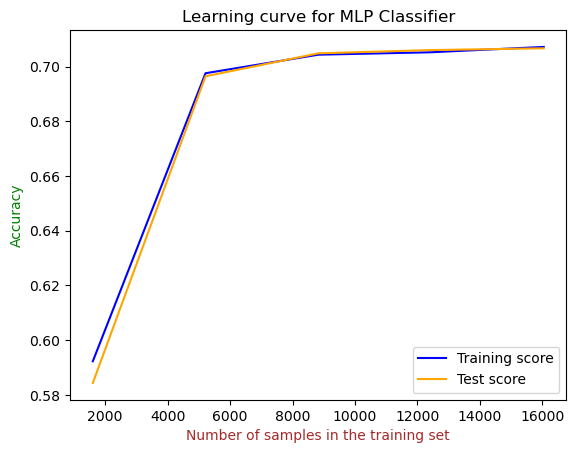

In [66]:
plt.plot(train_sizes,np.mean(train_scores,axis=1), color = 'blue', label = 'Training score')
plt.plot(train_sizes,np.mean(test_scores,axis=1), color = "orange", label = 'Test score')
plt.legend()
plt.xlabel('Number of samples in the training set', color = 'brown')
plt.ylabel('Accuracy', color = 'green') 
plt.title('Learning curve for MLP Classifier')
plt.show()

### I found it interesting that the curves overlap.

In [67]:
compare(acc, acc_adv)

The model which was trained on the advanced dataframe had an accuracy score of 70.1396% 
 and it was higher than the model trained on the simple dataframe by 12.3878%.


### Third model: solver 'adam', hidden layer activation 'tanh', output layer activation 'softmax'

In [68]:
# The same as before but with 'tanh' set as hidden layer activation function.
clf = MLPClassifier(solver='adam', activation = 'tanh',alpha=1e-5, hidden_layer_sizes=(50,),
                    learning_rate_init = 0.01, random_state=275114, max_iter = 500, verbose = True)

clf.out_activation_ = 'softmax'

clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(prediction)

Iteration 1, loss = 0.92462492
Iteration 2, loss = 0.86014614
Iteration 3, loss = 0.85457955
Iteration 4, loss = 0.85763158
Iteration 5, loss = 0.85425187
Iteration 6, loss = 0.85615986
Iteration 7, loss = 0.85634302
Iteration 8, loss = 0.85483082
Iteration 9, loss = 0.85528820
Iteration 10, loss = 0.85471760
Iteration 11, loss = 0.85434388
Iteration 12, loss = 0.86021406
Iteration 13, loss = 0.85615939
Iteration 14, loss = 0.85778150
Iteration 15, loss = 0.86139400
Iteration 16, loss = 0.85618004
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
[2 2 2 ... 2 2 2]


In [69]:
np.unique(prediction, return_counts=True) # getting the unique values from the prediction
# the model only predicts white or black will win - I evaluate it poorly.

(array([1, 2], dtype=int64), array([ 435, 3577], dtype=int64))

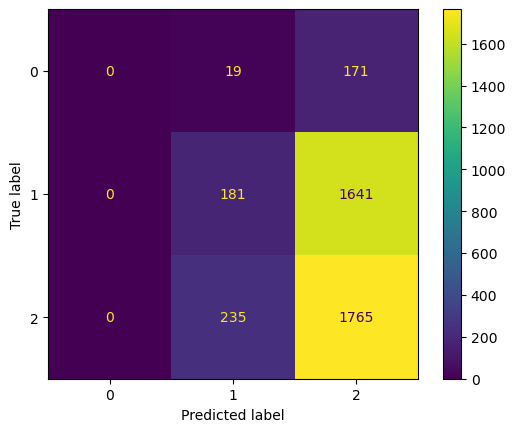

In [70]:
# The same as before.
acc = metrics.accuracy_score(prediction,y_test)
cm = confusion_matrix(y_test, prediction, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [71]:
# Showing the classification report
print(classification_report(y_test, prediction, zero_division=1)) 
# By setting zero_division we don't get a warning when there is 0 in our recall and f1-score

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       190
           1       0.42      0.10      0.16      1822
           2       0.49      0.88      0.63      2000

    accuracy                           0.49      4012
   macro avg       0.64      0.33      0.26      4012
weighted avg       0.48      0.49      0.39      4012



In [72]:
# Preparing the learning curve.
train_sizes, train_scores, test_scores = learning_curve(clf, X, y)

Iteration 1, loss = 1.20231726
Iteration 2, loss = 0.97732933
Iteration 3, loss = 0.92287916
Iteration 4, loss = 0.87127421
Iteration 5, loss = 0.87743297
Iteration 6, loss = 0.89875447
Iteration 7, loss = 0.89747281
Iteration 8, loss = 0.91310572
Iteration 9, loss = 0.86096794
Iteration 10, loss = 0.86597788
Iteration 11, loss = 0.88106241
Iteration 12, loss = 0.88107223
Iteration 13, loss = 0.87818709
Iteration 14, loss = 0.85333847
Iteration 15, loss = 0.88065262
Iteration 16, loss = 0.85561553
Iteration 17, loss = 0.86555409
Iteration 18, loss = 0.85330979
Iteration 19, loss = 0.85600400
Iteration 20, loss = 0.85814478
Iteration 21, loss = 0.85325320
Iteration 22, loss = 0.85152070
Iteration 23, loss = 0.84652405
Iteration 24, loss = 0.85541578
Iteration 25, loss = 0.85906759
Iteration 26, loss = 0.85753468
Iteration 27, loss = 0.89197791
Iteration 28, loss = 0.85338242
Iteration 29, loss = 0.86111425
Iteration 30, loss = 0.86288958
Iteration 31, loss = 0.88897827
Iteration 32, los

Iteration 24, loss = 0.84806444
Iteration 25, loss = 0.85124035
Iteration 26, loss = 0.84754813
Iteration 27, loss = 0.84489250
Iteration 28, loss = 0.85162518
Iteration 29, loss = 0.85449016
Iteration 30, loss = 0.85437655
Iteration 31, loss = 0.84936526
Iteration 32, loss = 0.85295775
Iteration 33, loss = 0.84892608
Iteration 34, loss = 0.85173287
Iteration 35, loss = 0.85409647
Iteration 36, loss = 0.84885990
Iteration 37, loss = 0.85746265
Iteration 38, loss = 0.84927424
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.92691460
Iteration 2, loss = 0.86210736
Iteration 3, loss = 0.85250142
Iteration 4, loss = 0.85033863
Iteration 5, loss = 0.85082621
Iteration 6, loss = 0.85348525
Iteration 7, loss = 0.85571343
Iteration 8, loss = 0.85650773
Iteration 9, loss = 0.85209537
Iteration 10, loss = 0.85112374
Iteration 11, loss = 0.85266897
Iteration 12, loss = 0.84982826
Iteration 13, loss = 0.85614403
Iteration 14, loss = 0.

Iteration 8, loss = 0.89901005
Iteration 9, loss = 0.86018976
Iteration 10, loss = 0.85387718
Iteration 11, loss = 0.85232242
Iteration 12, loss = 0.85137623
Iteration 13, loss = 0.85147016
Iteration 14, loss = 0.84937855
Iteration 15, loss = 0.85344579
Iteration 16, loss = 0.84682760
Iteration 17, loss = 0.85082171
Iteration 18, loss = 0.84851917
Iteration 19, loss = 0.86043836
Iteration 20, loss = 0.86086278
Iteration 21, loss = 0.86419680
Iteration 22, loss = 0.84968204
Iteration 23, loss = 0.86528221
Iteration 24, loss = 0.85082815
Iteration 25, loss = 0.85511289
Iteration 26, loss = 0.85040007
Iteration 27, loss = 0.85109670
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.96030856
Iteration 2, loss = 0.86694959
Iteration 3, loss = 0.85450486
Iteration 4, loss = 0.85441921
Iteration 5, loss = 0.85025982
Iteration 6, loss = 0.84577024
Iteration 7, loss = 0.85299329
Iteration 8, loss = 0.85077651
Iteration 9, loss = 0.85

In [73]:
# Plotting the learning curve.

plt.plot(train_sizes,np.mean(train_scores,axis=1), color = 'blue', label = 'Training score')
plt.plot(train_sizes,np.mean(test_scores,axis=1), color = "orange", label = 'Test score')
plt.legend()
plt.xlabel('Number of samples in the training set', color = 'brown')
plt.ylabel('Accuracy', color = 'green') 
plt.title('Learning curve for MLP Classifier')
plt.show()

In [74]:
# The same as for the simple df.

clf_adv = MLPClassifier(solver='adam', activation = 'tanh',alpha=1e-5, hidden_layer_sizes=(50,),
                        learning_rate_init = 0.01, random_state=275114,
                        max_iter = 50000, verbose = True)

clf_adv.out_activation_ = 'softmax'
clf_adv.fit(X_train_adv, y_train_adv)
prediction_adv = clf_adv.predict(X_test_adv)
print(prediction_adv)

Iteration 1, loss = 0.61650022
Iteration 2, loss = 0.53250165
Iteration 3, loss = 0.53549827
Iteration 4, loss = 0.53087774
Iteration 5, loss = 0.53152569
Iteration 6, loss = 0.52627920
Iteration 7, loss = 0.52696141
Iteration 8, loss = 0.52720535
Iteration 9, loss = 0.52610640
Iteration 10, loss = 0.53313639
Iteration 11, loss = 0.52724675
Iteration 12, loss = 0.52468994
Iteration 13, loss = 0.52765692
Iteration 14, loss = 0.52432229
Iteration 15, loss = 0.52726613
Iteration 16, loss = 0.52492617
Iteration 17, loss = 0.52828677
Iteration 18, loss = 0.52407379
Iteration 19, loss = 0.52595210
Iteration 20, loss = 0.52728913
Iteration 21, loss = 0.52423329
Iteration 22, loss = 0.52415278
Iteration 23, loss = 0.52484038
Iteration 24, loss = 0.52431385
Iteration 25, loss = 0.52373940
Iteration 26, loss = 0.52622329
Iteration 27, loss = 0.52398156
Iteration 28, loss = 0.52311050
Iteration 29, loss = 0.52793373
Iteration 30, loss = 0.52332726
Iteration 31, loss = 0.52550938
Iteration 32, los

In [75]:
np.unique(prediction_adv, return_counts=True) # getting the unique values from the prediction

(array([0., 1., 2.]), array([ 186, 1814, 2012], dtype=int64))

In [76]:
# The same as before.
acc_adv = metrics.accuracy_score(prediction_adv, y_test_adv)
cm = confusion_matrix(y_test_adv, prediction_adv, labels=clf_adv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_adv.classes_)
disp.plot()
plt.show()

In [77]:
# Showing the classification report
print(classification_report(y_test_adv, prediction_adv, zero_division=1))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       190
         1.0       0.67      0.67      0.67      1822
         2.0       0.70      0.71      0.70      2000

    accuracy                           0.70      4012
   macro avg       0.79      0.79      0.79      4012
weighted avg       0.70      0.70      0.70      4012



In [78]:
# Preparing the learning curve.
train_sizes, train_scores, test_scores = learning_curve(clf_adv, X_adv, y_adv)

Iteration 1, loss = 0.83560898
Iteration 2, loss = 0.70326671
Iteration 3, loss = 0.65093415
Iteration 4, loss = 0.59468284
Iteration 5, loss = 0.57052999
Iteration 6, loss = 0.55156538
Iteration 7, loss = 0.54373616
Iteration 8, loss = 0.53192795
Iteration 9, loss = 0.53191303
Iteration 10, loss = 0.54880525
Iteration 11, loss = 0.54702334
Iteration 12, loss = 0.56392777
Iteration 13, loss = 0.53787842
Iteration 14, loss = 0.52262849
Iteration 15, loss = 0.53570858
Iteration 16, loss = 0.57009517
Iteration 17, loss = 0.52118724
Iteration 18, loss = 0.51869199
Iteration 19, loss = 0.53310717
Iteration 20, loss = 0.53569719
Iteration 21, loss = 0.52287305
Iteration 22, loss = 0.53502194
Iteration 23, loss = 0.55370873
Iteration 24, loss = 0.52273924
Iteration 25, loss = 0.51752413
Iteration 26, loss = 0.51424537
Iteration 27, loss = 0.53015649
Iteration 28, loss = 0.52004135
Iteration 29, loss = 0.53278634
Iteration 30, loss = 0.59520216
Iteration 31, loss = 0.58001302
Iteration 32, los

Iteration 65, loss = 0.51986772
Iteration 66, loss = 0.52096405
Iteration 67, loss = 0.51921972
Iteration 68, loss = 0.52009573
Iteration 69, loss = 0.52062462
Iteration 70, loss = 0.52037019
Iteration 71, loss = 0.52005622
Iteration 72, loss = 0.51825515
Iteration 73, loss = 0.51883892
Iteration 74, loss = 0.51986963
Iteration 75, loss = 0.51804136
Iteration 76, loss = 0.51944922
Iteration 77, loss = 0.51781654
Iteration 78, loss = 0.51853406
Iteration 79, loss = 0.51816820
Iteration 80, loss = 0.51885141
Iteration 81, loss = 0.51744096
Iteration 82, loss = 0.51766979
Iteration 83, loss = 0.51843271
Iteration 84, loss = 0.51801944
Iteration 85, loss = 0.51723031
Iteration 86, loss = 0.51665273
Iteration 87, loss = 0.51775331
Iteration 88, loss = 0.51707429
Iteration 89, loss = 0.51644517
Iteration 90, loss = 0.51792743
Iteration 91, loss = 0.51800533
Iteration 92, loss = 0.51758840
Iteration 93, loss = 0.51788471
Iteration 94, loss = 0.51723861
Iteration 95, loss = 0.51656105
Iteratio

Iteration 1, loss = 0.84010634
Iteration 2, loss = 0.71077275
Iteration 3, loss = 0.63324464
Iteration 4, loss = 0.60572515
Iteration 5, loss = 0.59073398
Iteration 6, loss = 0.57441092
Iteration 7, loss = 0.57183253
Iteration 8, loss = 0.56284427
Iteration 9, loss = 0.56466145
Iteration 10, loss = 0.55587153
Iteration 11, loss = 0.55220694
Iteration 12, loss = 0.55928045
Iteration 13, loss = 0.55856310
Iteration 14, loss = 0.55896262
Iteration 15, loss = 0.55188314
Iteration 16, loss = 0.54820130
Iteration 17, loss = 0.57045606
Iteration 18, loss = 0.57430660
Iteration 19, loss = 0.55417583
Iteration 20, loss = 0.56009271
Iteration 21, loss = 0.56058746
Iteration 22, loss = 0.58600028
Iteration 23, loss = 0.54996013
Iteration 24, loss = 0.54159882
Iteration 25, loss = 0.54666501
Iteration 26, loss = 0.55499984
Iteration 27, loss = 0.54467229
Iteration 28, loss = 0.54336423
Iteration 29, loss = 0.54177887
Iteration 30, loss = 0.55595045
Iteration 31, loss = 0.54582045
Iteration 32, los

Iteration 20, loss = 0.56009271
Iteration 21, loss = 0.56058746
Iteration 22, loss = 0.58600028
Iteration 23, loss = 0.54996013
Iteration 24, loss = 0.54159882
Iteration 25, loss = 0.54666501
Iteration 26, loss = 0.55499984
Iteration 27, loss = 0.54467229
Iteration 28, loss = 0.54336423
Iteration 29, loss = 0.54177887
Iteration 30, loss = 0.55595045
Iteration 31, loss = 0.54582045
Iteration 32, loss = 0.54764589
Iteration 33, loss = 0.55346968
Iteration 34, loss = 0.55073611
Iteration 35, loss = 0.54776435
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71945882
Iteration 2, loss = 0.55631458
Iteration 3, loss = 0.54707931
Iteration 4, loss = 0.54468708
Iteration 5, loss = 0.52801882
Iteration 6, loss = 0.52597502
Iteration 7, loss = 0.52860543
Iteration 8, loss = 0.52803148
Iteration 9, loss = 0.52437008
Iteration 10, loss = 0.52380339
Iteration 11, loss = 0.52893285
Iteration 12, loss = 0.52793480
Iteration 13, loss = 0.

Iteration 3, loss = 0.54707931
Iteration 4, loss = 0.54468708
Iteration 5, loss = 0.52801882
Iteration 6, loss = 0.52597502
Iteration 7, loss = 0.52860543
Iteration 8, loss = 0.52803148
Iteration 9, loss = 0.52437008
Iteration 10, loss = 0.52380339
Iteration 11, loss = 0.52893285
Iteration 12, loss = 0.52793480
Iteration 13, loss = 0.52601001
Iteration 14, loss = 0.52244654
Iteration 15, loss = 0.52480887
Iteration 16, loss = 0.52369975
Iteration 17, loss = 0.52485851
Iteration 18, loss = 0.52569239
Iteration 19, loss = 0.53270148
Iteration 20, loss = 0.53337368
Iteration 21, loss = 0.52592912
Iteration 22, loss = 0.52118115
Iteration 23, loss = 0.52435893
Iteration 24, loss = 0.52277773
Iteration 25, loss = 0.52394877
Iteration 26, loss = 0.52646178
Iteration 27, loss = 0.52375137
Iteration 28, loss = 0.52458772
Iteration 29, loss = 0.52394315
Iteration 30, loss = 0.52046289
Iteration 31, loss = 0.52300054
Iteration 32, loss = 0.52584807
Iteration 33, loss = 0.52035087
Iteration 34, l

In [79]:
# Plotting the learning curve.

plt.plot(train_sizes,np.mean(train_scores,axis=1), color = 'blue', label = 'Training score')
plt.plot(train_sizes,np.mean(test_scores,axis=1), color = "orange", label = 'Test score')
plt.legend()
plt.xlabel('Number of samples in the training set', color = 'brown')
plt.ylabel('Accuracy', color = 'green') 
plt.title('Learning curve for MLP Classifier')
plt.show()

In [80]:
compare(acc, acc_adv)

The model which was trained on the advanced dataframe had an accuracy score of 70.2891% 
 and it was higher than the model trained on the simple dataframe by 21.7846%.


# In summary, it is easy to notice that the models which were created on the advanced dataframe performed much better than the ones created on the simple data. It was interesting for me to learn that Neural Networks found patterns to guess the winner with up to 70% accuracy rate despite the fact that the data is hard to understand because some chess games ended earlier than they should due to blunders or running out of time. All in all, considering that the data is highly unbalanced due to the fact that white wins in 50% of the games and because it is only for educational purpose I evaluate the performance of the model quite good.